<a href="https://colab.research.google.com/github/Biswamitra4599/MRI_Literature_Review/blob/main/MRI_Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and Basics

In [19]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np
import plotly.graph_objects as go

In [2]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.7 MB/s eta 0:00:00


In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

## Datasheet Specifications, and fetching the data

In [3]:
# Open the Google Sheet by its name

spreadsheet_name = 'MRI Literature Reviews'
worksheet_name = 'Stats'

spreadsheet = gc.open(spreadsheet_name)
worksheet = spreadsheet.worksheet(worksheet_name)

In [4]:
# Get all values and convert to a Pandas DataFrame
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

df.columns = df.iloc[0]
df = df.iloc[1:]
print(df.head())

0 INDEX                                              Paper     Type  \
1     1                                            BGRAPPA  K space   
2     2  Deep learning MRI halves scan time…” — more ge...  K space   
3     3                            Zero-Shot Diffusion MRI  K space   
4     4               Diffusion Posterior Sampling for MRI  K space   
5     5  Deep Learning Superresolution for Simultaneous...  K space   

0     Model type     Metrics Used Type of MRI Orientation Year   \
1    Statistical     MSE, T-STATS          T2       Axial  2025   
2  Deep Learning              SNR          T2       Axial  2025   
3  Deep Learning  MSE, PSNR, SSIM          NA       Axial  2025   
4  Deep Learning               NA          NA          NA  2025   
5  Deep Learning     AC2, P-Value  PD, FS, T2          NA  2025   

0 Published Place                            Body Parts Quality  
1             AAS                                 Brain      Q1  
2              RA  Brain, Spine, Mussl

In [5]:
# # Removing the "Paper" feature as it is not so important in means of
# try:
#   df = df.drop(columns=['Paper'])
#   print("Column 'Paper' removed successfully.")
# except KeyError:
#   print("Column 'Paper' not found in the DataFrame.")


In [6]:
# Function to convert from string to list
def convert_to_list(text):
    if isinstance(text, str) and text.strip():
        return [item.strip() for item in text.split(',')]
    return ['Missing']

In [7]:
try:
  df['Model type'] = df['Model type'].apply(convert_to_list)
  df['Metrics Used'] = df['Metrics Used'].apply(convert_to_list)
  df['Type of MRI'] = df['Type of MRI'].apply(convert_to_list)
  df['Orientation'] = df['Orientation'].apply(convert_to_list)
  df['Body Parts'] = df['Body Parts'].apply(convert_to_list)

  df['Type'] = df['Type'].apply(convert_to_list)
  df['Year'] = df['Year '].apply(convert_to_list)
  df['Published Place'] = df['Published Place'].apply(convert_to_list)
  df['Quality'] = df['Quality'].apply(convert_to_list)
  print("Converted Successfully!!!")
except:
  print("Error Occured.")

Converted Successfully!!!


In [7]:
df.head()

0 INDEX                                              Paper     Type  \
1     1                                            BGRAPPA  K space   
2     2  Deep learning MRI halves scan time…” — more ge...  K space   
3     3                            Zero-Shot Diffusion MRI  K space   
4     4               Diffusion Posterior Sampling for MRI  K space   
5     5  Deep Learning Superresolution for Simultaneous...  K space   

0     Model type     Metrics Used Type of MRI Orientation Year   \
1    Statistical     MSE, T-STATS          T2       Axial  2025   
2  Deep Learning              SNR          T2       Axial  2025   
3  Deep Learning  MSE, PSNR, SSIM          NA       Axial  2025   
4  Deep Learning               NA          NA          NA  2025   
5  Deep Learning     AC2, P-Value  PD, FS, T2          NA  2025   

0 Published Place                            Body Parts Quality  
1             AAS                                 Brain      Q1  
2              RA  Brain, Spine, Mussles,  Others, Knee      NA  
3            NRMB                               Cardiac      Q1  
4             IPI                                            Q2  
5               R                                  Knee      Q1

In [8]:
# Define the columns for which unique lists are needed
columns_to_get_unique = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Year', 'Published Place', 'Body Parts', 'Quality'
]

# Print unique lists for each specified column
for col in columns_to_get_unique:
    try:
        # Explode the list column into separate rows, then get unique values
        unique_items = df[col].explode().unique().tolist()
        print(f"Unique list for '{col}': {sorted(unique_items)}") # Sorting for consistent output
        print(f"Unique list (without explode) for '{col}': {len(unique_items)}")
    except AttributeError:
        print(f"Error processing column '{col}': Ensure all entries are lists after conversion.")
        unique_items = df[col].unique().tolist()
        print(f"Unique list (without explode) for '{col}': {len(unique_items)}")
        print(f"Unique list (without explode) for '{col}': {sorted(unique_items)}")

Unique list for 'Type': ['I-space', 'K space', 'K-I space', 'Missing']
Unique list (without explode) for 'Type': 4
Unique list for 'Model type': ['Deep Learning', 'Machine Learning', 'Missing', 'Statistical', 'Traditional']
Unique list (without explode) for 'Model type': 5
Unique list for 'Metrics Used': ['', 'AC2', 'Accuracy', 'Adversarial Loss', 'Aliasing', 'Artifact-Power', 'Blurring', 'CNR', 'CRLB', 'Coherence', 'Computation Time', 'Cross Entropy Loss', 'Dice', 'FID', 'FSIM', 'FWHM', 'G-factor', 'HD Score', 'L1-norm', 'L2-norm', 'LAP', 'LPIPS', 'MAC', 'MAE', 'MS-GMSD', 'MS-SSIM', 'MSE', 'MSSIM', 'Missing', 'NA', 'NMSE', 'NQM', 'NRMSE', 'NRMSR', 'Nuclear Norm', 'P-Value', 'PSNR', 'QVA', 'RLNE', 'RMSE', 'Reconstruction error', 'Runtime', 'SNR', 'SSIM', 'Sensitivity', 'Sharpness-Score', 'Specificity', 'T-STATS', 'TPSF', 'Time to acquire', 'VIF', 'Vassel Lenght', 'geometry factor', 'nRMSE', 'nRMSEs', 'rSNR', 'tSNR']
Unique list (without explode) for 'Metrics Used': 57
Unique list for '

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


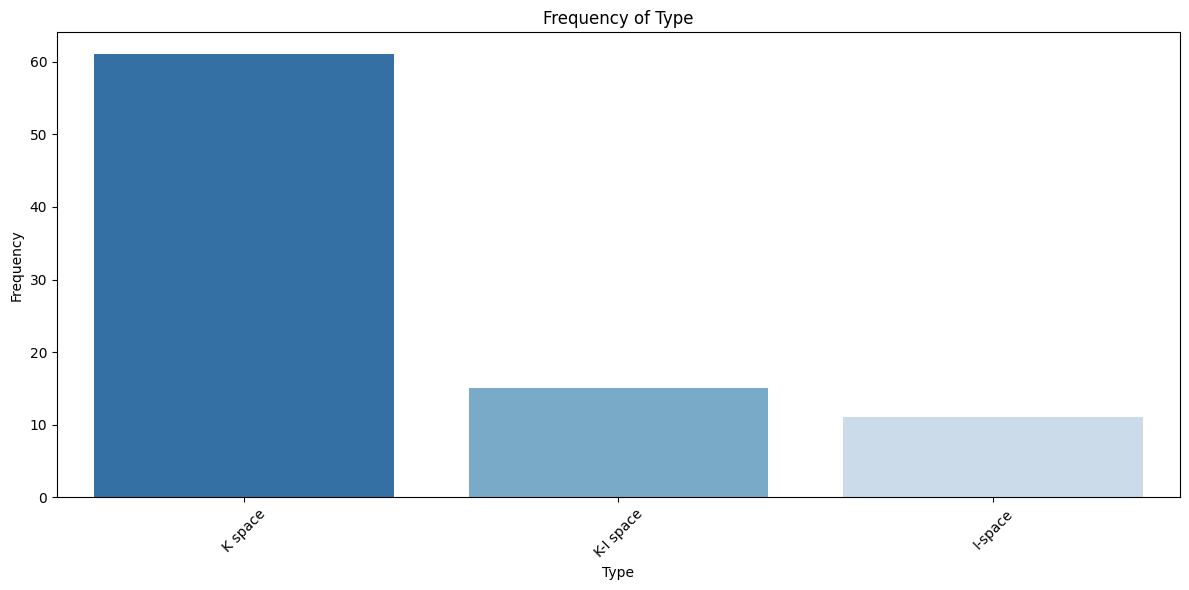

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


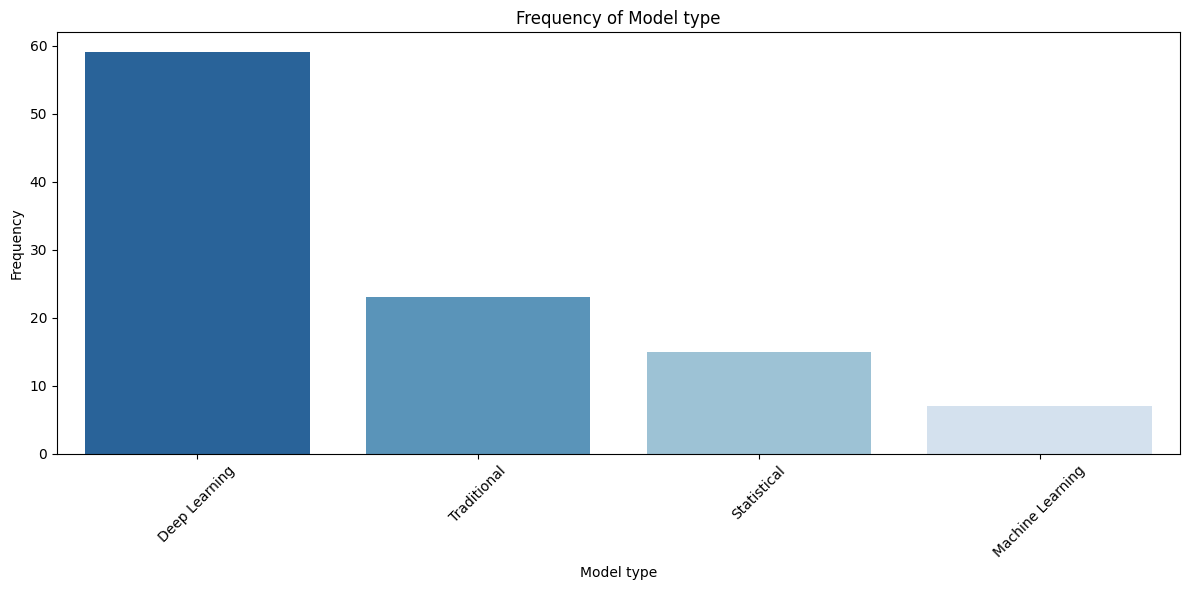

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


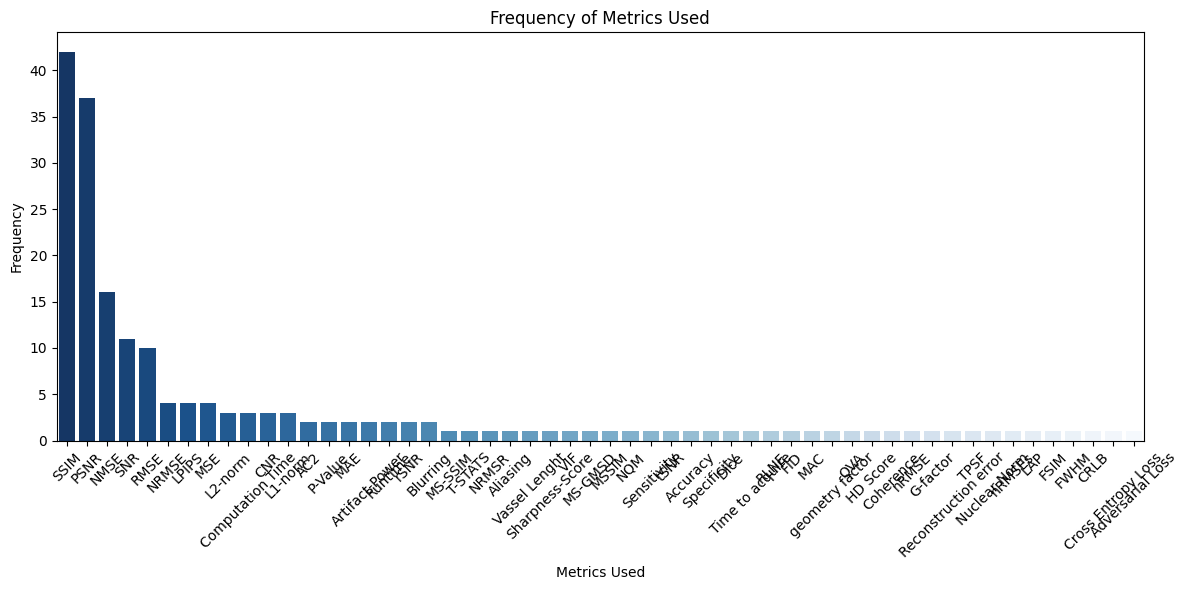

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


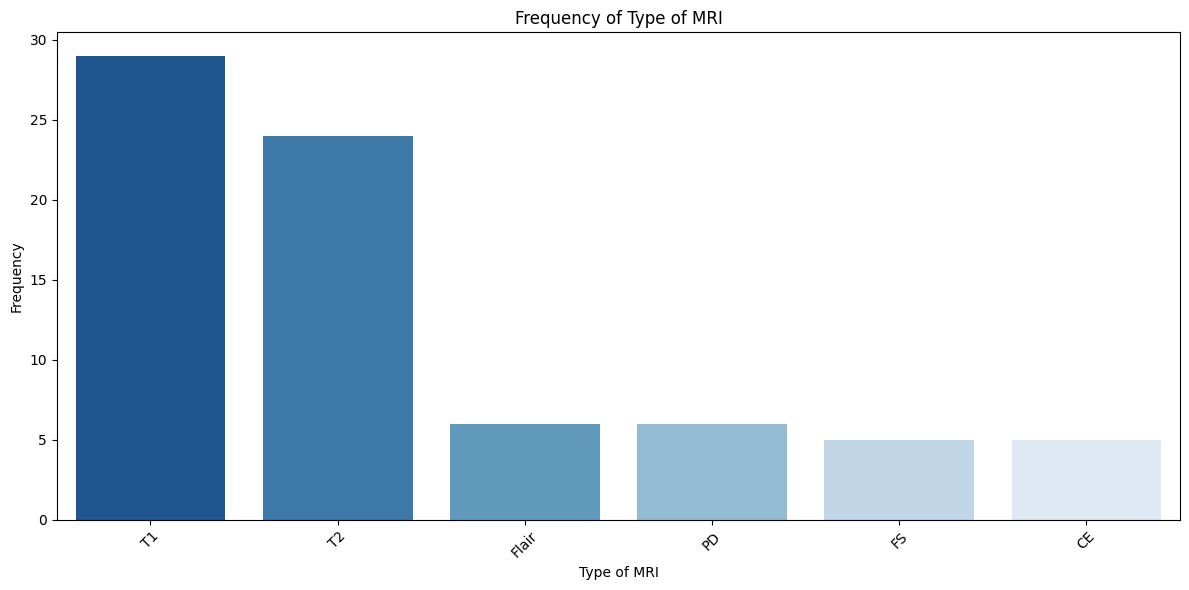

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


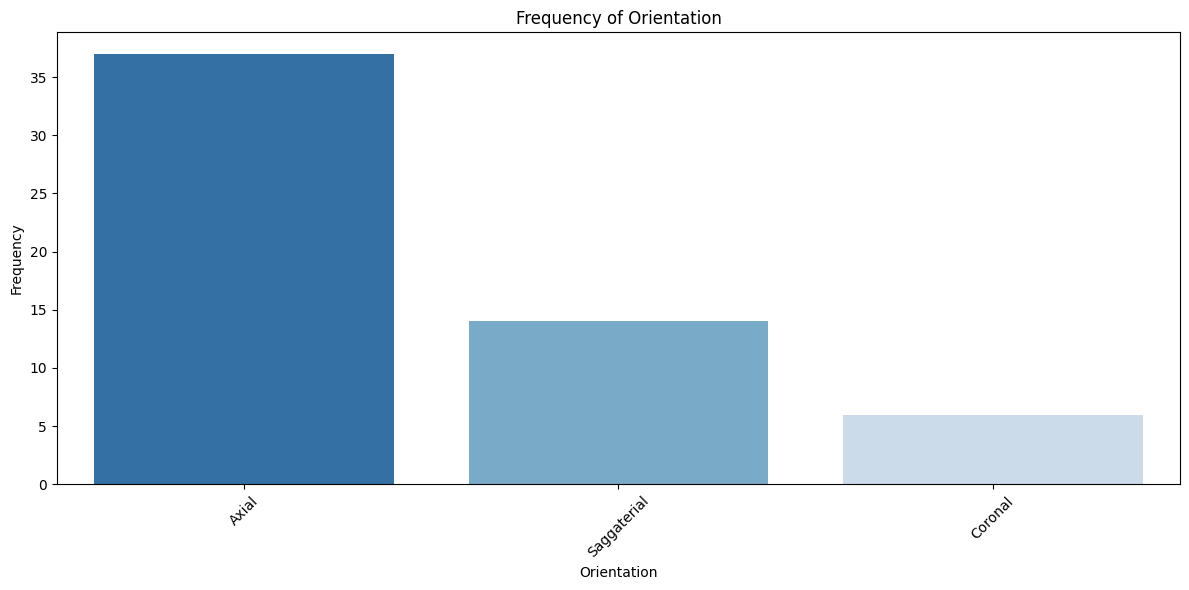

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


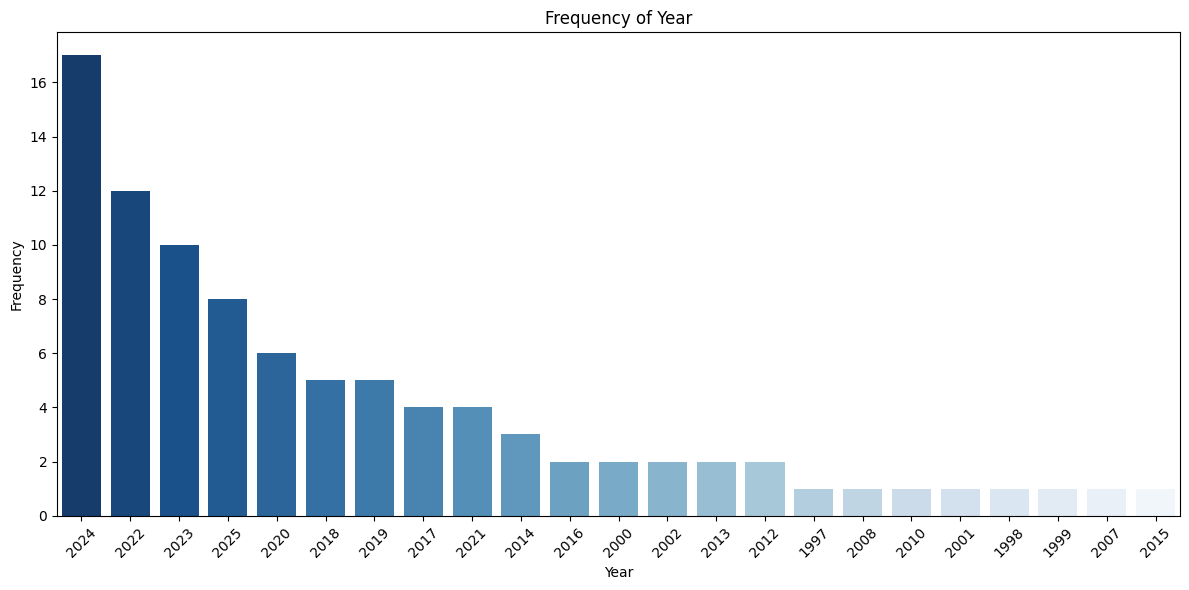

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


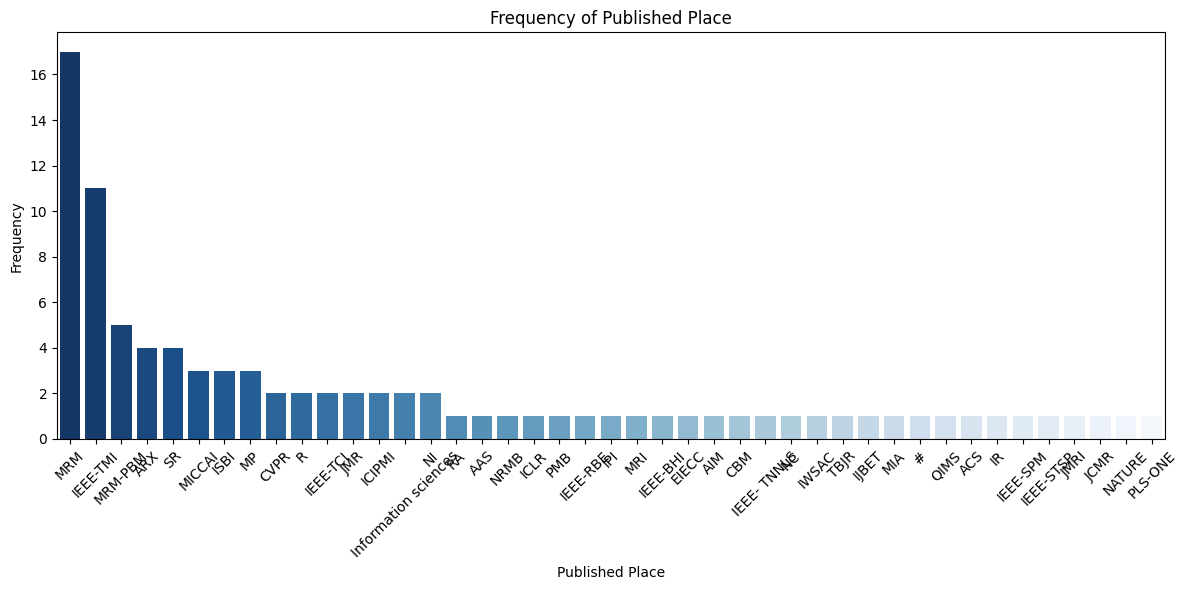

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


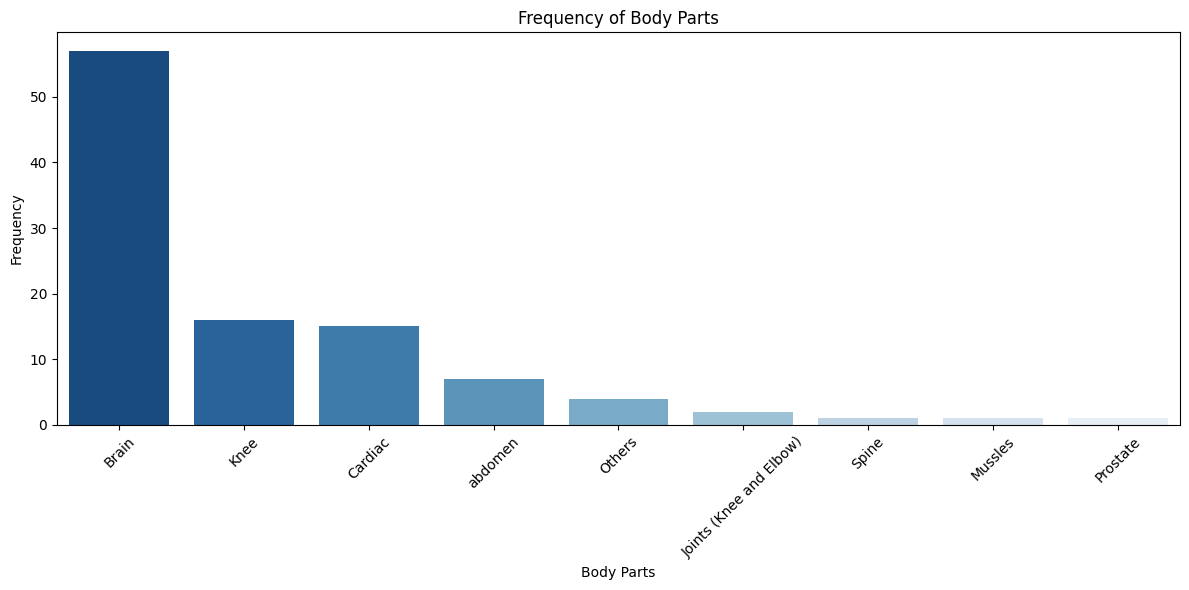

/tmp/ipython-input-1322410606.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')


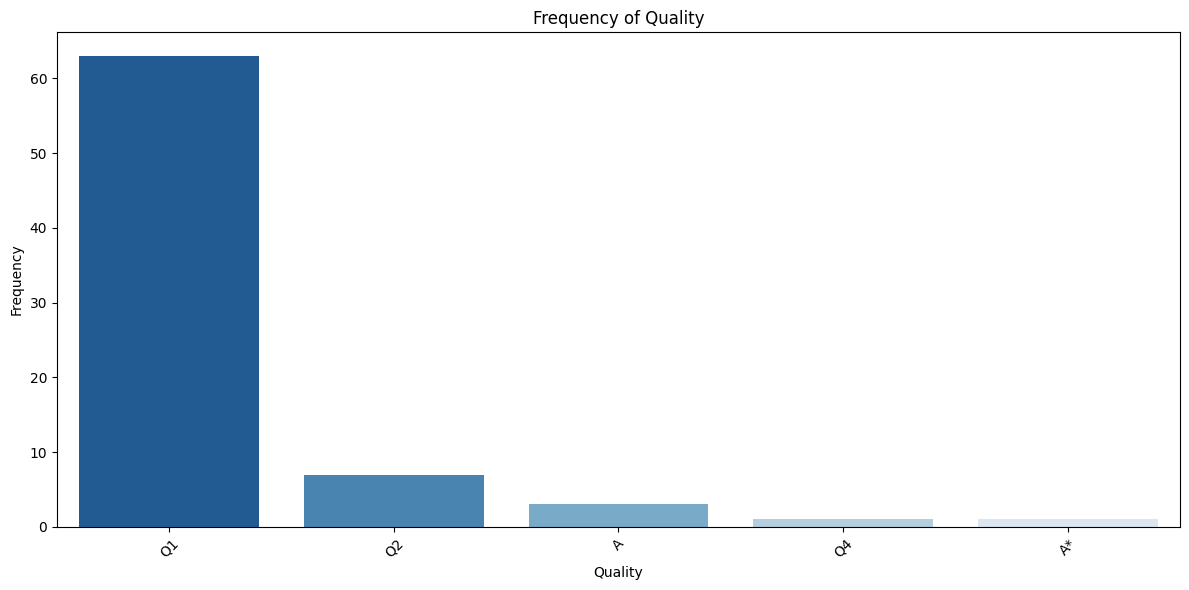

In [13]:
columns_to_plot = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Year', 'Published Place', 'Body Parts', 'Quality'
]

for col in columns_to_plot:
    # Explode the list column to get individual items
    exploded_series = df[col].explode()

    # Count the frequency of each item
    frequencies = exploded_series.value_counts()

    # Filter out empty string or 'Missing' if they are not meaningful for plotting
    if '' in frequencies.index:
        frequencies = frequencies.drop('')
    if 'Missing' in frequencies.index:
        frequencies = frequencies.drop('Missing')
    if 'NA' in frequencies.index:
        frequencies = frequencies.drop('NA')

    if not frequencies.empty:
        # Create a bar plot
        plt.figure(figsize=(12,6))
        sns.barplot(x=frequencies.index, y=frequencies.values, palette='Blues_r')
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No meaningful data to plot for column: {col} after filtering 'Missing' or empty values.")

/tmp/ipython-input-4123754415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, palette='Blues')


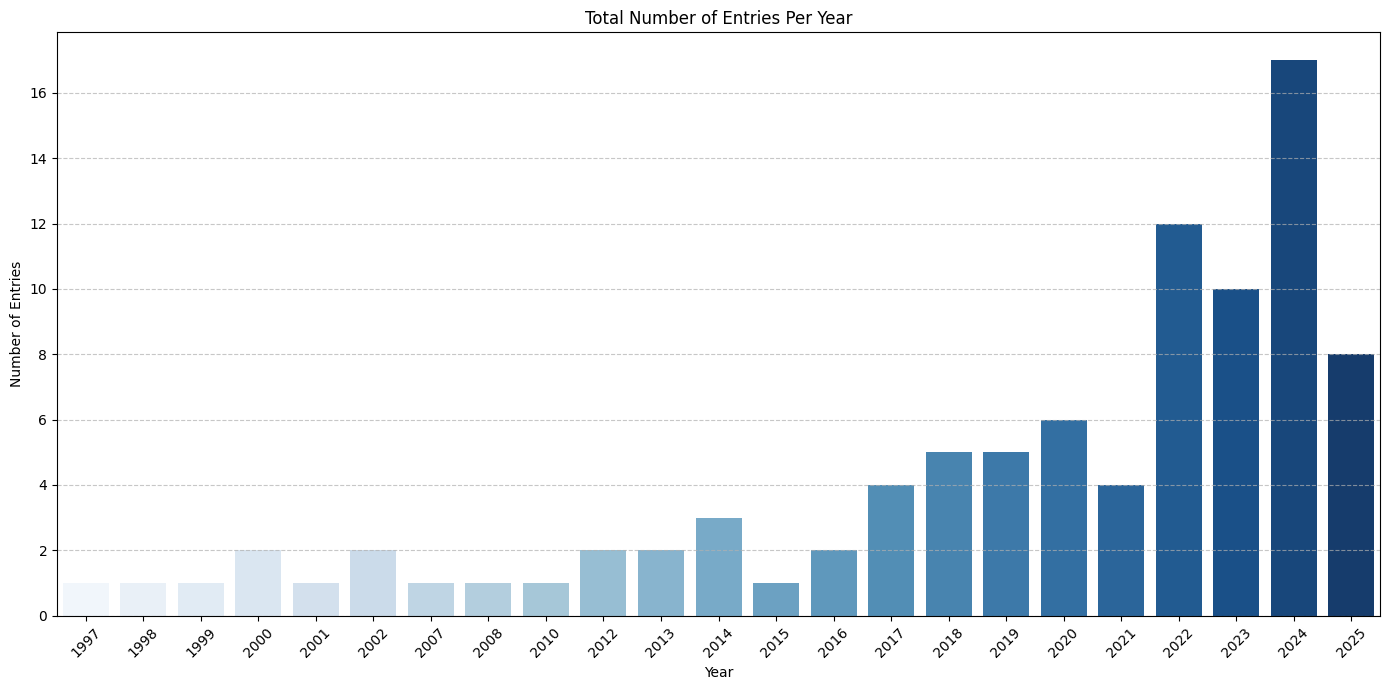

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explode the 'Year' column to get individual year entries
exploded_years = df['Year'].explode()

# Filter out any 'Missing' or non-numeric entries that might interfere with sorting
# and convert to numeric, coercing errors to NaN
filtered_years = pd.to_numeric(exploded_years.replace('Missing', pd.NA).dropna(), errors='coerce')

# Count the frequency of each year
year_counts = filtered_years.value_counts().sort_index()

if not year_counts.empty:
    plt.figure(figsize=(14, 7))
    sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, palette='Blues')
    plt.title('Total Number of Entries Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Entries')
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No meaningful year data to plot after filtering.")

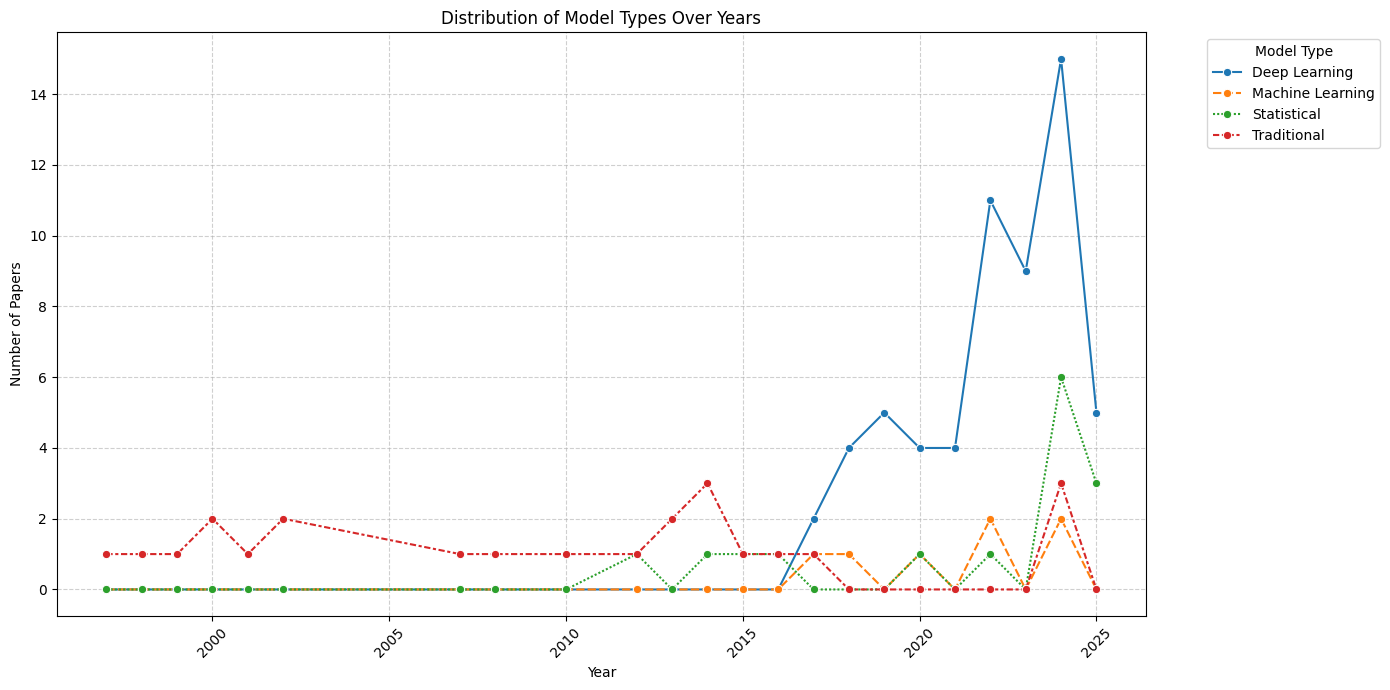

In [15]:
# Explode 'Year' and 'Model type' columns
df_exploded_year = df.explode('Year')
df_exploded_model = df_exploded_year.explode('Model type')

# Convert 'Year' to numeric, handling potential errors
df_exploded_model['Year'] = pd.to_numeric(df_exploded_model['Year'], errors='coerce')

# Filter out 'Missing' or NaN values from 'Model type' and 'Year'
df_plot = df_exploded_model[df_exploded_model['Model type'] != 'Missing']
df_plot = df_plot.dropna(subset=['Year'])

# Group by Year and Model type and count occurrences
model_type_by_year = df_plot.groupby(['Year', 'Model type']).size().unstack(fill_value=0)

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=model_type_by_year, marker='o')
plt.title('Distribution of Model Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Unique items



In [16]:
from itertools import combinations
import pandas as pd

def generate_cooccurrence_matrix(df, column_name):
    # Collect all unique items, filtering out 'Missing', 'NA', and empty strings
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    # Initialize an empty co-occurrence matrix with unique items as index and columns
    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    # Iterate through each row's list to count co-occurrences
    for item_list in df[column_name]:
        # Filter items in the current list
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA']]

        # Count self-occurrences
        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        # Count co-occurrences for pairs
        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1 # Symmetrical matrix

    return cooccurrence_matrix

# Columns identified for co-occurrence analysis, excluding 'Year'
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Display the generated co-occurrence matrices
for col_name, matrix in cooccurrence_matrices.items():
    print(f"\n--- Co-occurrence Matrix for '{col_name}' ---")
    print(matrix)
    print("-" * (len(f"--- Co-occurrence Matrix for '{col_name}' ---")))

Generating co-occurrence matrix for 'Type'...
Co-occurrence matrix for 'Type' generated successfully.
Generating co-occurrence matrix for 'Model type'...
Co-occurrence matrix for 'Model type' generated successfully.
Generating co-occurrence matrix for 'Metrics Used'...
Co-occurrence matrix for 'Metrics Used' generated successfully.
Generating co-occurrence matrix for 'Type of MRI'...
Co-occurrence matrix for 'Type of MRI' generated successfully.
Generating co-occurrence matrix for 'Orientation'...
Co-occurrence matrix for 'Orientation' generated successfully.
Generating co-occurrence matrix for 'Body Parts'...
Co-occurrence matrix for 'Body Parts' generated successfully.

--- Co-occurrence Matrix for 'Type' ---
           I-space  K space  K-I space
I-space         11        0          0
K space          0       61          0
K-I space        0        0         15
---------------------------------------

--- Co-occurrence Matrix for 'Model type' ---
                  Deep Learning  Mac

In [ ]:
df.head()

0 INDEX       Type       Model type       Metrics Used   Type of MRI  \
1     1  [K space]    [Statistical]     [MSE, T-STATS]          [T2]   
2     2  [K space]  [Deep Learning]              [SNR]          [T2]   
3     3  [K space]  [Deep Learning]  [MSE, PSNR, SSIM]          [NA]   
4     4  [K space]  [Deep Learning]          [Missing]          [NA]   
5     5  [K space]  [Deep Learning]     [AC2, P-Value]  [PD, FS, T2]   

0 Orientation Year  Published Place                             Body Parts  \
1     [Axial]  2025           [AAS]                                [Brain]   
2     [Axial]  2025            [RA]  [Brain, Spine, Mussles, Others, Knee]   
3     [Axial]  2025          [NRMB]                              [Cardiac]   
4        [NA]  2025           [IPI]                              [Missing]   
5        [NA]  2025             [R]                                 [Knee]   

0 Quality    Year  
1    [Q1]  [2025]  
2    [NA]  [2025]  
3    [Q1]  [2025]  
4    [Q2]  [2025]  
5    [Q1]  [2025]

In [ ]:
print("Columns identified for co-occurrence analysis:")
for col in co_occurrence_columns:
    print(f"- {col}")

Columns identified for co-occurrence analysis:
- Type
- Model type
- Metrics Used
- Type of MRI
- Orientation
- Body Parts


**Reasoning**:
I will define the `generate_cooccurrence_matrix` function as described in the task's planning, then iterate through the identified `co_occurrence_columns` to generate and store the co-occurrence matrices. Finally, I will display each generated matrix.



--- Regenerating Co-occurrence Matrices for all specified columns ---
Generating co-occurrence matrix for 'Type'...
Co-occurrence matrix for 'Type' generated successfully.
Generating co-occurrence matrix for 'Model type'...
Co-occurrence matrix for 'Model type' generated successfully.
Generating co-occurrence matrix for 'Metrics Used'...
Co-occurrence matrix for 'Metrics Used' generated successfully.
Generating co-occurrence matrix for 'Type of MRI'...
Co-occurrence matrix for 'Type of MRI' generated successfully.
Generating co-occurrence matrix for 'Orientation'...
Co-occurrence matrix for 'Orientation' generated successfully.
Generating co-occurrence matrix for 'Published Place'...
Co-occurrence matrix for 'Published Place' generated successfully.
Generating co-occurrence matrix for 'Body Parts'...
Co-occurrence matrix for 'Body Parts' generated successfully.
Generating co-occurrence matrix for 'Quality'...
Co-occurrence matrix for 'Quality' generated successfully.

--- Generating an

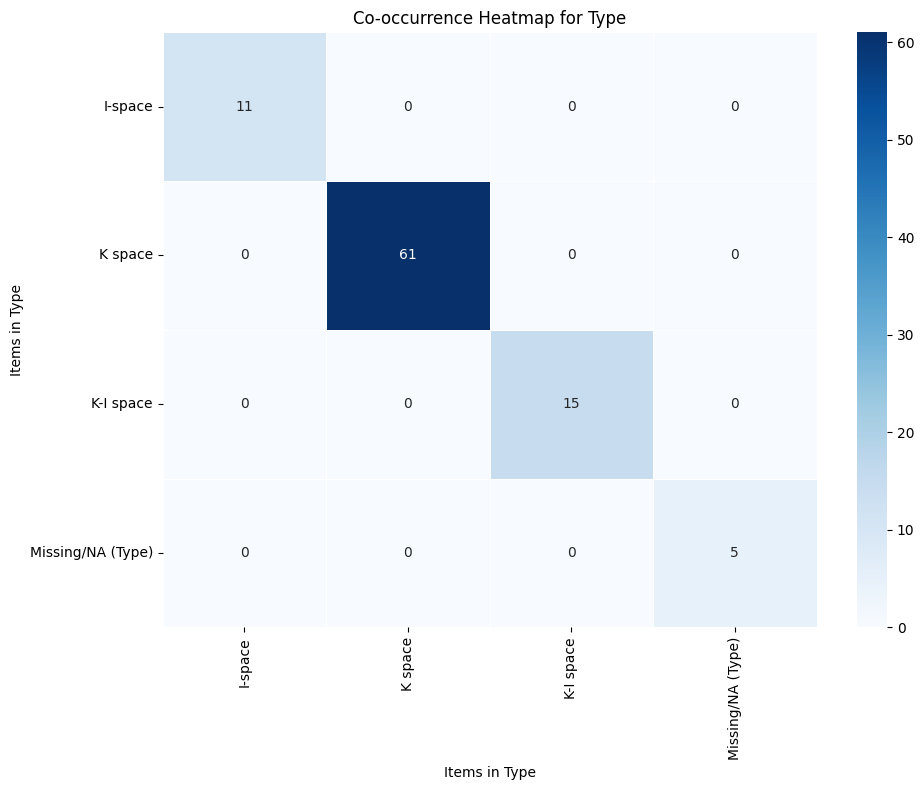

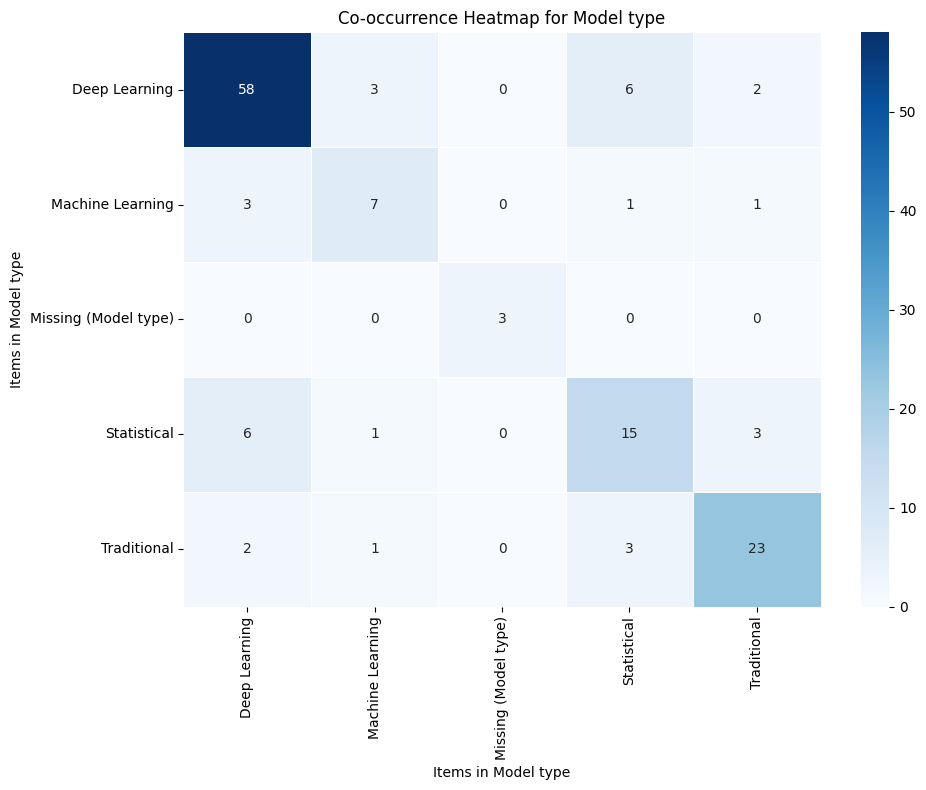

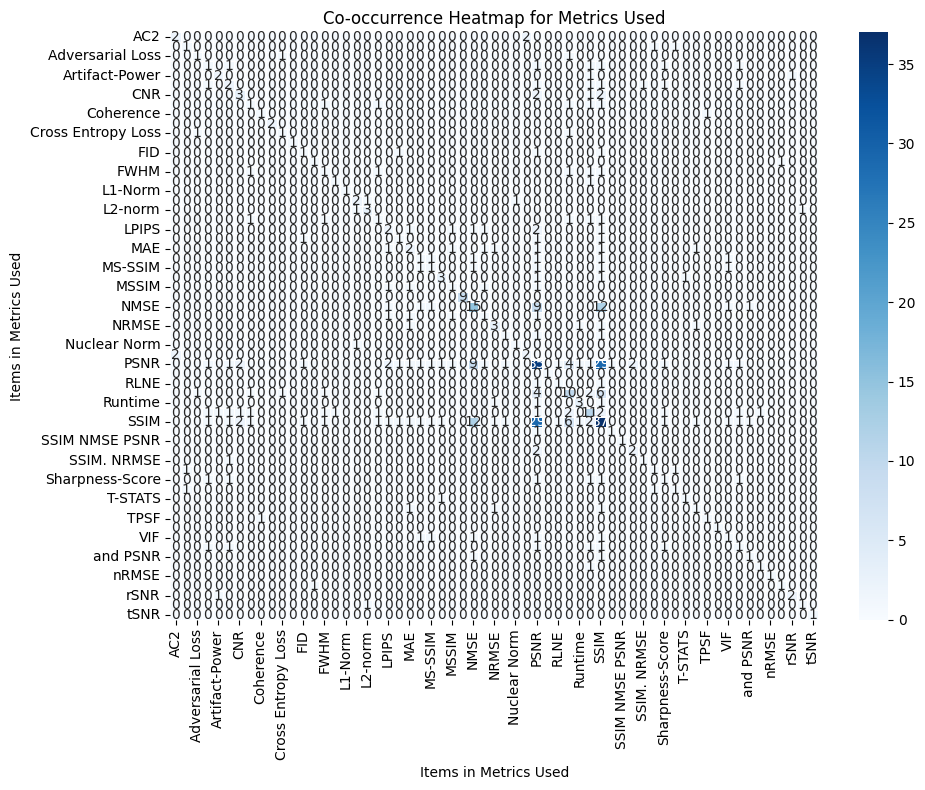

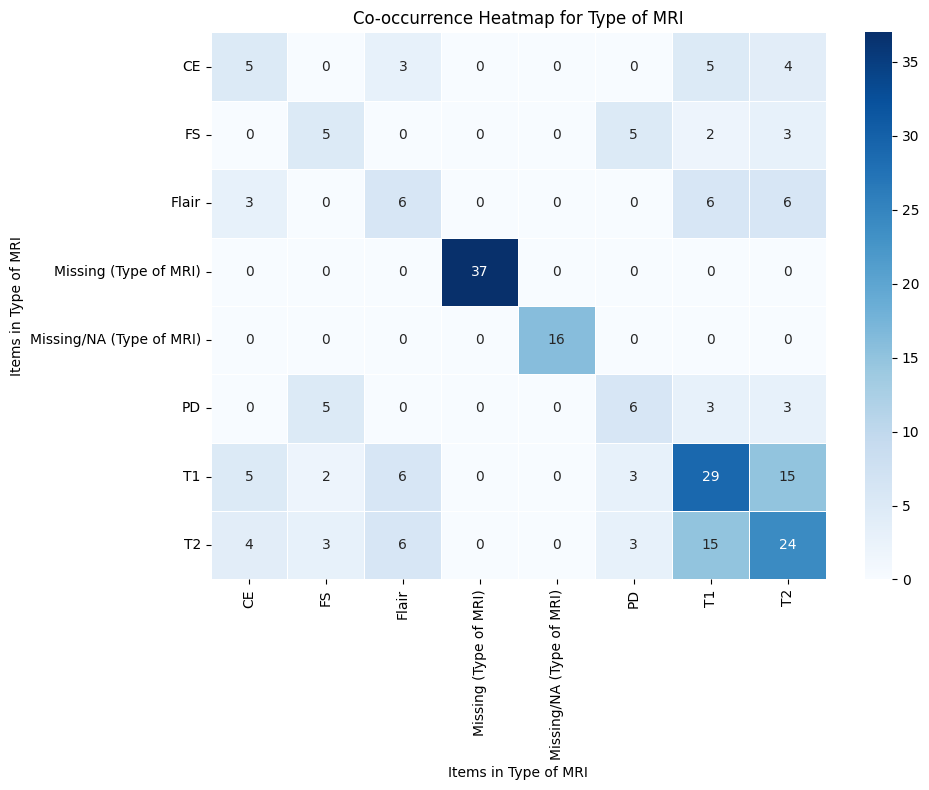

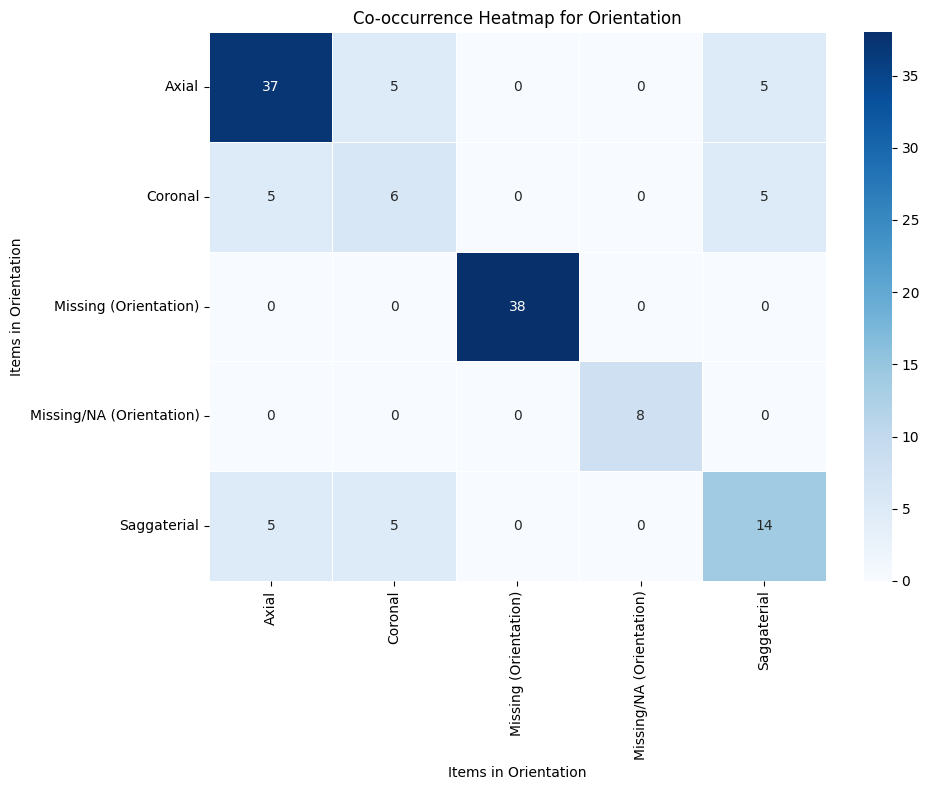

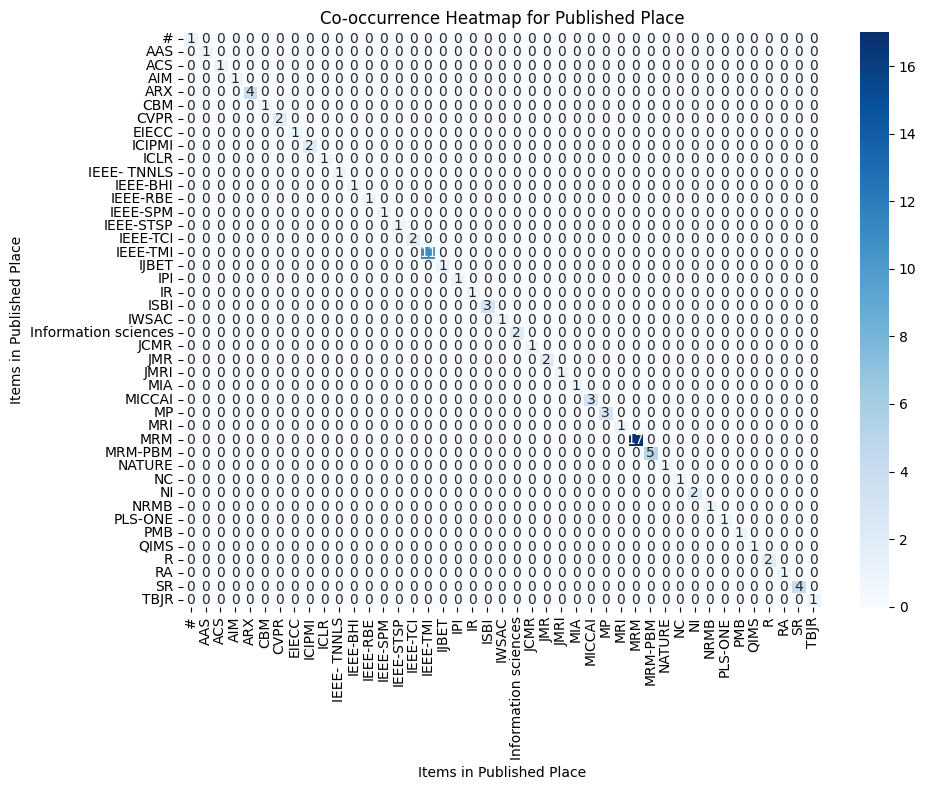

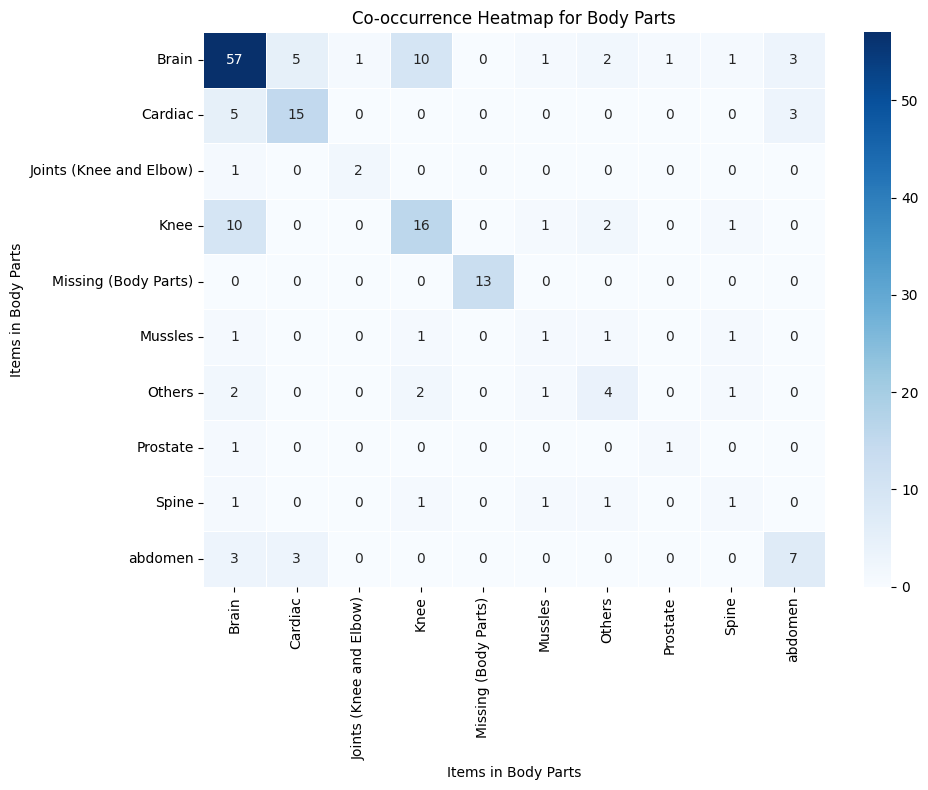

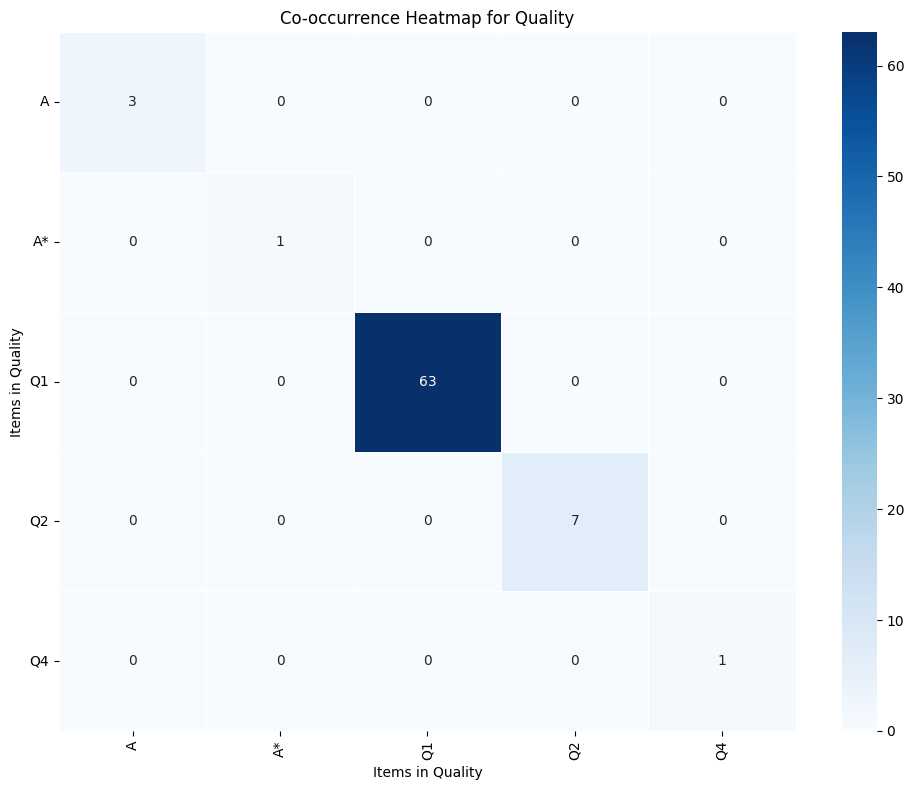

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import pandas as pd

# The generate_cooccurrence_matrix function from earlier remains the same
def generate_cooccurrence_matrix(df, column_name):

    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA', '']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    for item_list in df[column_name]:
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA', '']]

        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1

    return cooccurrence_matrix

# Dictionary to store all generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
print("--- Regenerating Co-occurrence Matrices for all specified columns ---")
for col in co_occurrence_columns:
    print(f"Generating co-occurrence matrix for '{col}'...")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Generate and display heatmaps for each co-occurrence matrix
print("\n--- Generating and Displaying Heatmaps ---")
for col_name, matrix in cooccurrence_matrices.items():
    if not matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.title(f'Co-occurrence Heatmap for {col_name}')
        plt.xlabel(f'Items in {col_name}')
        plt.ylabel(f'Items in {col_name}')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot generate heatmap for '{col_name}' as its co-occurrence matrix is empty.")

Generating pairwise co-occurrence matrices and heatmaps...
Processing pair: 'Type' vs 'Model type'
Pairwise co-occurrence matrix for 'Type' vs 'Model type' generated successfully.
target     Deep Learning  Machine Learning  Statistical  Traditional
source                                                              
I-space                6                 0            1            4
K space               37                 4           10           17
K-I space             13                 3            4            2


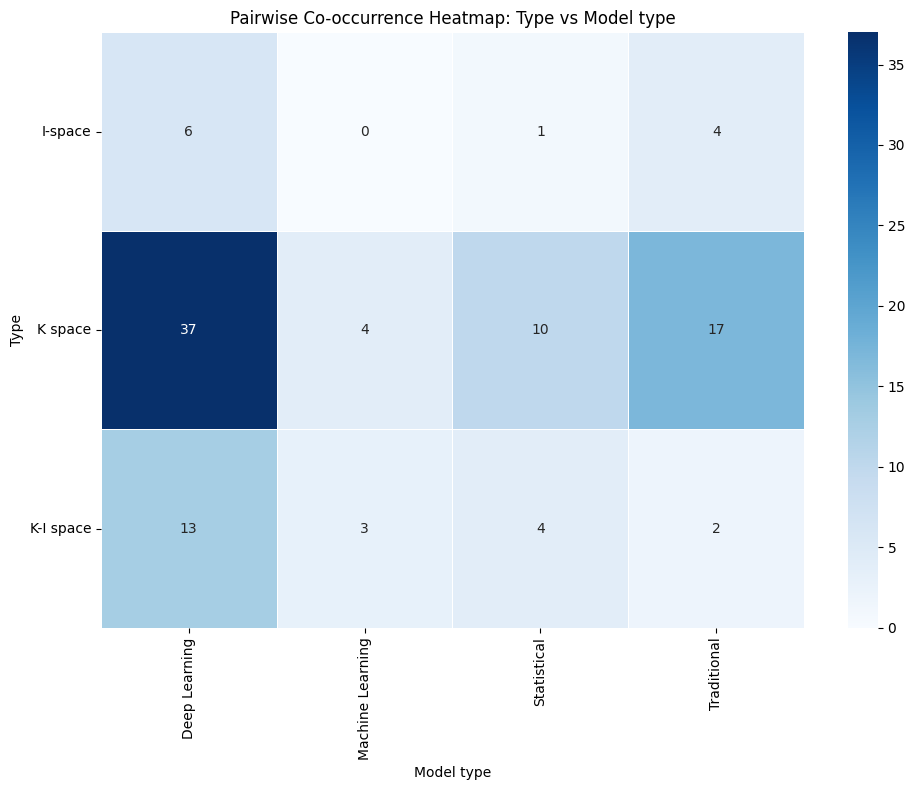

Processing pair: 'Type' vs 'Metrics Used'
Pairwise co-occurrence matrix for 'Type' vs 'Metrics Used' generated successfully.
target     AC2  Accuracy  Adversarial Loss  Aliasing  Artifact-Power  \
source                                                                 
I-space      1         1                 0         1               0   
K space      1         0                 1         0               2   
K-I space    0         0                 0         0               0   

target     Blurring  CNR  CRLB  Coherence  Computation Time  ...  T-STATS  \
source                                                       ...            
I-space           1    0     0          1                 1  ...        0   
K space           0    2     1          0                 2  ...        1   
K-I space         1    0     0          0                 0  ...        0   

target     TPSF  Time to acquire  VIF  Vassel Lenght  geometry factor  nRMSE  \
source                                          

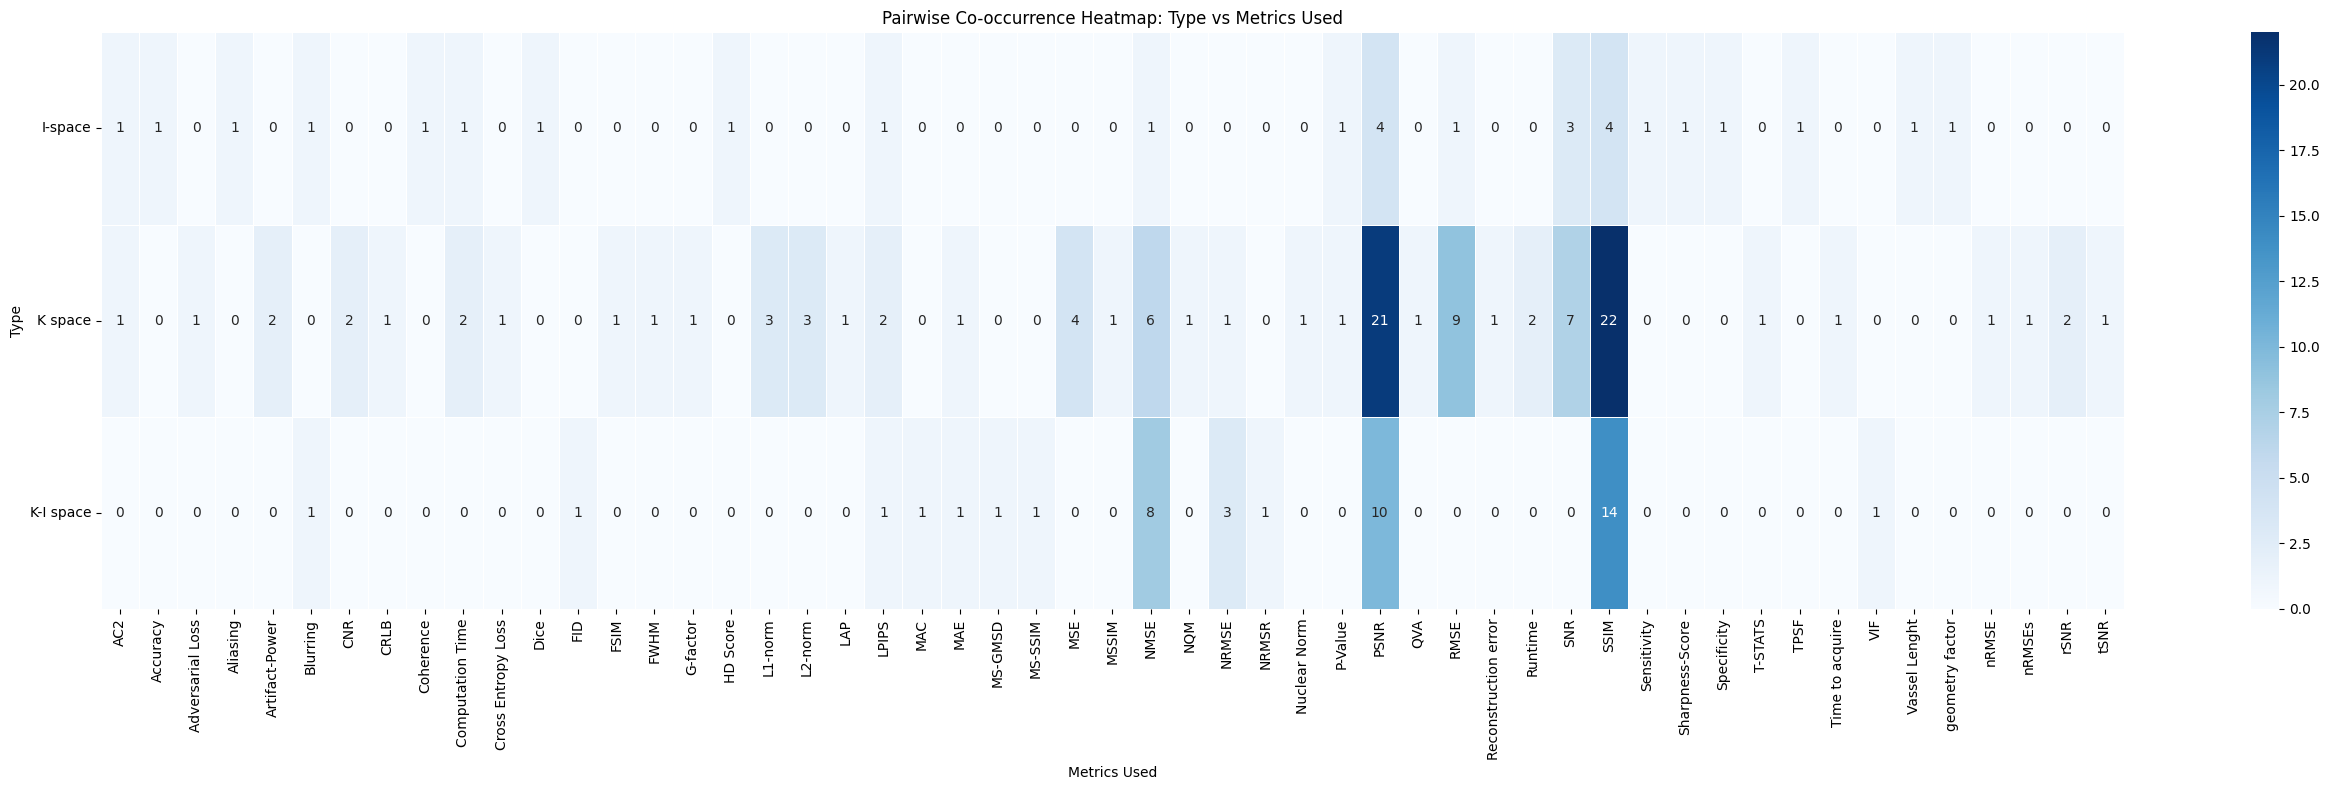

Processing pair: 'Type' vs 'Type of MRI'
Pairwise co-occurrence matrix for 'Type' vs 'Type of MRI' generated successfully.
target     CE  FS  Flair  PD  T1  T2
source                              
I-space     1   1      0   2   4   4
K space     1   2      2   2  13  11
K-I space   3   1      4   1   9   7


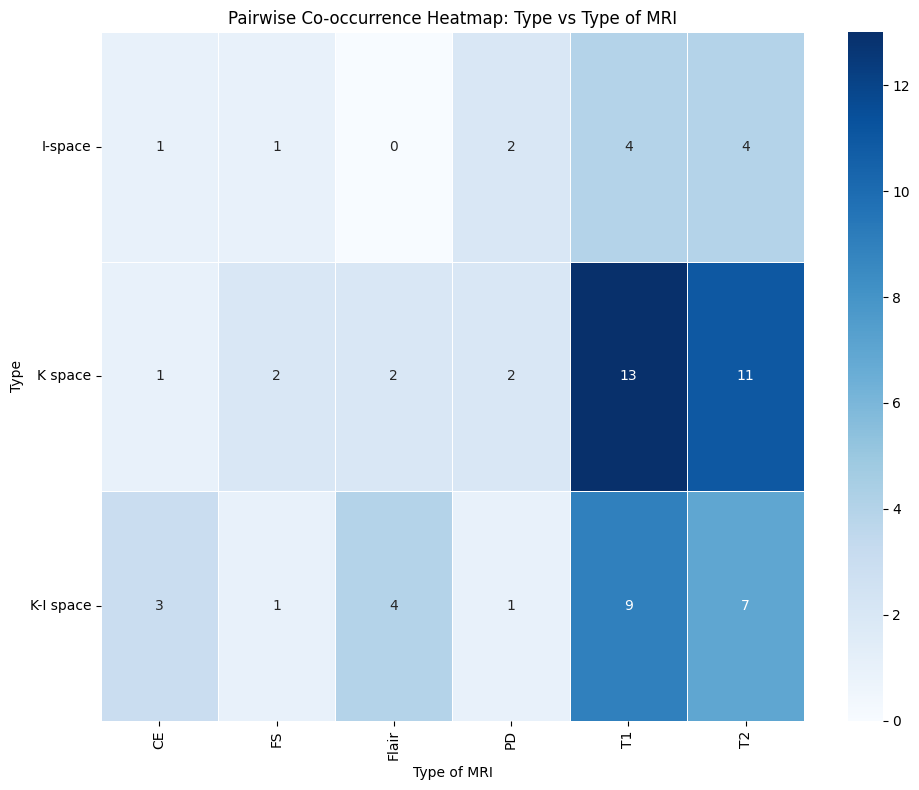

Processing pair: 'Type' vs 'Orientation'
Pairwise co-occurrence matrix for 'Type' vs 'Orientation' generated successfully.
target     Axial  Coronal  Saggaterial
source                                
I-space        5        1            2
K space       19        3            6
K-I space     12        2            4


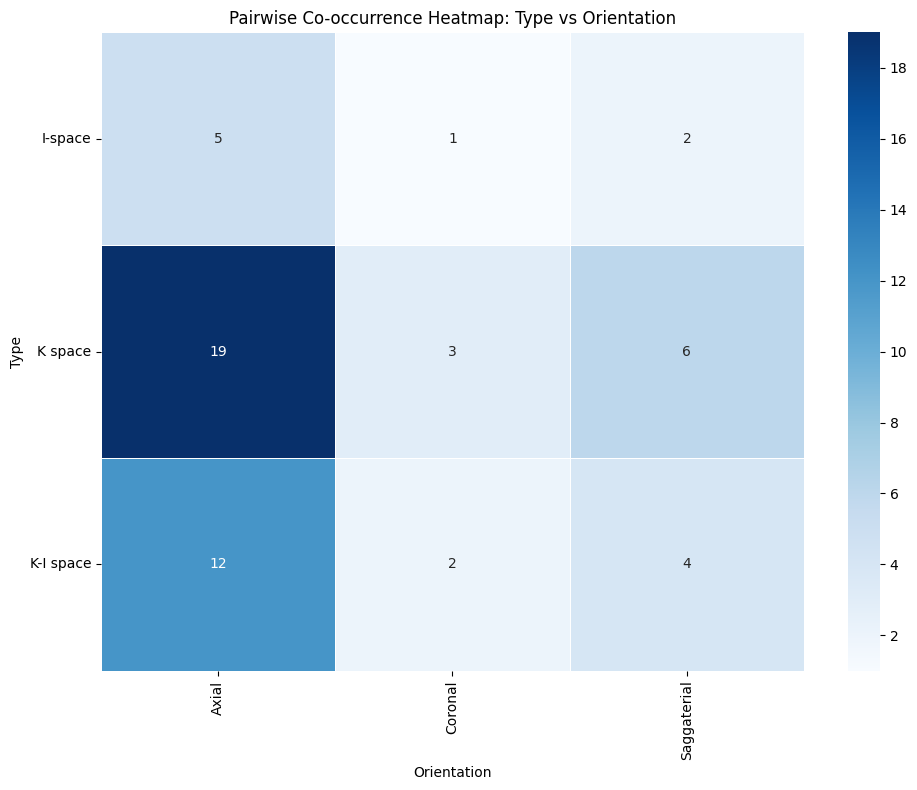

Processing pair: 'Type' vs 'Published Place'
Pairwise co-occurrence matrix for 'Type' vs 'Published Place' generated successfully.
target     AAS  ACS  AIM  ARX  CBM  CVPR  EIECC  ICIPMI  ICLR  IEEE- TNNLS  \
source                                                                       
I-space      0    0    0    0    1     0      1       0     0            0   
K space      1    1    0    3    0     1      0       2     1            0   
K-I space    0    0    1    1    0     1      0       0     0            1   

target     ...  NATURE  NC  NI  NRMB  PLS-ONE  PMB  QIMS  R  RA  SR  
source     ...                                                       
I-space    ...       0   0   0     0        0    0     0  1   0   0  
K space    ...       1   0   1     1        1    1     1  1   1   4  
K-I space  ...       0   1   1     0        0    0     0  0   0   0  

[3 rows x 38 columns]


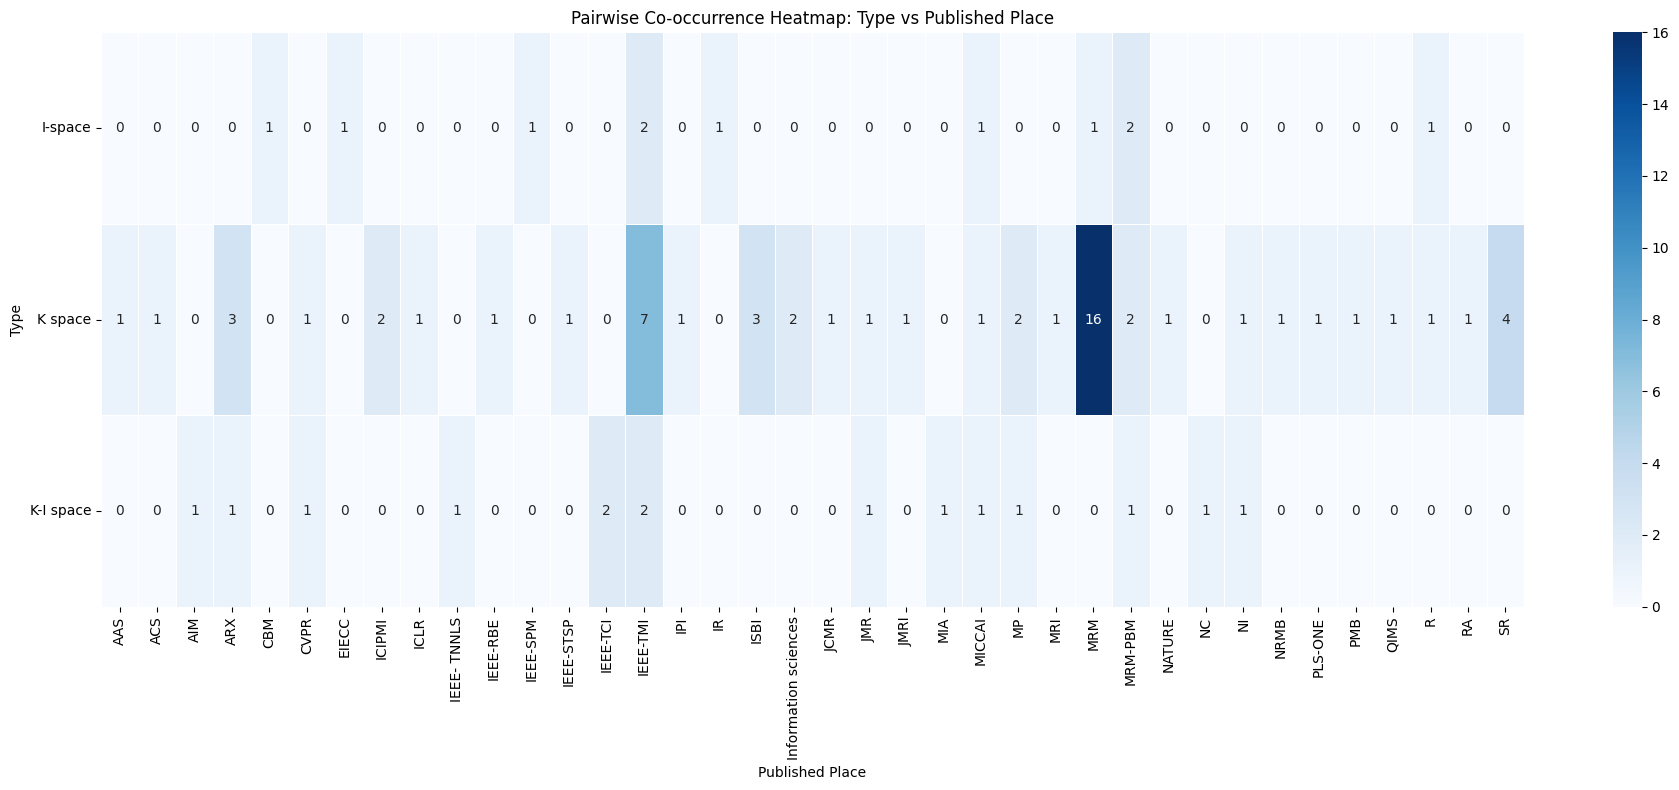

Processing pair: 'Type' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Type' vs 'Body Parts' generated successfully.
target     Brain  Cardiac  Joints (Knee and Elbow)  Knee  Mussles  Others  \
source                                                                      
I-space        7        3                        0     2        0       0   
K space       36       11                        2     8        1       3   
K-I space     13        0                        0     5        0       1   

target     Prostate  Spine  abdomen  
source                               
I-space           0      0        0  
K space           1      1        7  
K-I space         0      0        0  


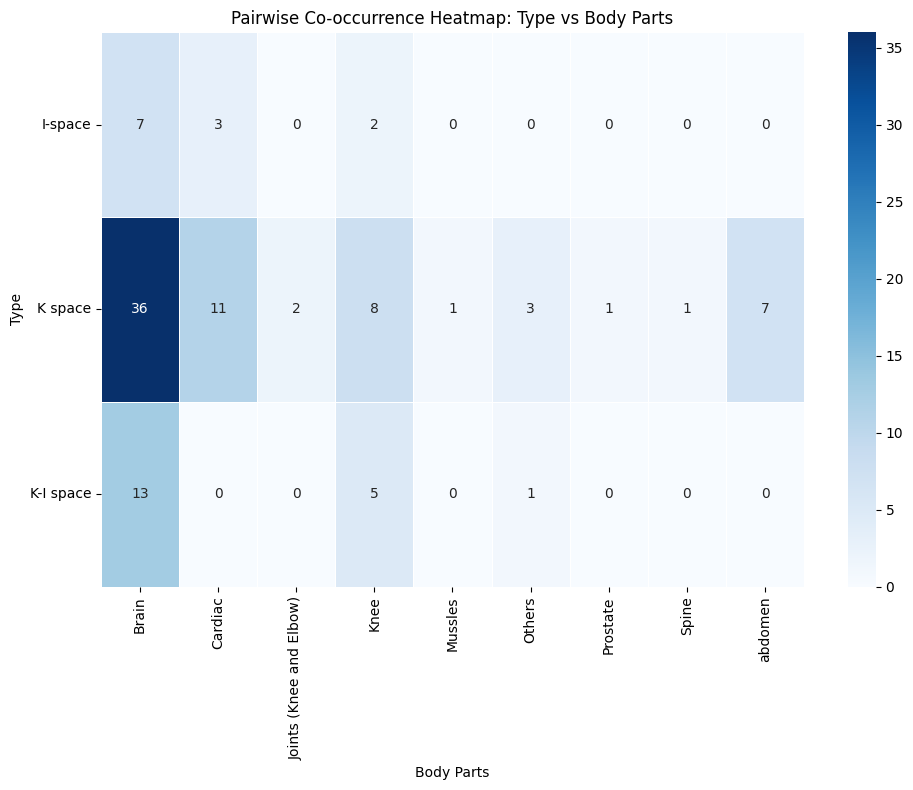

Processing pair: 'Type' vs 'Quality'
Pairwise co-occurrence matrix for 'Type' vs 'Quality' generated successfully.
target     A  A*  Q1  Q2
source                  
I-space    1   0   7   2
K space    1   1  43   4
K-I space  1   0  11   1


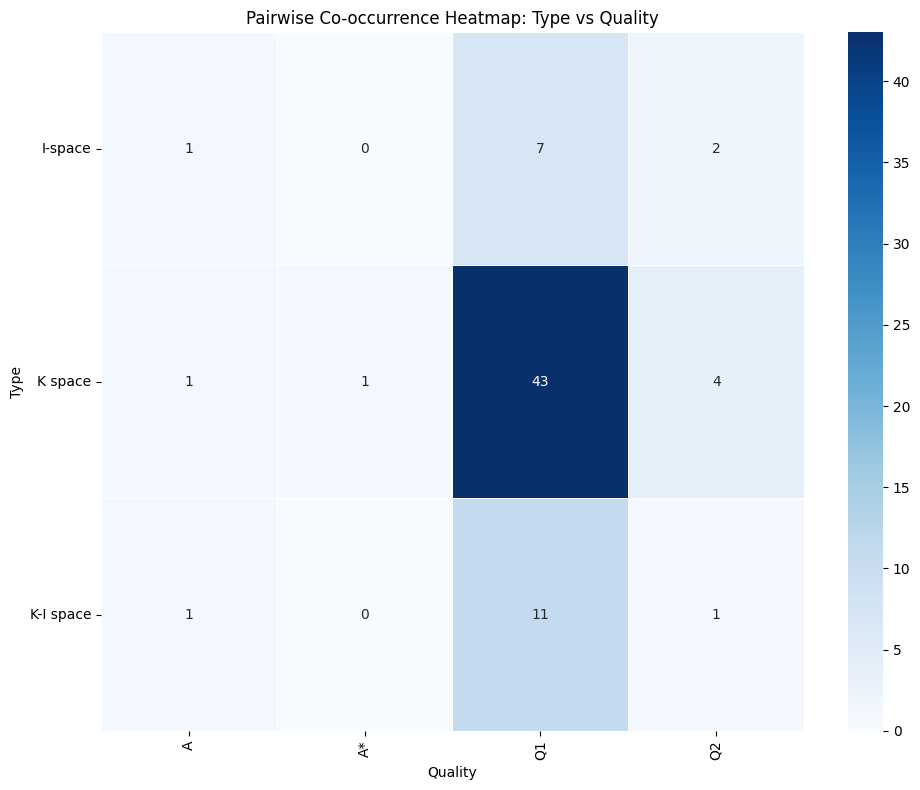

Processing pair: 'Model type' vs 'Metrics Used'
Pairwise co-occurrence matrix for 'Model type' vs 'Metrics Used' generated successfully.
target            AC2  Accuracy  Adversarial Loss  Aliasing  Artifact-Power  \
source                                                                        
Deep Learning       1         1                 1         0               0   
Machine Learning    0         0                 0         0               0   
Statistical         1         0                 0         0               0   
Traditional         0         0                 0         1               2   

target            Blurring  CNR  CRLB  Coherence  Computation Time  ...  \
source                                                              ...   
Deep Learning            1    3     0          0                 1  ...   
Machine Learning         1    0     1          0                 0  ...   
Statistical              0    0     0          0                 2  ...   
Traditional  

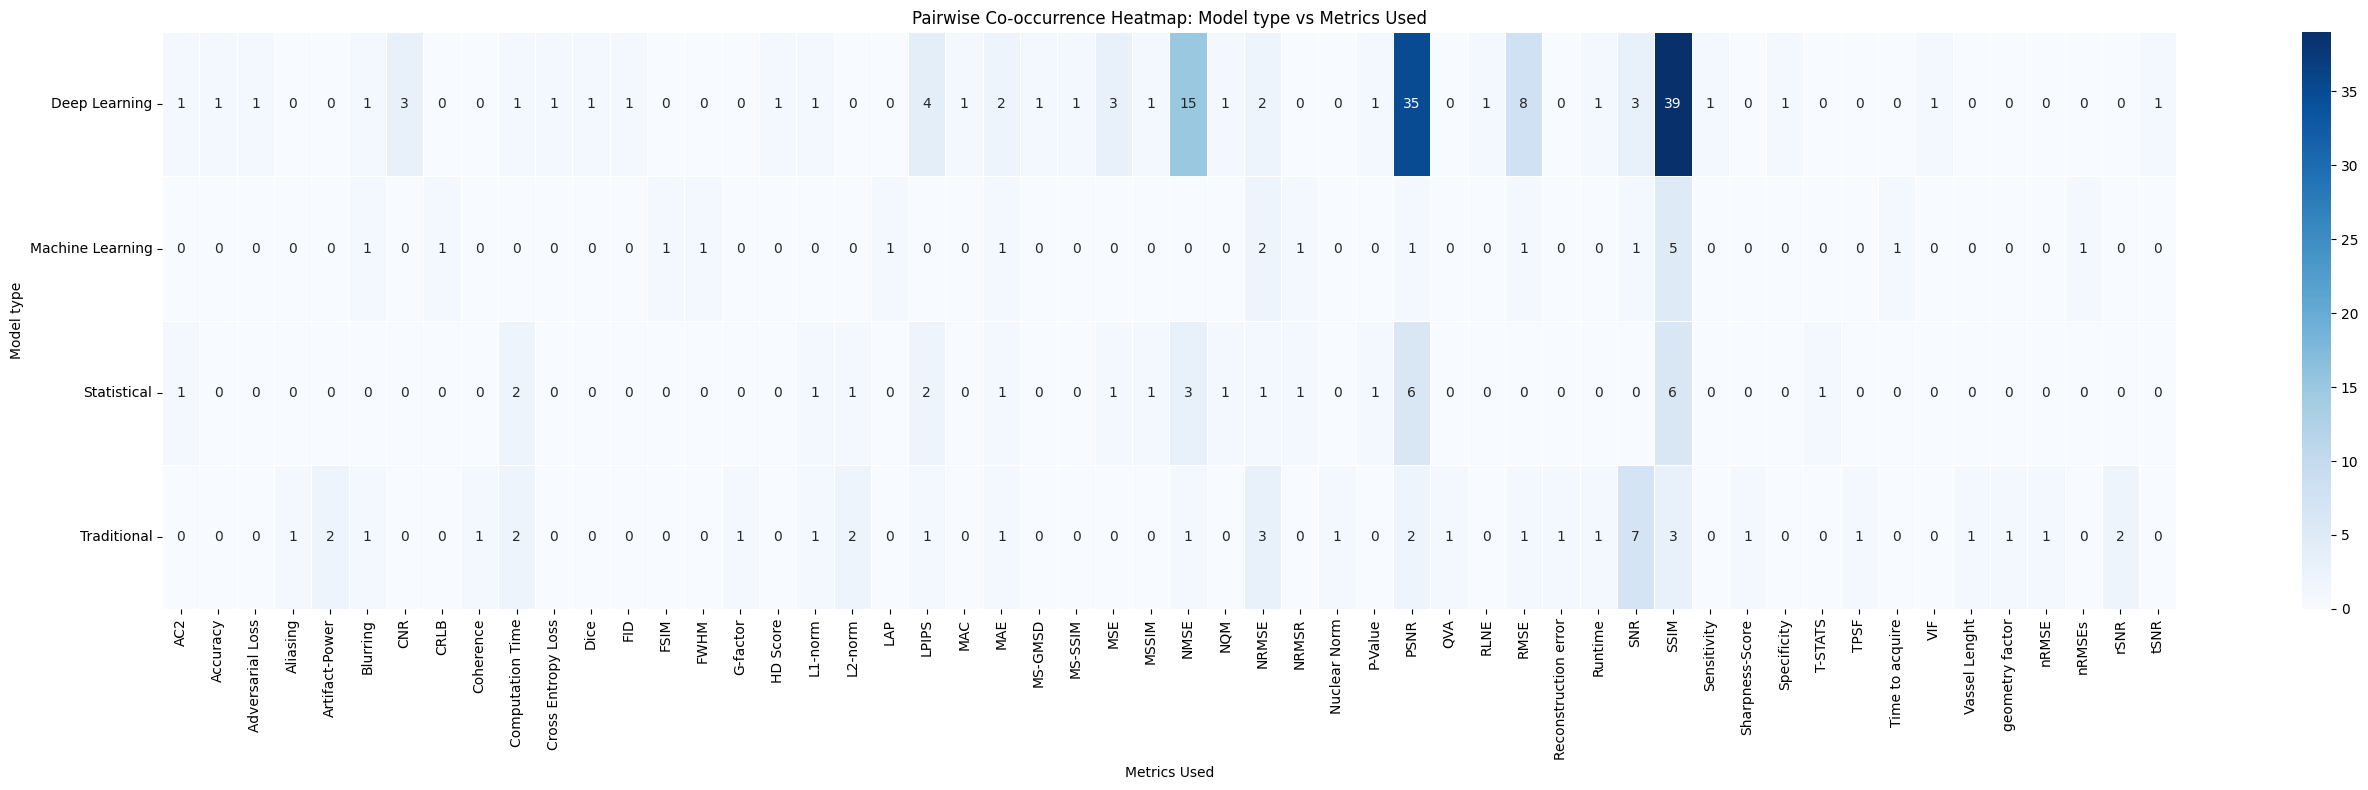

Processing pair: 'Model type' vs 'Type of MRI'
Pairwise co-occurrence matrix for 'Model type' vs 'Type of MRI' generated successfully.
target            CE  FS  Flair  PD  T1  T2
source                                     
Deep Learning      5   4      6   5  28  21
Machine Learning   0   0      1   0   2   1
Statistical        0   1      1   1   3   5
Traditional        0   0      0   0   2   1


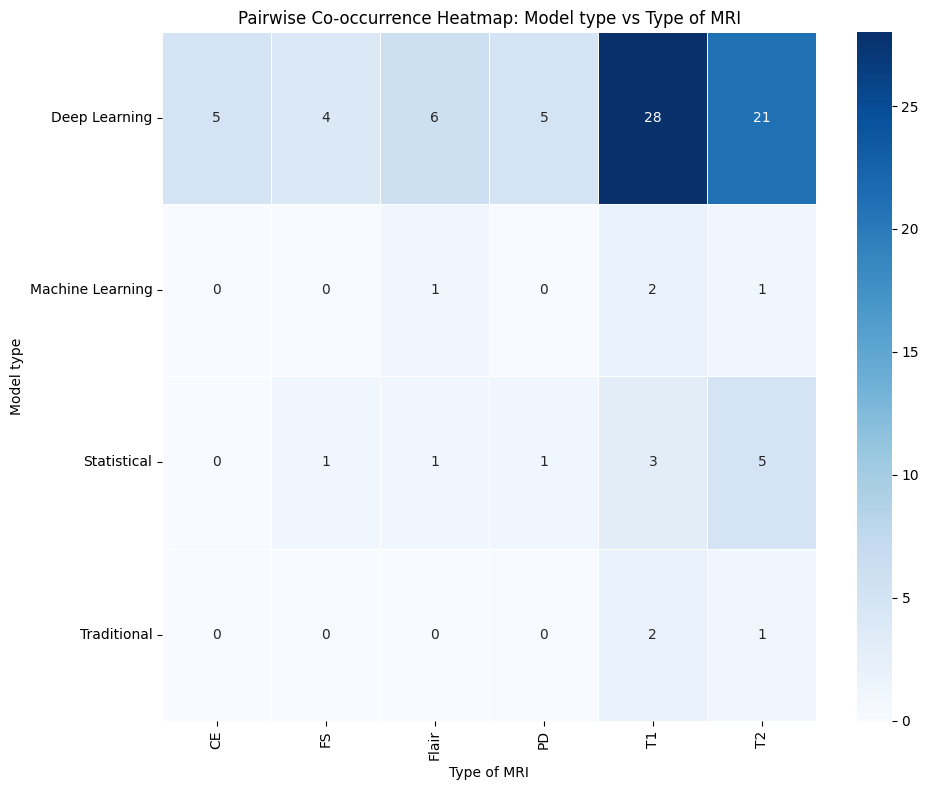

Processing pair: 'Model type' vs 'Orientation'
Pairwise co-occurrence matrix for 'Model type' vs 'Orientation' generated successfully.
target            Axial  Coronal  Saggaterial
source                                       
Deep Learning        33        5           12
Machine Learning      4        1            1
Statistical           8        0            2
Traditional           2        1            2


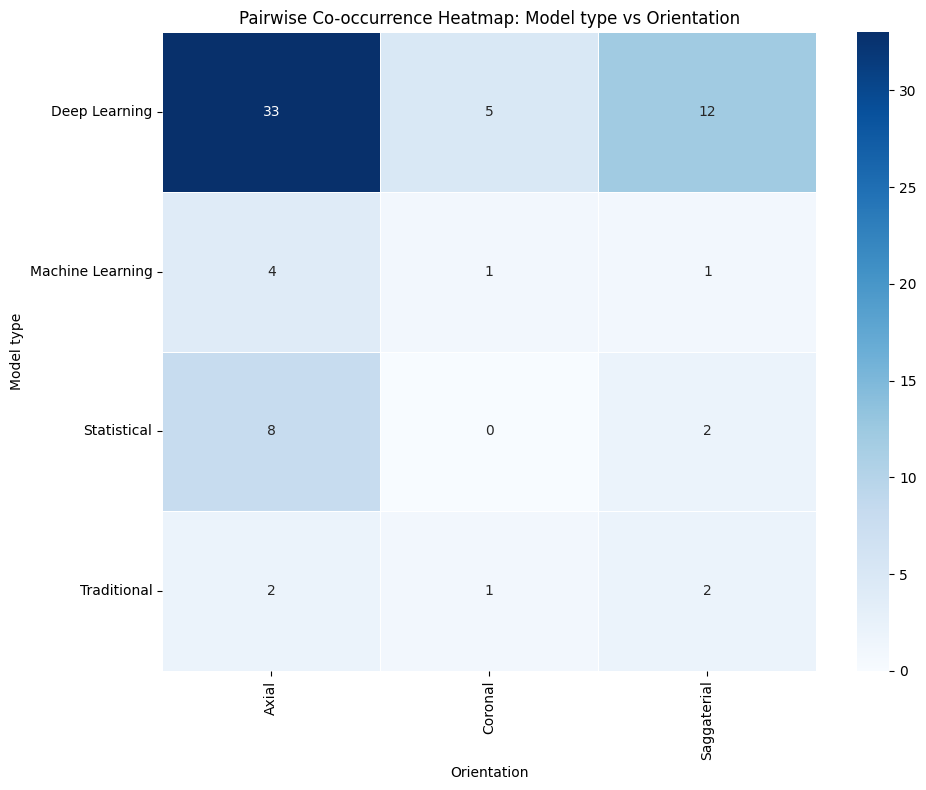

Processing pair: 'Model type' vs 'Published Place'
Pairwise co-occurrence matrix for 'Model type' vs 'Published Place' generated successfully.
target            AAS  ACS  AIM  ARX  CBM  CVPR  EIECC  ICIPMI  ICLR  \
source                                                                 
Deep Learning       0    1    1    4    1     2      1       2     0   
Machine Learning    0    0    0    0    0     0      0       0     0   
Statistical         1    0    1    0    0     1      0       0     1   
Traditional         0    0    0    0    0     0      0       0     0   

target            IEEE- TNNLS  ...  NC  NI  NRMB  PLS-ONE  PMB  QIMS  R  RA  \
source                         ...                                            
Deep Learning               1  ...   1   1     1        0    1     1  1   1   
Machine Learning            0  ...   0   2     0        0    0     0  0   0   
Statistical                 0  ...   0   0     0        1    1     0  1   0   
Traditional                 0

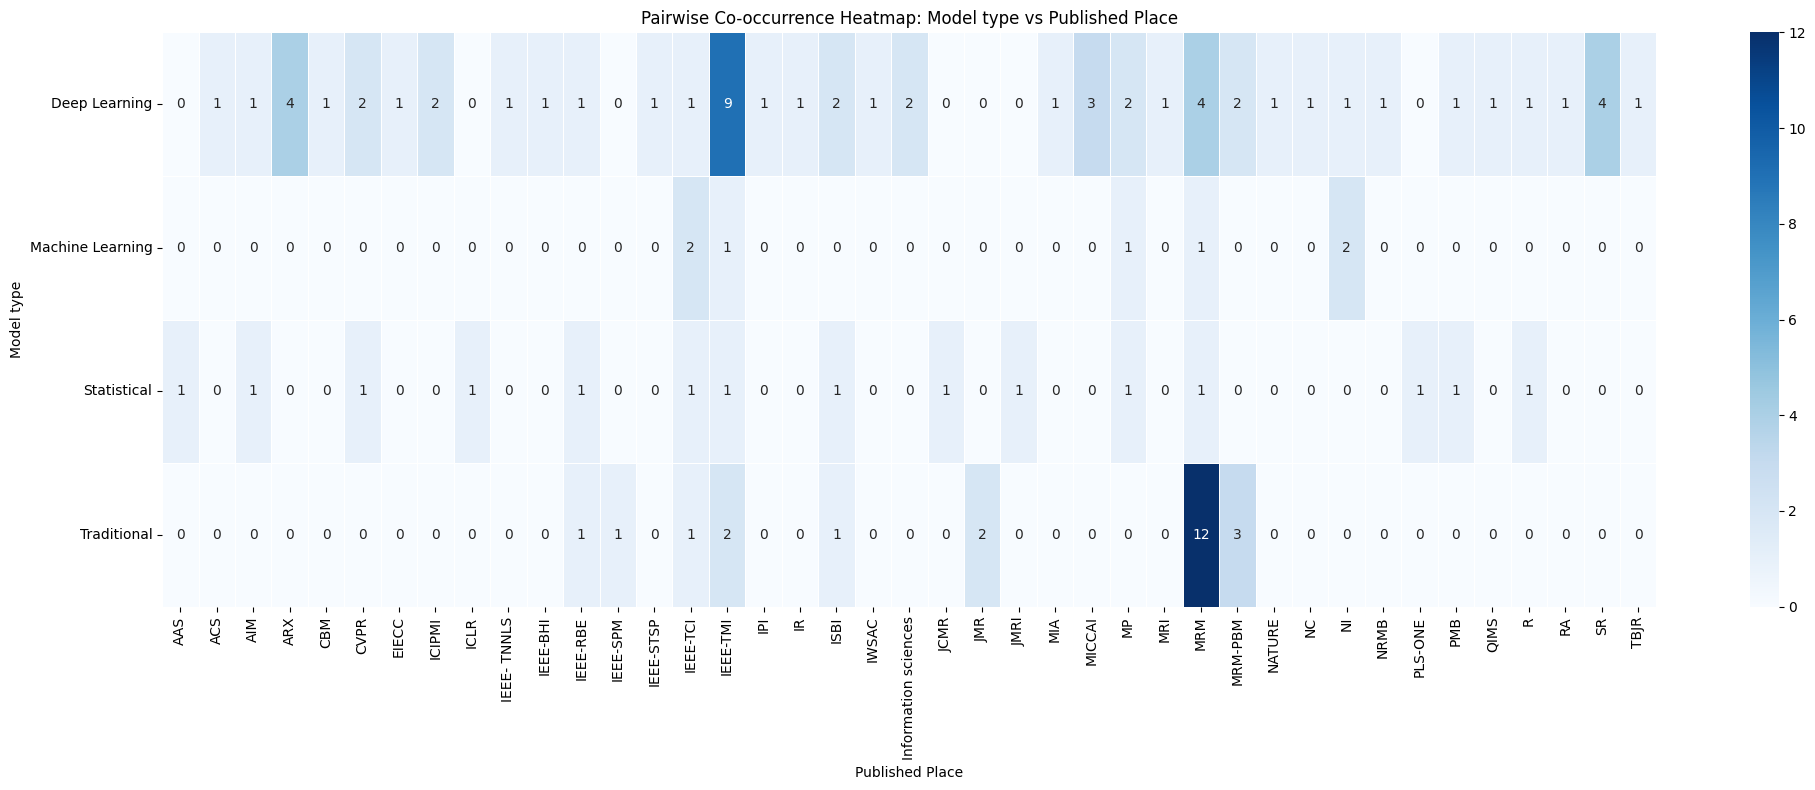

Processing pair: 'Model type' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Model type' vs 'Body Parts' generated successfully.
target            Brain  Cardiac  Joints (Knee and Elbow)  Knee  Mussles  \
source                                                                     
Deep Learning        40        4                        1    14        1   
Machine Learning      7        0                        0     1        0   
Statistical           9        0                        0     4        0   
Traditional          14       11                        1     0        0   

target            Others  Prostate  Spine  abdomen  
source                                              
Deep Learning          3         1      1        1  
Machine Learning       0         0      0        0  
Statistical            0         1      0        1  
Traditional            1         0      0        5  


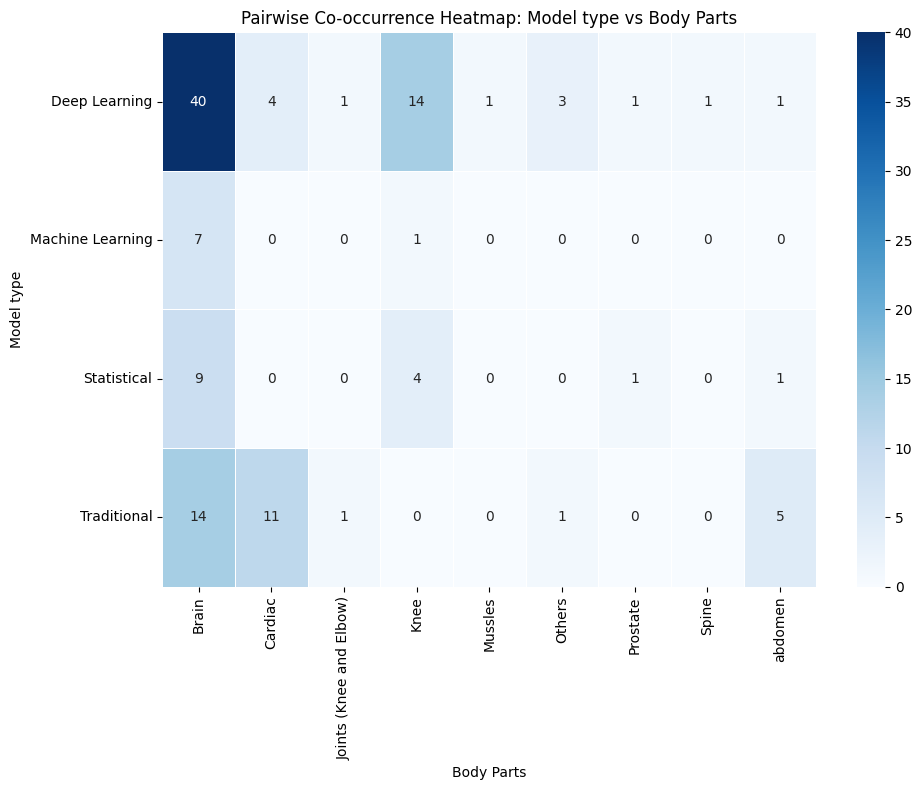

Processing pair: 'Model type' vs 'Quality'
Pairwise co-occurrence matrix for 'Model type' vs 'Quality' generated successfully.
target            A  A*  Q1  Q2
source                         
Deep Learning     3   1  39   4
Machine Learning  0   0   7   0
Statistical       0   0  13   0
Traditional       0   0  17   3


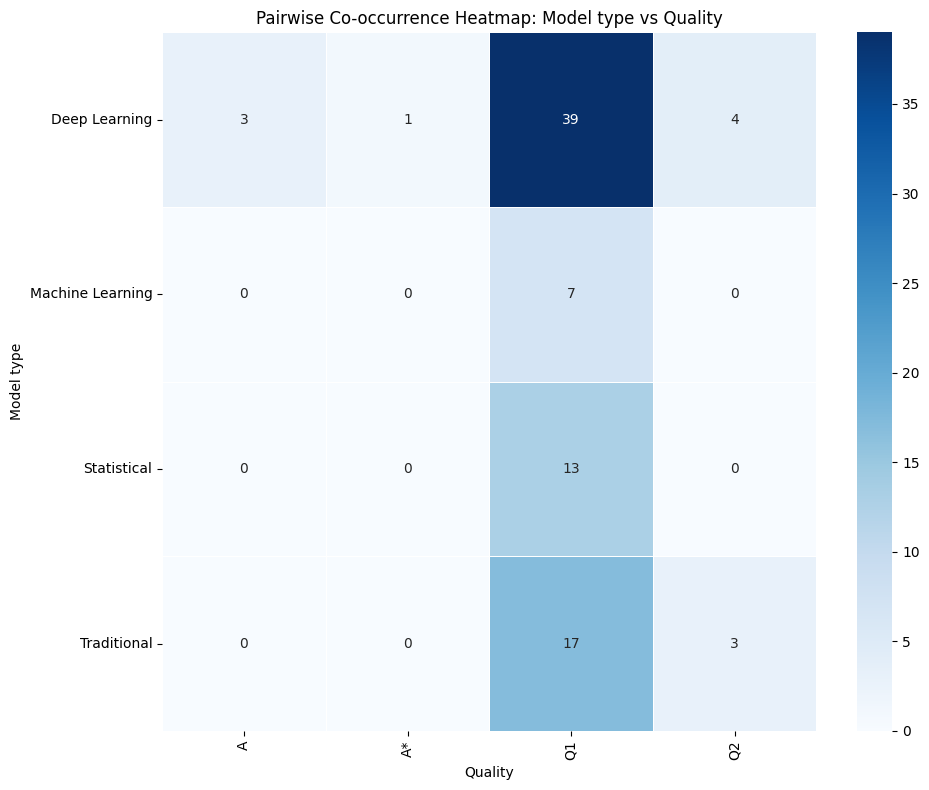

Processing pair: 'Metrics Used' vs 'Type of MRI'
Pairwise co-occurrence matrix for 'Metrics Used' vs 'Type of MRI' generated successfully.
target            CE  FS  Flair  PD  T1  T2
source                                     
AC2                0   2      0   2   0   2
Accuracy           0   0      0   0   1   1
Aliasing           0   0      0   0   1   1
Blurring           0   0      0   0   1   1
CNR                0   1      0   1   1   0
Computation Time   0   0      0   1   1   0
FID                1   0      1   0   1   1
L1-norm            0   0      0   0   1   0
LPIPS              0   0      0   0   1   2
MAC                1   0      1   0   1   1
MAE                0   0      0   0   1   1
MS-GMSD            1   0      1   0   1   1
MS-SSIM            1   0      1   0   1   1
MSE                1   0      0   0   1   1
MSSIM              0   0      0   0   0   1
NMSE               1   1      2   1   9   8
NQM                0   0      0   0   0   1
NRMSE              0   0 

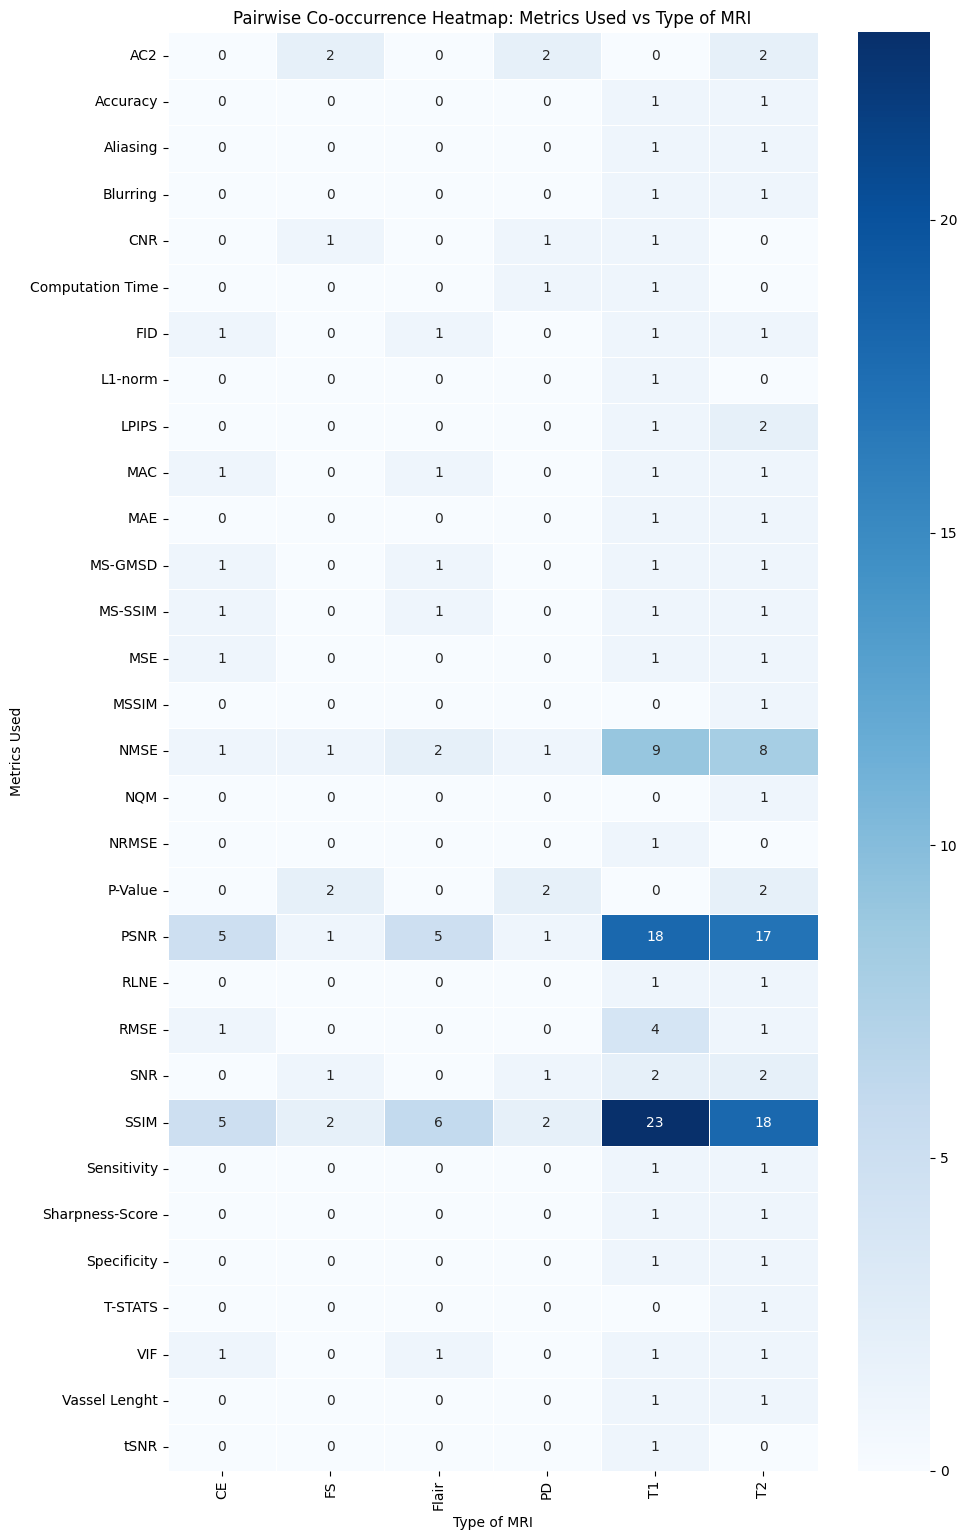

Processing pair: 'Metrics Used' vs 'Orientation'
Pairwise co-occurrence matrix for 'Metrics Used' vs 'Orientation' generated successfully.
target            Axial  Coronal  Saggaterial
source                                       
AC2                   1        0            0
Aliasing              1        1            1
Blurring              2        2            1
CNR                   2        0            1
Computation Time      1        0            0
Dice                  1        0            0
FID                   0        0            1
HD Score              1        0            0
L1-norm               1        0            0
LPIPS                 2        0            2
MAC                   0        0            1
MAE                   2        0            0
MS-GMSD               1        0            0
MS-SSIM               1        0            0
MSE                   3        0            0
MSSIM                 1        0            0
NMSE                 11        2 

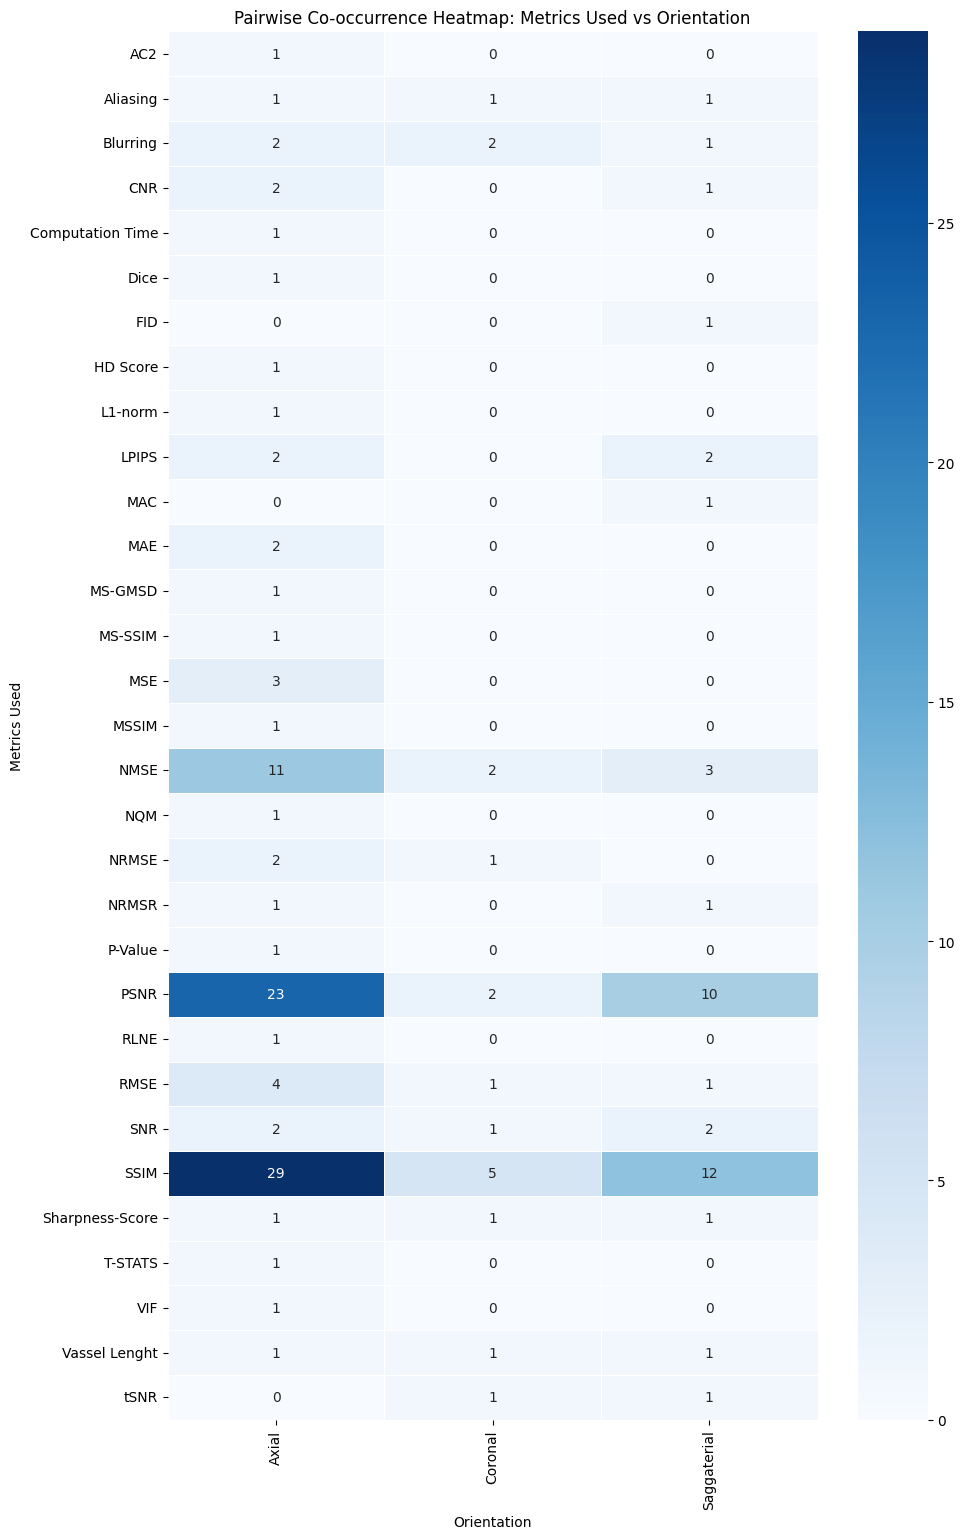

Processing pair: 'Metrics Used' vs 'Published Place'
Pairwise co-occurrence matrix for 'Metrics Used' vs 'Published Place' generated successfully.
target                AAS  ACS  AIM  ARX  CBM  CVPR  EIECC  ICIPMI  \
source                                                               
AC2                     0    0    0    0    0     0      0       0   
Accuracy                0    0    0    0    0     0      0       0   
Adversarial Loss        0    0    0    1    0     0      0       0   
Aliasing                0    0    0    0    0     0      0       0   
Artifact-Power          0    0    0    0    0     0      0       0   
Blurring                0    0    0    0    0     0      0       0   
CNR                     0    0    0    0    0     0      0       0   
CRLB                    0    0    0    0    0     0      0       0   
Coherence               0    0    0    0    0     0      0       0   
Computation Time        0    0    0    0    0     0      0       0   
Cross Entropy

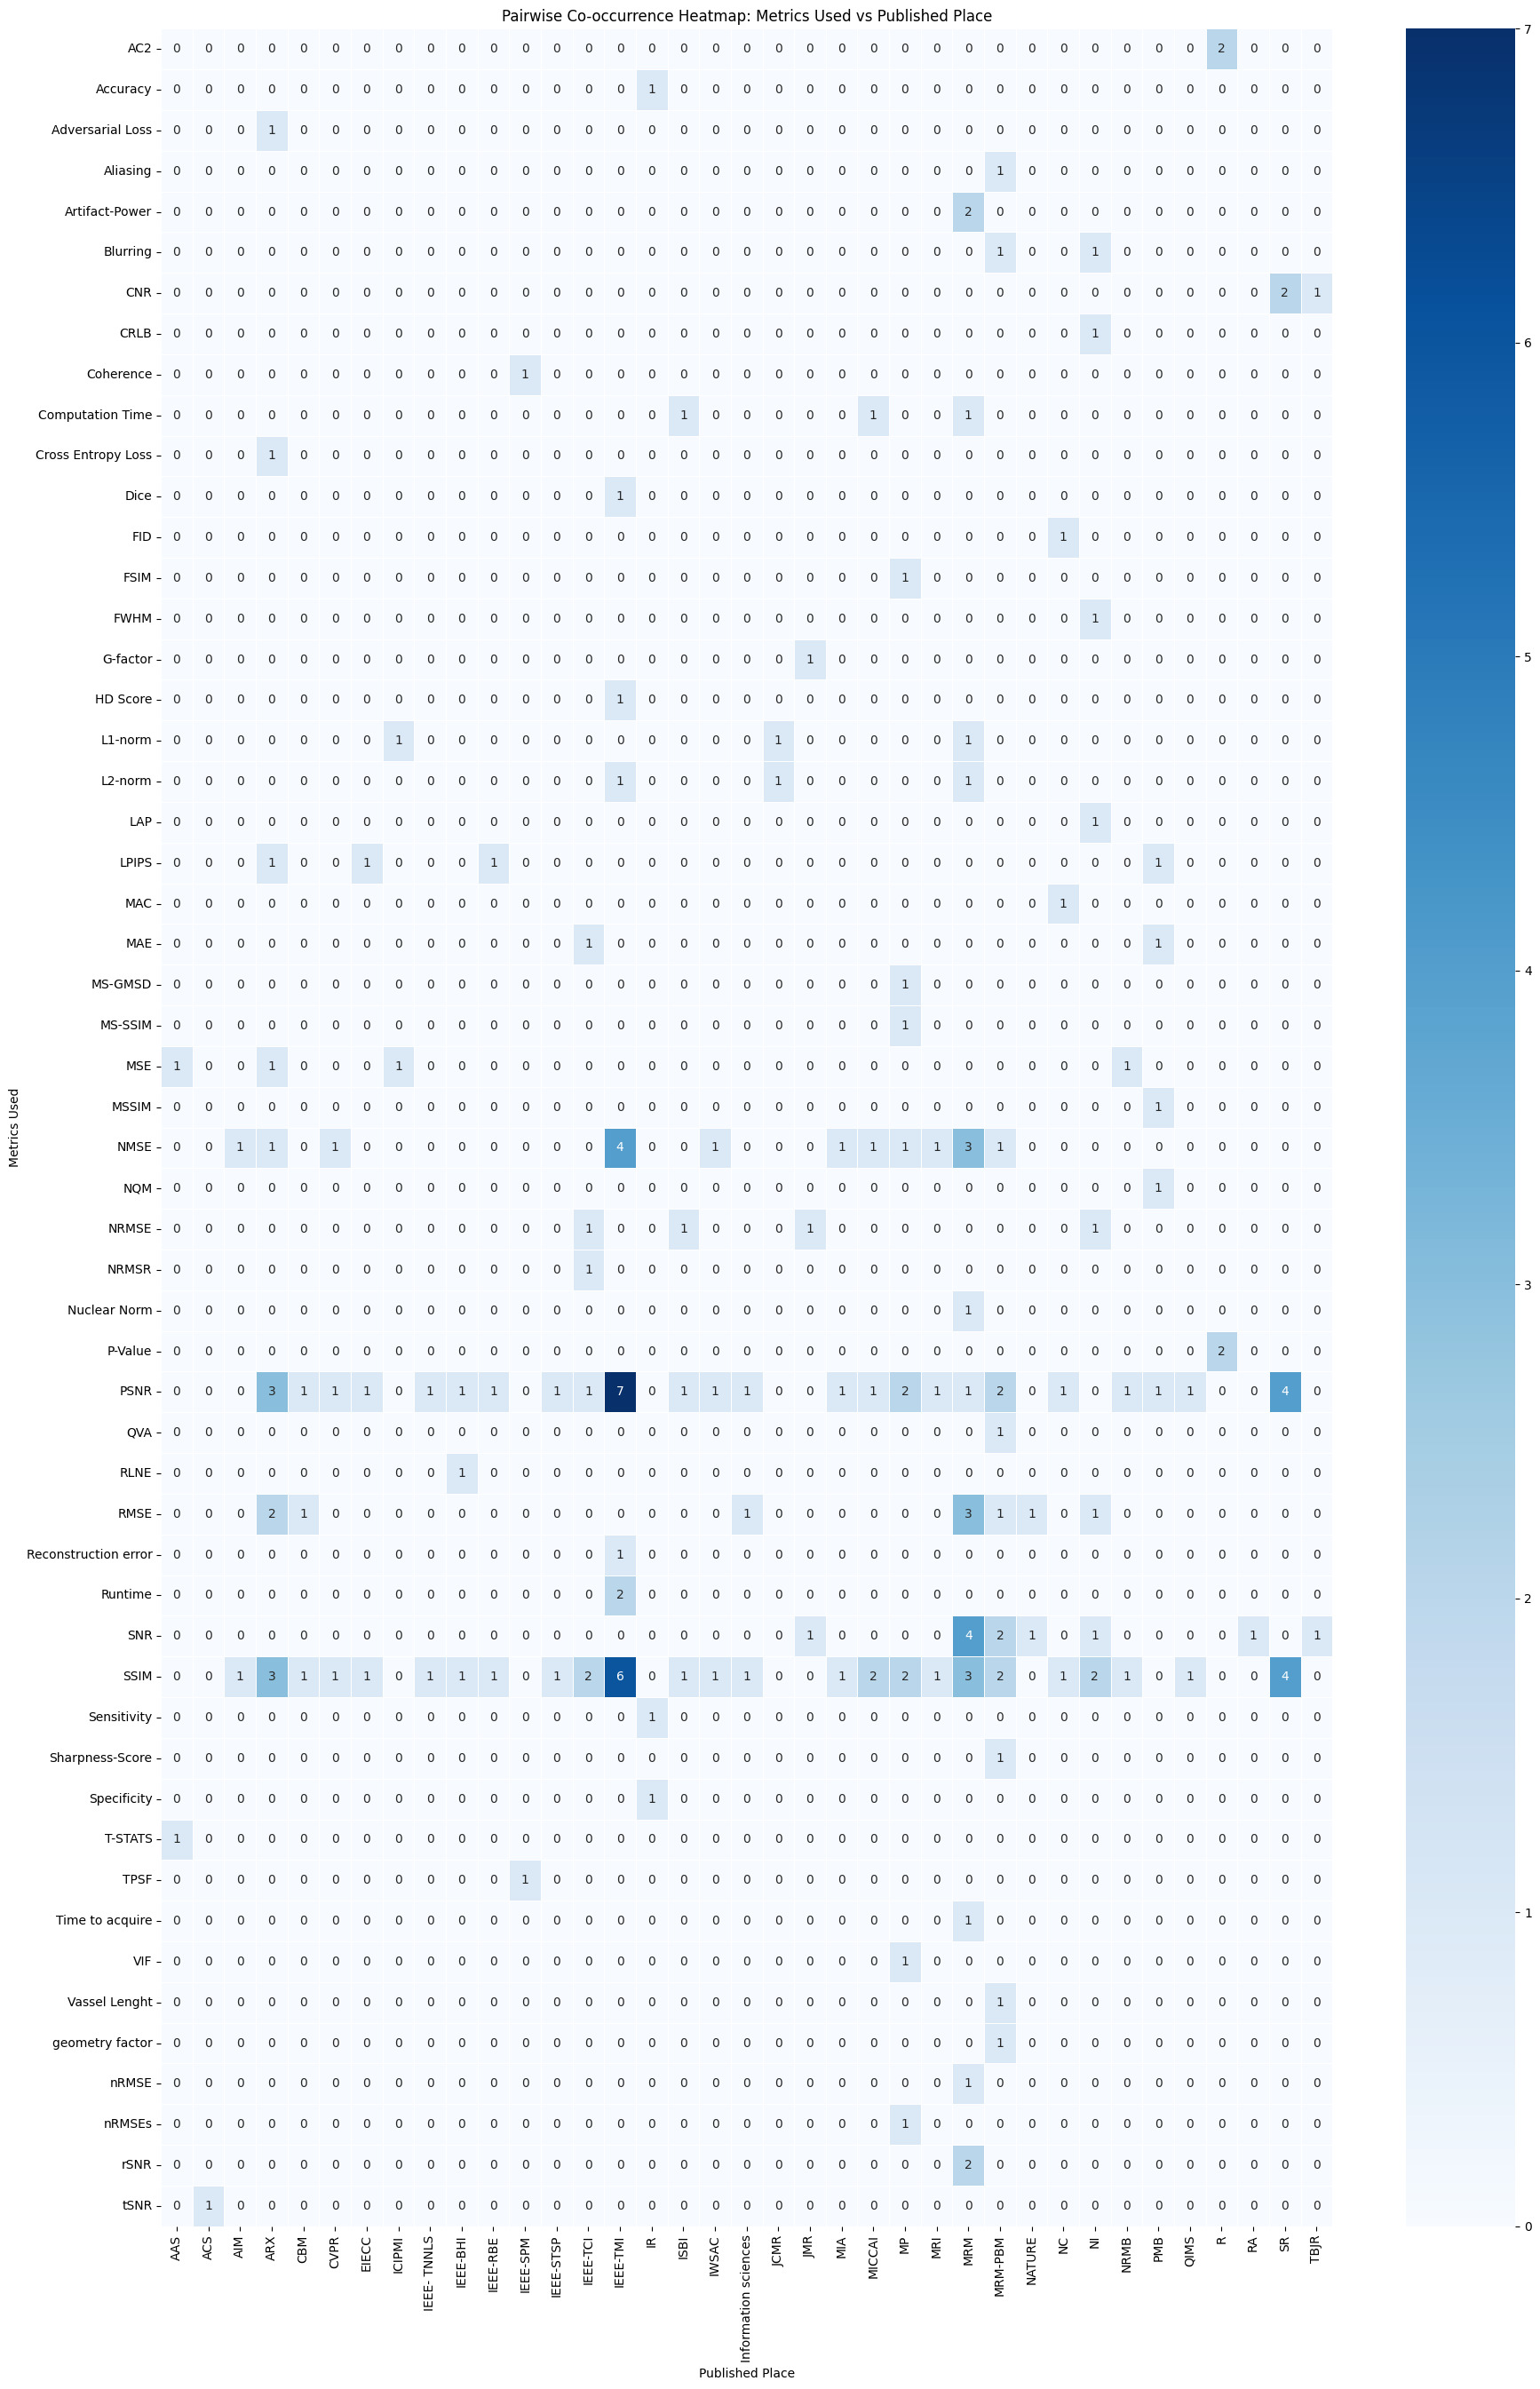

Processing pair: 'Metrics Used' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Metrics Used' vs 'Body Parts' generated successfully.
target                Brain  Cardiac  Joints (Knee and Elbow)  Knee  Mussles  \
source                                                                         
AC2                       0        0                        0     2        0   
Accuracy                  0        0                        0     1        0   
Adversarial Loss          0        0                        0     0        0   
Aliasing                  0        1                        0     0        0   
Artifact-Power            0        2                        0     0        0   
Blurring                  1        1                        0     0        0   
CNR                       1        0                        0     1        0   
CRLB                      1        0                        0     0        0   
Coherence                 1        1                        0  

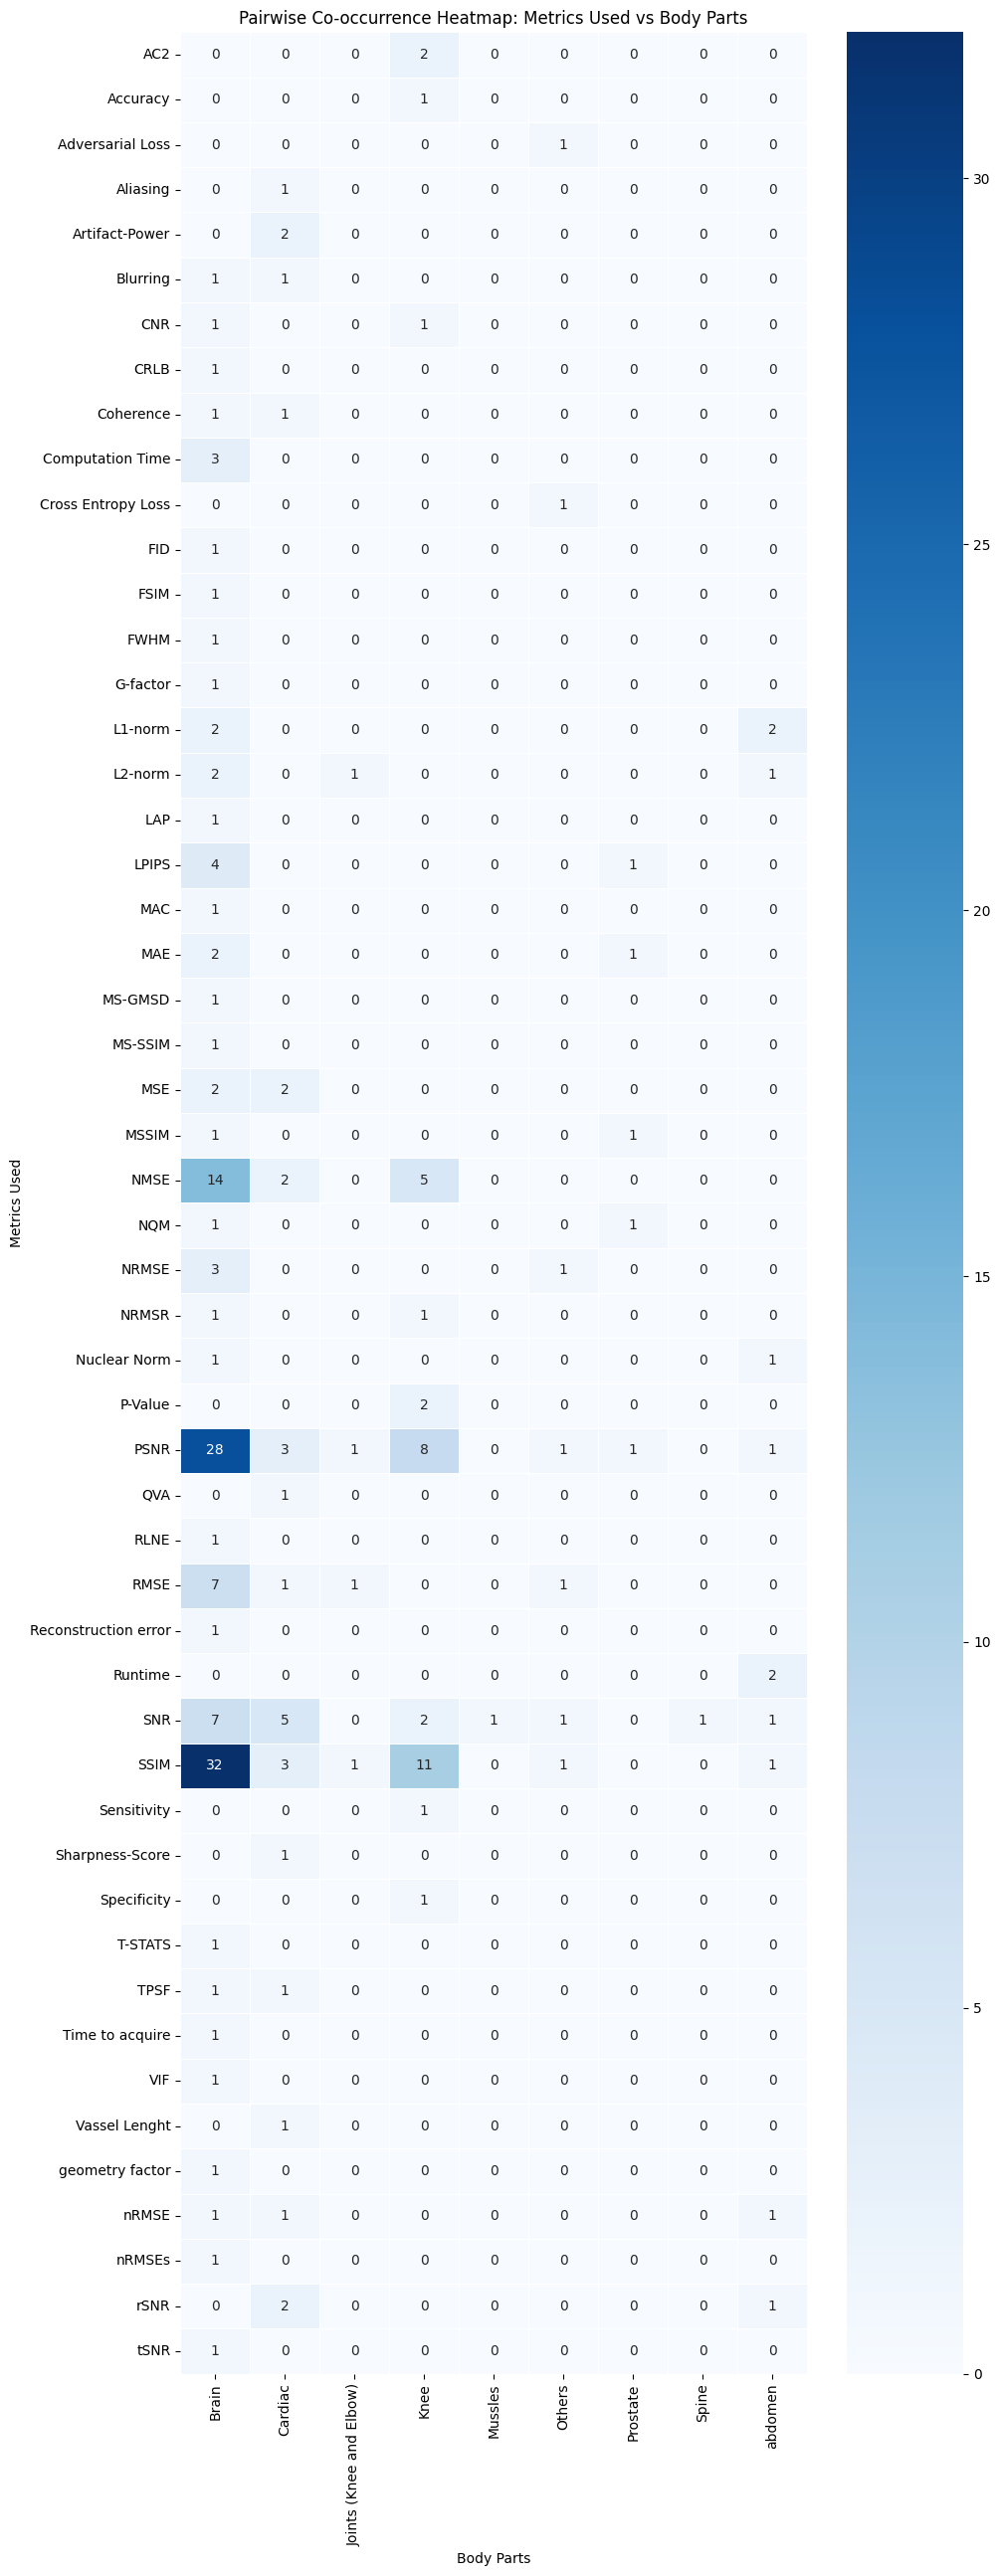

Processing pair: 'Metrics Used' vs 'Quality'
Pairwise co-occurrence matrix for 'Metrics Used' vs 'Quality' generated successfully.
target                A  Q1  Q2
source                         
AC2                   0   2   0
Accuracy              0   1   0
Aliasing              0   0   1
Artifact-Power        0   2   0
Blurring              0   1   1
CNR                   0   3   0
CRLB                  0   1   0
Coherence             0   1   0
Computation Time      1   1   0
Dice                  0   1   0
FID                   0   1   0
FSIM                  0   1   0
FWHM                  0   1   0
HD Score              0   1   0
L1-norm               0   2   0
L2-norm               0   3   0
LAP                   0   1   0
LPIPS                 0   2   0
MAC                   0   1   0
MAE                   0   2   0
MS-GMSD               0   1   0
MS-SSIM               0   1   0
MSE                   0   2   0
MSSIM                 0   1   0
NMSE                  1  11   2
NQM  

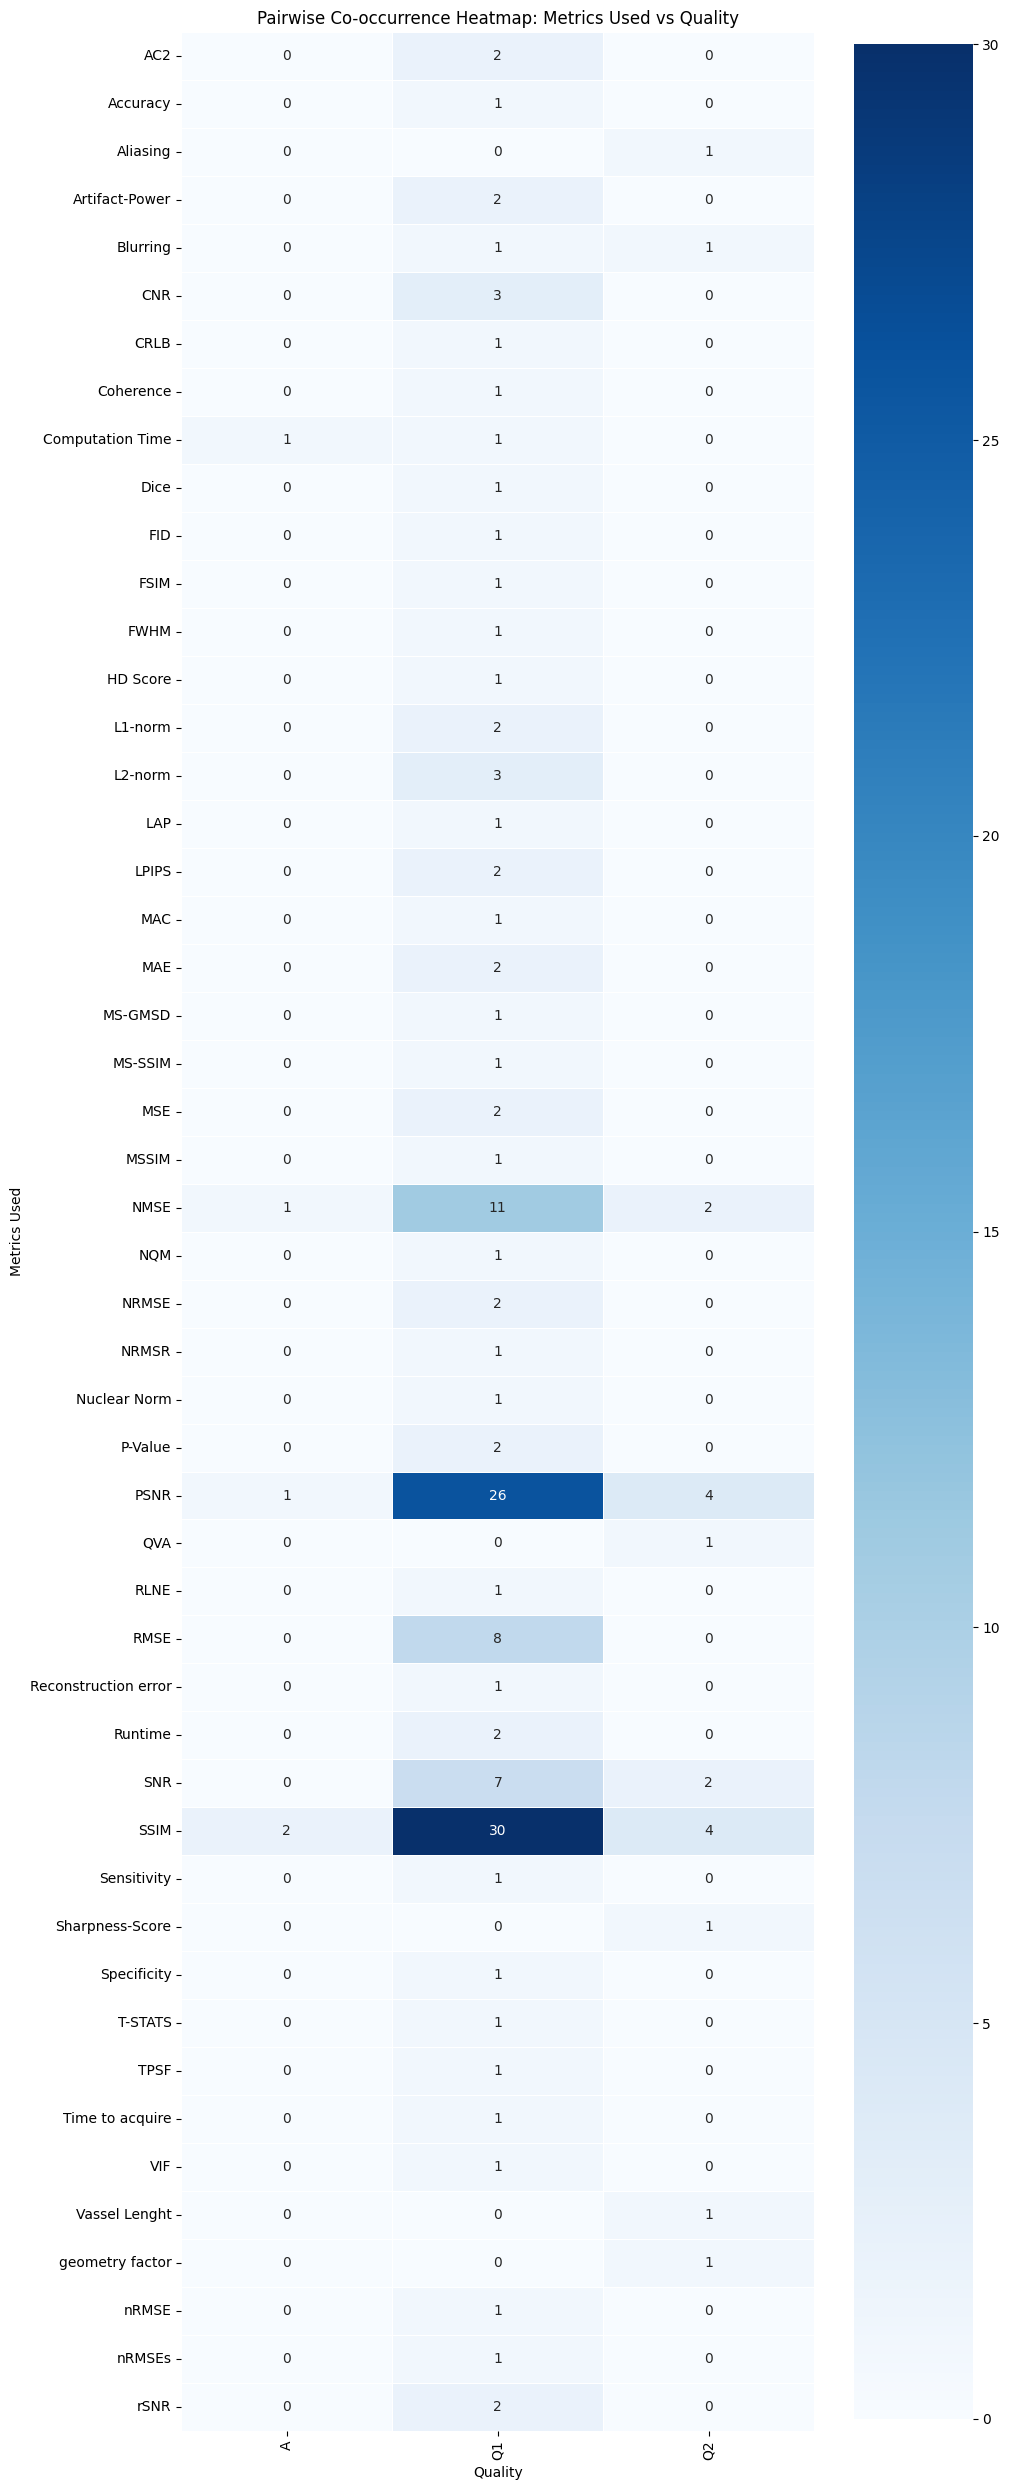

Processing pair: 'Type of MRI' vs 'Orientation'
Pairwise co-occurrence matrix for 'Type of MRI' vs 'Orientation' generated successfully.
target  Axial  Coronal  Saggaterial
source                             
CE          4        0            1
FS          2        1            3
Flair       5        0            1
PD          3        1            3
T1         23        4            7
T2         18        3            6


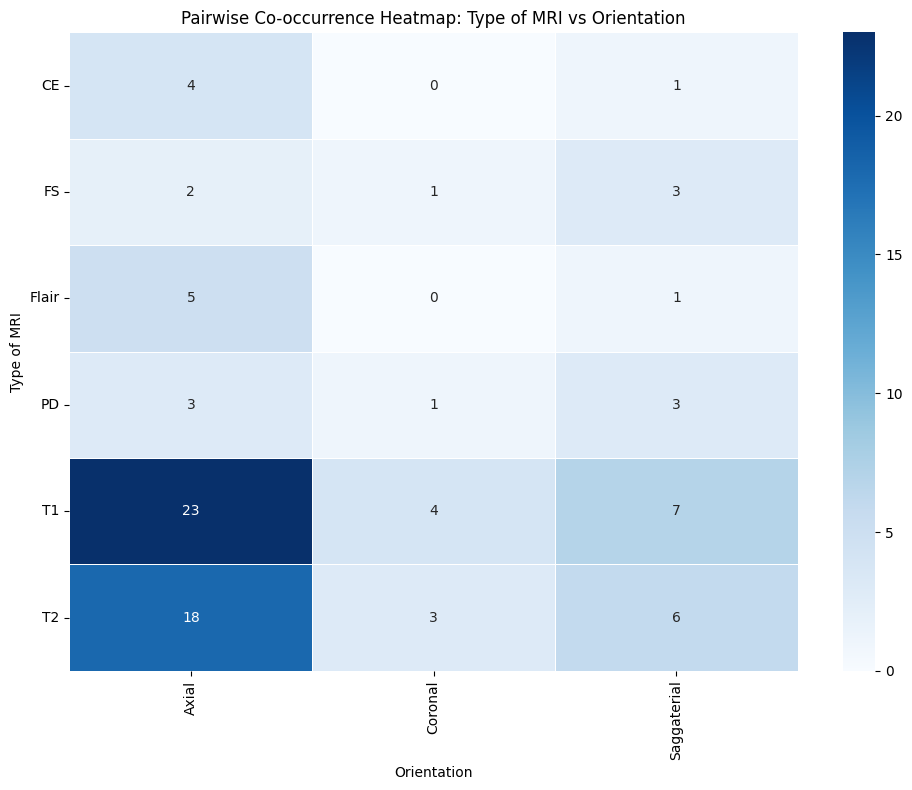

Processing pair: 'Type of MRI' vs 'Published Place'
Pairwise co-occurrence matrix for 'Type of MRI' vs 'Published Place' generated successfully.
target  AAS  ACS  ARX  CBM  CVPR  ICIPMI  IEEE- TNNLS  IEEE-BHI  IEEE-STSP  \
source                                                                       
CE        0    0    1    1     0       0            1         0          0   
FS        0    0    0    0     0       0            0         0          0   
Flair     0    0    0    0     0       0            1         0          0   
PD        0    0    0    0     0       0            0         0          0   
T1        0    1    3    1     1       1            1         1          0   
T2        1    0    1    1     0       0            1         1          1   

target  IEEE-TCI  ...  MRI  MRM  MRM-PBM  NC  PMB  QIMS  R  RA  SR  TBJR  
source            ...                                                     
CE             0  ...    0    0        0   1    0     0  0   0   0     0  
FS   

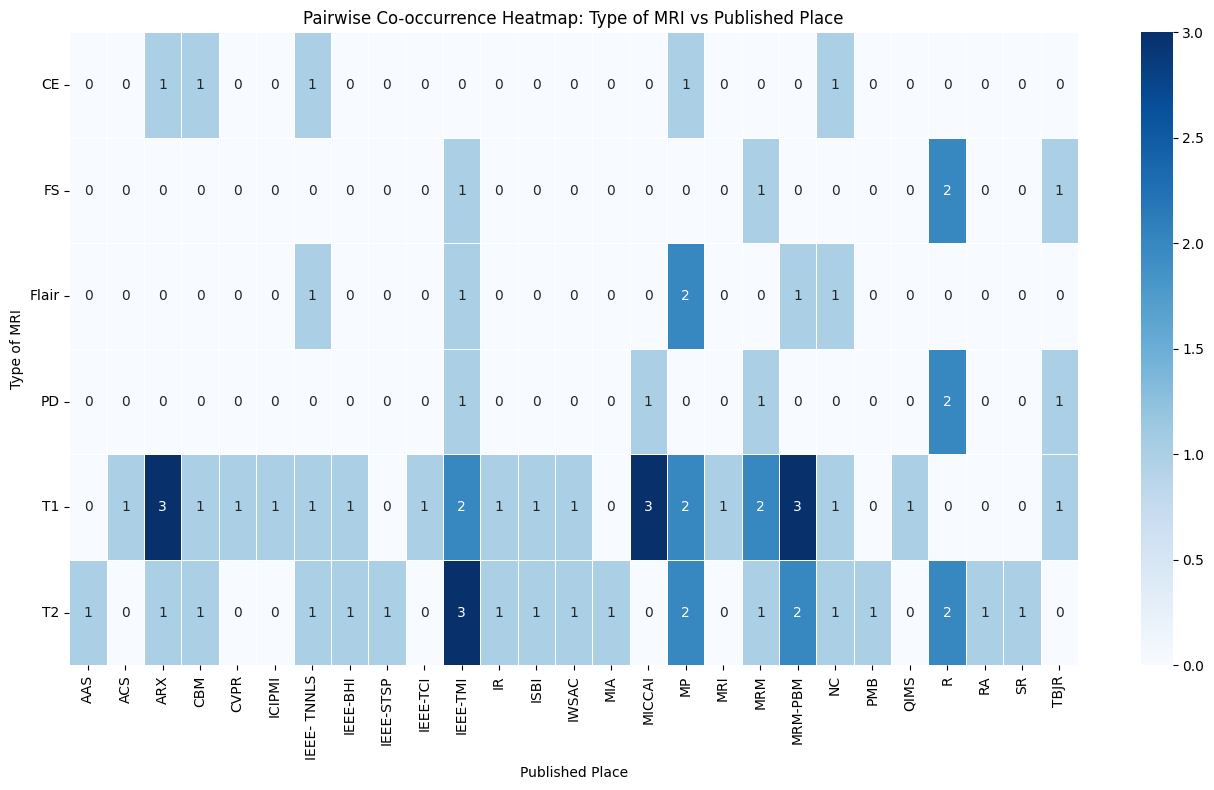

Processing pair: 'Type of MRI' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Type of MRI' vs 'Body Parts' generated successfully.
target  Brain  Cardiac  Knee  Mussles  Others  Prostate  Spine
source                                                        
CE          5        0     0        0       0         0      0
FS          2        0     5        0       0         0      0
Flair       5        0     0        0       0         0      0
PD          3        0     5        0       0         0      0
T1         23        2     7        0       1         0      0
T2         17        2    10        1       1         1      1


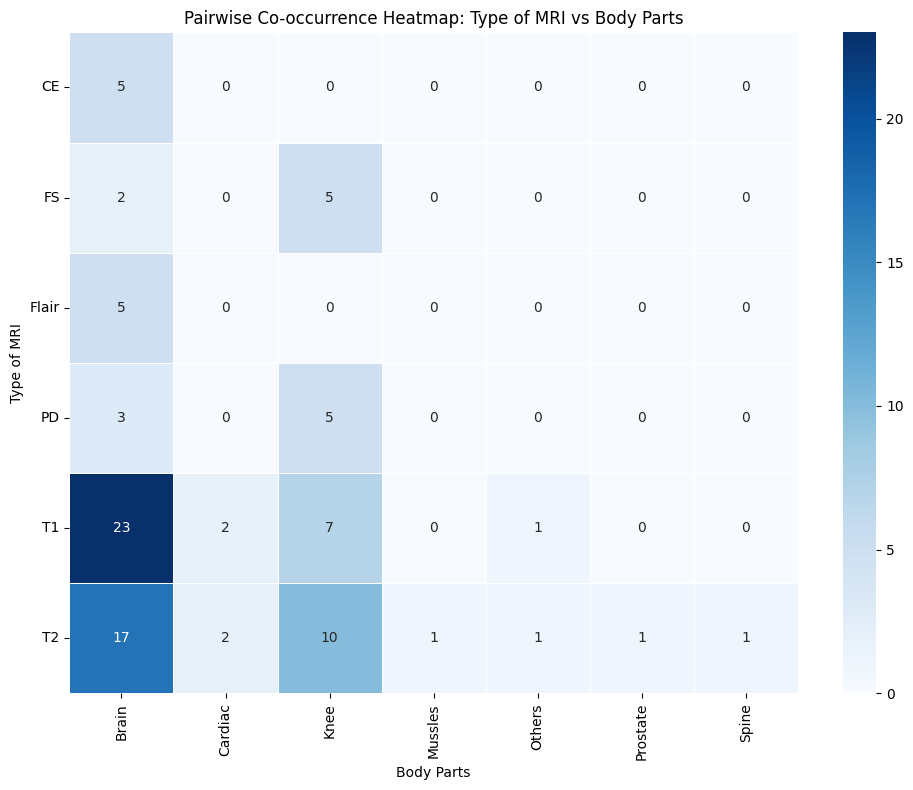

Processing pair: 'Type of MRI' vs 'Quality'
Pairwise co-occurrence matrix for 'Type of MRI' vs 'Quality' generated successfully.
target  A  Q1  Q2
source           
CE      0   4   0
FS      0   5   0
Flair   0   5   1
PD      1   5   0
T1      3  15   4
T2      0  18   2


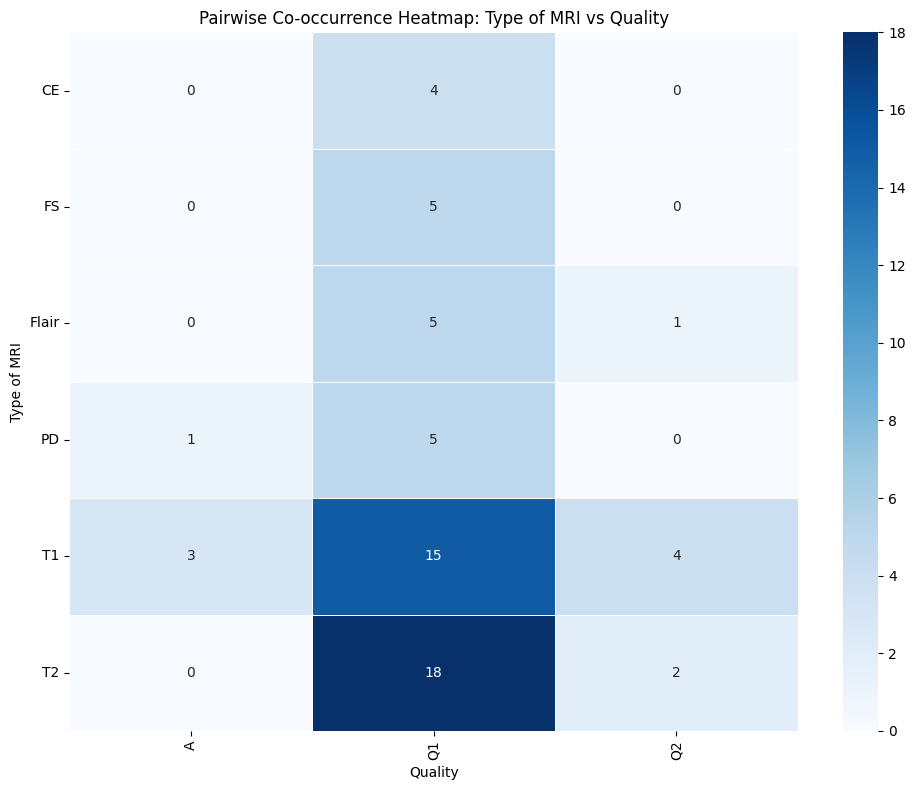

Processing pair: 'Orientation' vs 'Published Place'
Pairwise co-occurrence matrix for 'Orientation' vs 'Published Place' generated successfully.
target       AAS  ACS  AIM  ARX  CBM  CVPR  EIECC  ICIPMI  IEEE- TNNLS  \
source                                                                   
Axial          1    0    1    3    1     1      0       1            1   
Coronal        0    1    0    0    0     0      0       0            0   
Saggaterial    0    1    0    0    0     0      1       0            0   

target       IEEE-BHI  ...  MRM-PBM  NC  NI  NRMB  PMB  QIMS  R  RA  SR  TBJR  
source                 ...                                                     
Axial               1  ...        3   0   1     1    1     1  1   1   2     0  
Coronal             0  ...        1   0   1     0    0     0  0   0   0     0  
Saggaterial         0  ...        1   1   0     0    0     0  0   0   2     1  

[3 rows x 30 columns]


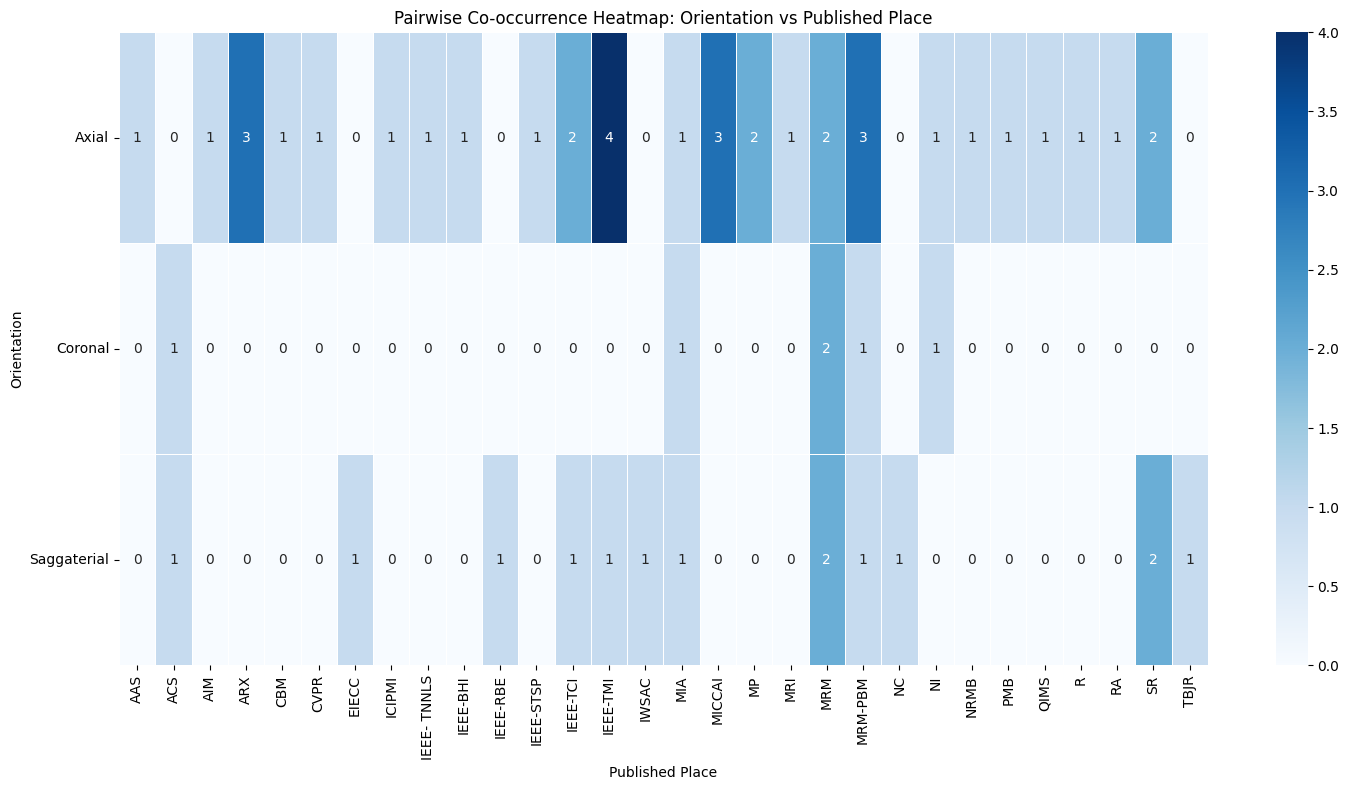

Processing pair: 'Orientation' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Orientation' vs 'Body Parts' generated successfully.
target       Brain  Cardiac  Knee  Mussles  Others  Prostate  Spine
source                                                             
Axial           30        2    10        1       2         1      1
Coronal          5        1     1        0       0         0      0
Saggaterial      9        2     5        0       0         0      0


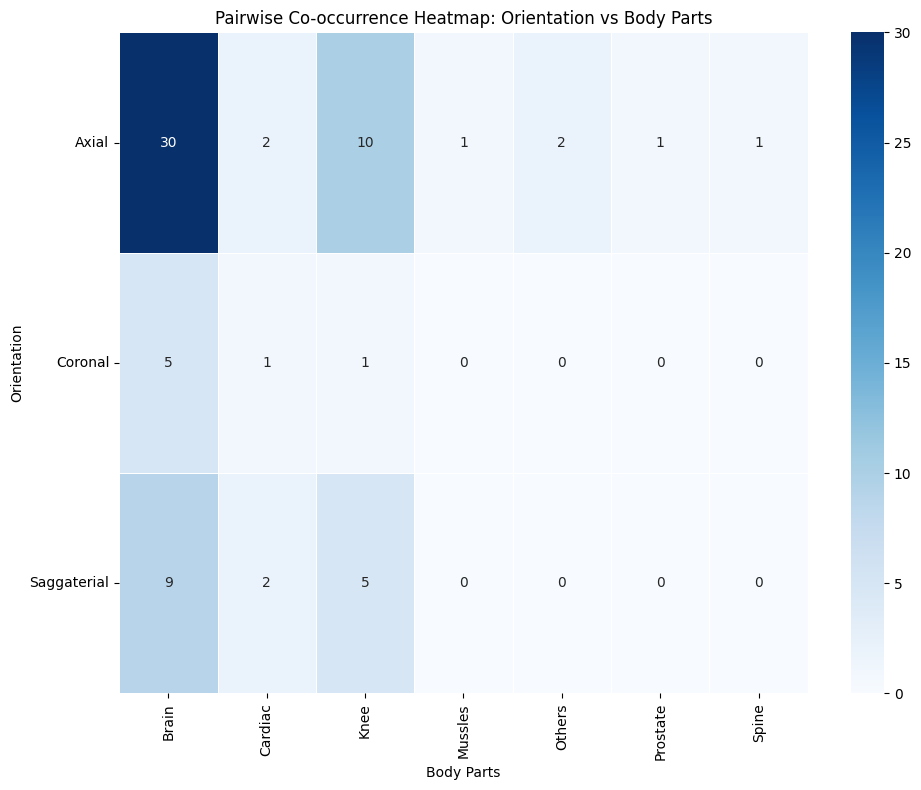

Processing pair: 'Orientation' vs 'Quality'
Pairwise co-occurrence matrix for 'Orientation' vs 'Quality' generated successfully.
target       A  Q1  Q2
source                
Axial        3  25   4
Coronal      0   4   1
Saggaterial  0  10   1


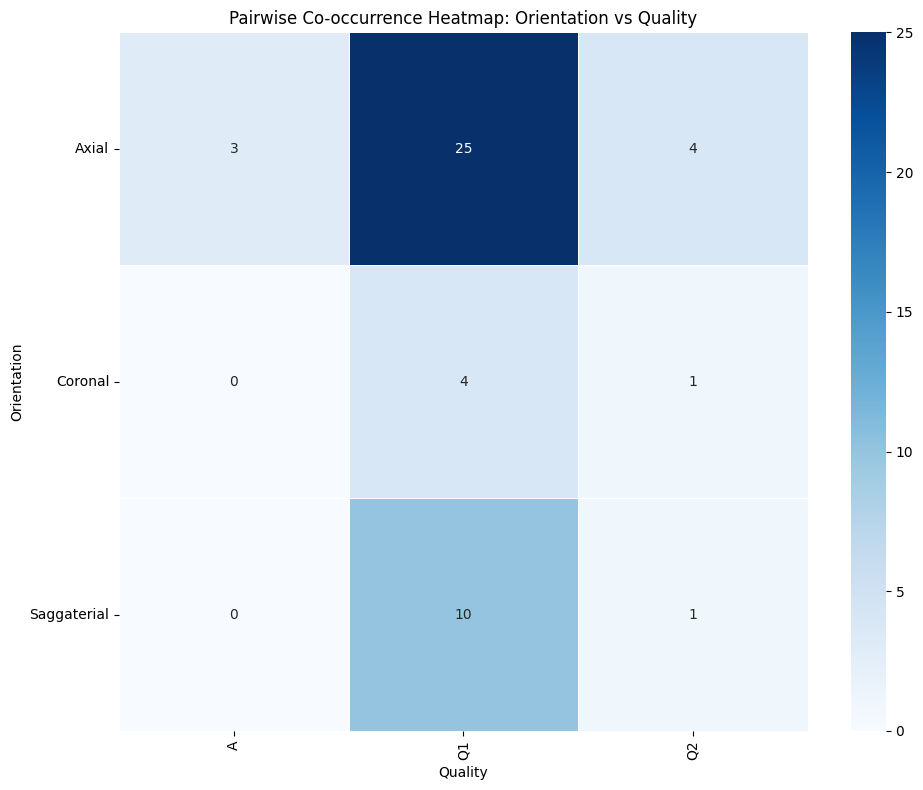

Processing pair: 'Published Place' vs 'Body Parts'
Pairwise co-occurrence matrix for 'Published Place' vs 'Body Parts' generated successfully.
target                Brain  Cardiac  Joints (Knee and Elbow)  Knee  Mussles  \
source                                                                         
AAS                       1        0                        0     0        0   
ACS                       1        0                        0     0        0   
AIM                       1        0                        0     1        0   
ARX                       3        0                        0     0        0   
CBM                       1        0                        0     0        0   
CVPR                      1        0                        0     0        0   
EIECC                     1        0                        0     0        0   
ICIPMI                    1        1                        0     0        0   
IEEE- TNNLS               1        0                     

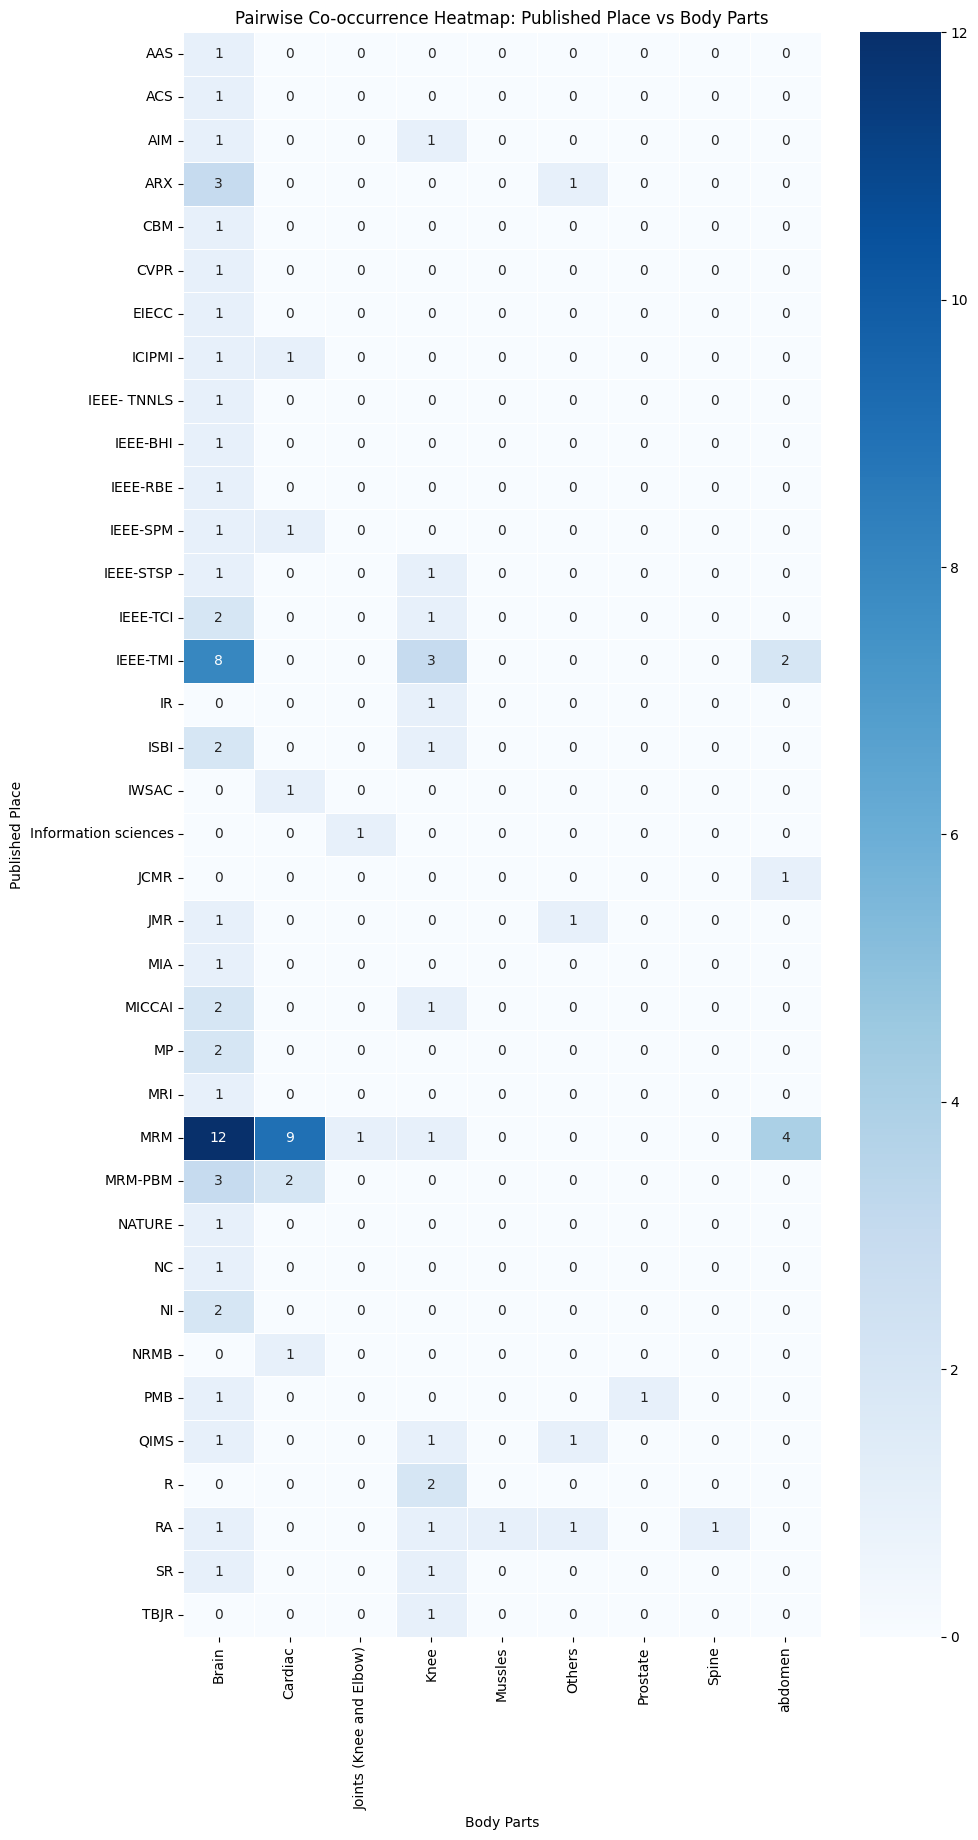

Processing pair: 'Published Place' vs 'Quality'
Pairwise co-occurrence matrix for 'Published Place' vs 'Quality' generated successfully.
target                A  A*  Q1  Q2  Q4
source                                 
AAS                   0   0   1   0   0
AIM                   0   0   1   0   0
CBM                   0   0   1   0   0
CVPR                  0   1   1   0   0
IEEE- TNNLS           0   0   1   0   0
IEEE-BHI              0   0   1   0   0
IEEE-RBE              0   0   1   0   0
IEEE-SPM              0   0   1   0   0
IEEE-STSP             0   0   1   0   0
IEEE-TCI              0   0   2   0   0
IEEE-TMI              0   0  11   0   0
IJBET                 0   0   0   0   1
IPI                   0   0   0   1   0
IR                    0   0   1   0   0
Information sciences  0   0   2   0   0
JCMR                  0   0   1   0   0
JMRI                  0   0   1   0   0
MIA                   0   0   1   0   0
MICCAI                3   0   0   0   0
MP                    0

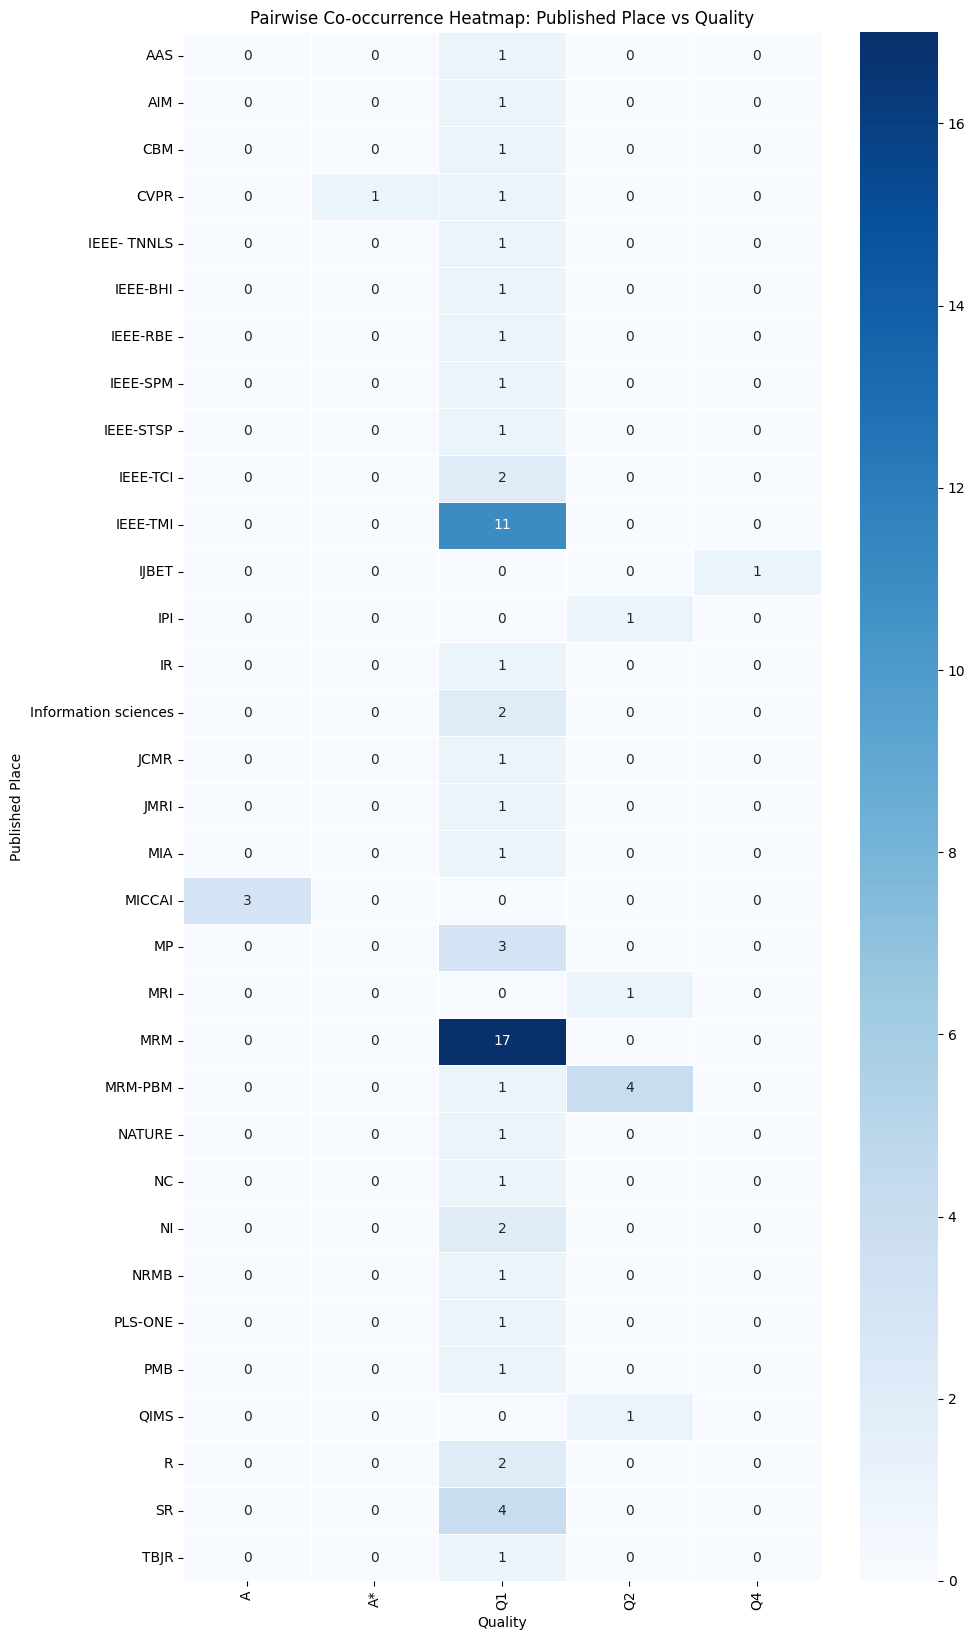

Processing pair: 'Body Parts' vs 'Quality'
Pairwise co-occurrence matrix for 'Body Parts' vs 'Quality' generated successfully.
target                   A  Q1  Q2
source                            
Brain                    2  41   4
Cardiac                  0  11   2
Joints (Knee and Elbow)  0   2   0
Knee                     1  12   1
Others                   0   0   1
Prostate                 0   1   0
abdomen                  0   7   0


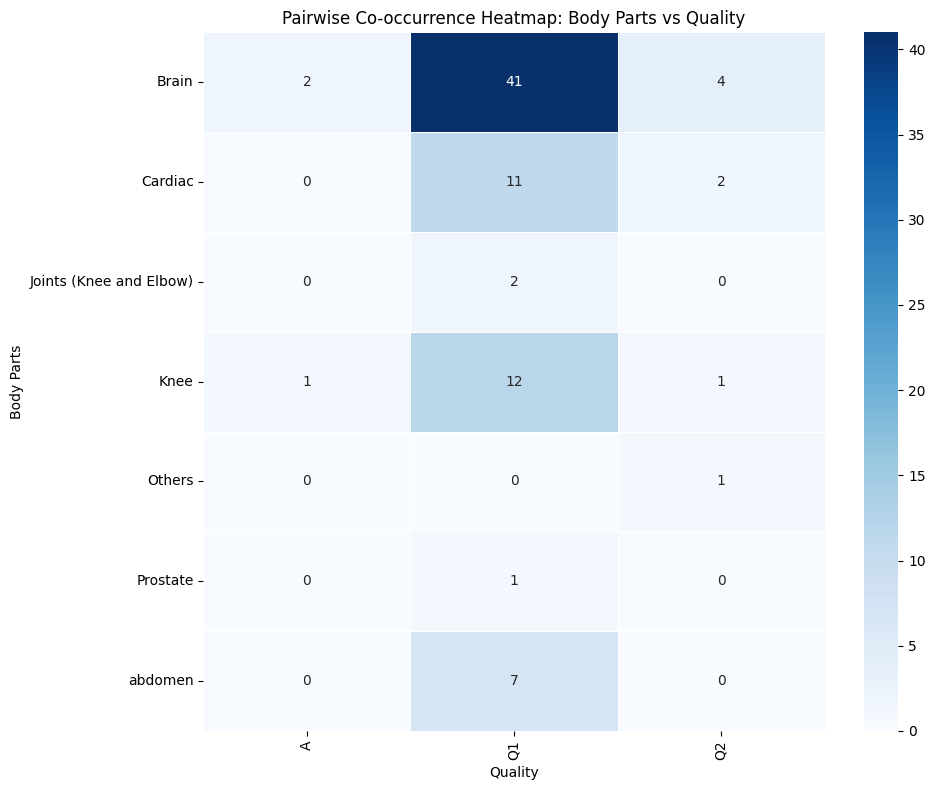

All pairwise co-occurrence heatmaps generated.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations
import numpy as np


def fix_missing_general(df, cols):
    df = df.copy()

    for col in cols:
        def fix(x):
            if isinstance(x, list):
                items = x
            else:
                items = [x]

            cleaned = []
            for item in items:
                if (item in ["Missing", "NA", "N/A", None, "None"] or item is pd.NA or (isinstance(item, float) and pd.isna(item)) or str(item).strip() == ''):
                    cleaned.append(f"Missing/NA ({col})")
                else:
                    cleaned.append(item)
            if cleaned == []:
                cleaned = [f"Missing/NA ({col})"]
            return cleaned
        df[col] = df[col].apply(fix)
    return df

def explode_pairs(df, colA, colB):
    rows = []
    for _, row in df.iterrows():
        left_items = row[colA]
        right_items = row[colB]
        for l in left_items:
            for r in right_items:
                # Filter out explicitly marked missing values generated by fix_missing_general
                if not (str(l).startswith('Missing/NA (') or str(r).startswith('Missing/NA (' ) ):
                    rows.append((l, r))

    df_pairs = pd.DataFrame(rows, columns=["source", "target"])
    if df_pairs.empty:
        return pd.DataFrame() # Return empty if no valid pairs
    df_weighted = df_pairs.groupby(["source", "target"]).size().reset_index(name="weight")
    return df_weighted

# --- Main part of the current request ---

# Define the columns for pairwise co-occurrence analysis
co_occurrence_columns_all = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation',
    'Published Place', 'Body Parts', 'Quality'
]

# Apply fix_missing_general to all relevant columns for consistent handling
df_fixed = fix_missing_general(df.copy(), co_occurrence_columns_all)

print("Generating pairwise co-occurrence matrices and heatmaps...")

pairwise_cooccurrence_matrices = {}

# Generate and plot heatmaps for all unique pairs of columns
for colA, colB in combinations(co_occurrence_columns_all, 2):
    print(f"Processing pair: '{colA}' vs '{colB}'")

    # Get weighted pairs
    df_weighted_pairs = explode_pairs(df_fixed, colA, colB)

    if not df_weighted_pairs.empty:
        # Convert weighted pairs to a co-occurrence matrix format
        # Use pd.crosstab for a straightforward pivot/cross-tabulation
        matrix = pd.crosstab(index=df_weighted_pairs['source'],
                             columns=df_weighted_pairs['target'],
                             values=df_weighted_pairs['weight'],
                             aggfunc='sum').fillna(0).astype(int)

        pairwise_cooccurrence_matrices[f'{colA}_vs_{colB}'] = matrix
        print(f"Pairwise co-occurrence matrix for '{colA}' vs '{colB}' generated successfully.")
        print(matrix)
        # Plot heatmap
        # Adjust figsize to be more dynamic and less prone to collapsing
        plt.figure(figsize=(max(10, len(matrix.columns) * 0.5), max(8, len(matrix.index) * 0.5)))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.title(f"Pairwise Co-occurrence Heatmap: {colA} vs {colB}")
        plt.xlabel(colB)
        plt.ylabel(colA)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid co-occurrences found for pair: '{colA}' vs '{colB}'. Skipping heatmap.")

print("All pairwise co-occurrence heatmaps generated.")

Generating co-occurrence matrices...
Processing column: 'Type'
Co-occurrence matrix for 'Type' generated successfully.
Processing column: 'Model type'
Co-occurrence matrix for 'Model type' generated successfully.
Processing column: 'Metrics Used'
Co-occurrence matrix for 'Metrics Used' generated successfully.
Processing column: 'Type of MRI'
Co-occurrence matrix for 'Type of MRI' generated successfully.
Processing column: 'Orientation'
Co-occurrence matrix for 'Orientation' generated successfully.
Processing column: 'Body Parts'
Co-occurrence matrix for 'Body Parts' generated successfully.

Generating and displaying heatmaps...


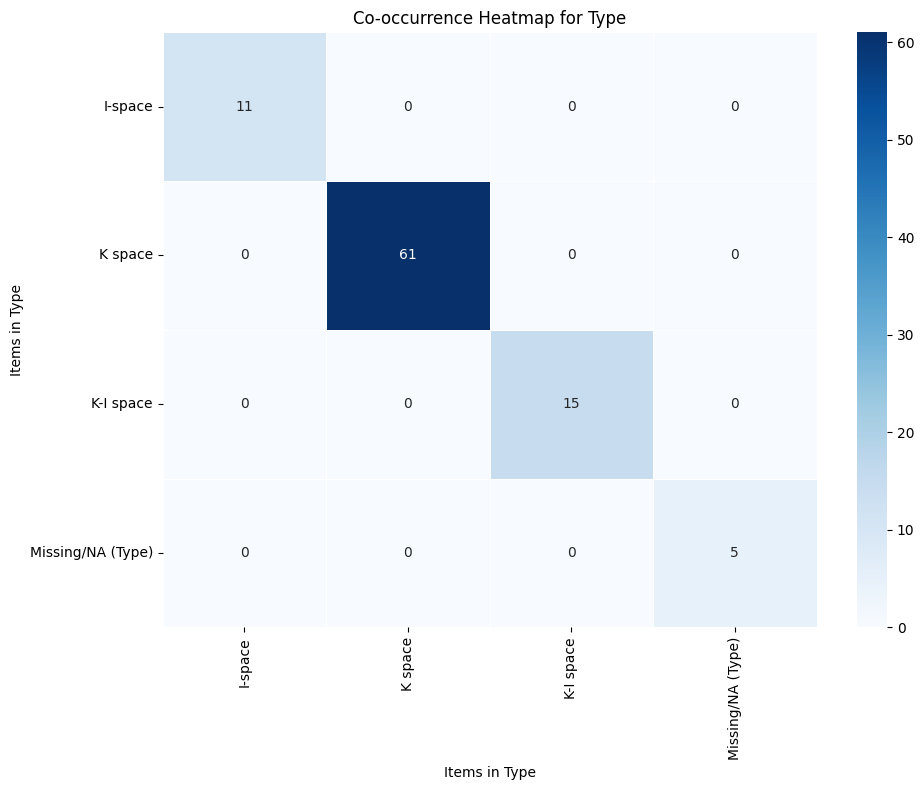

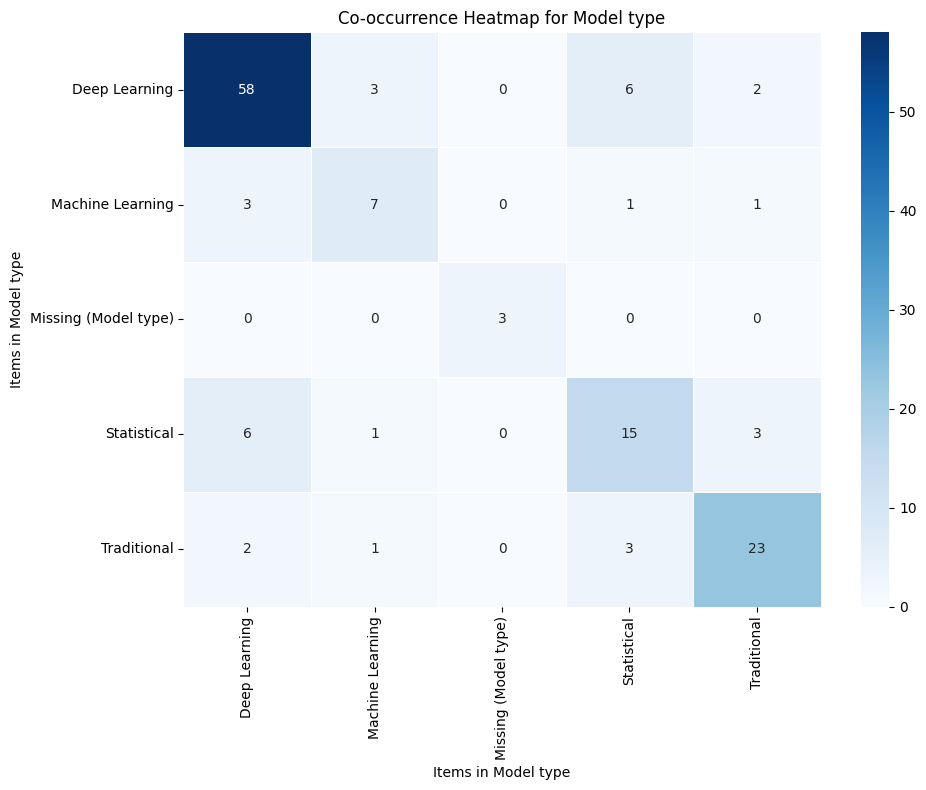

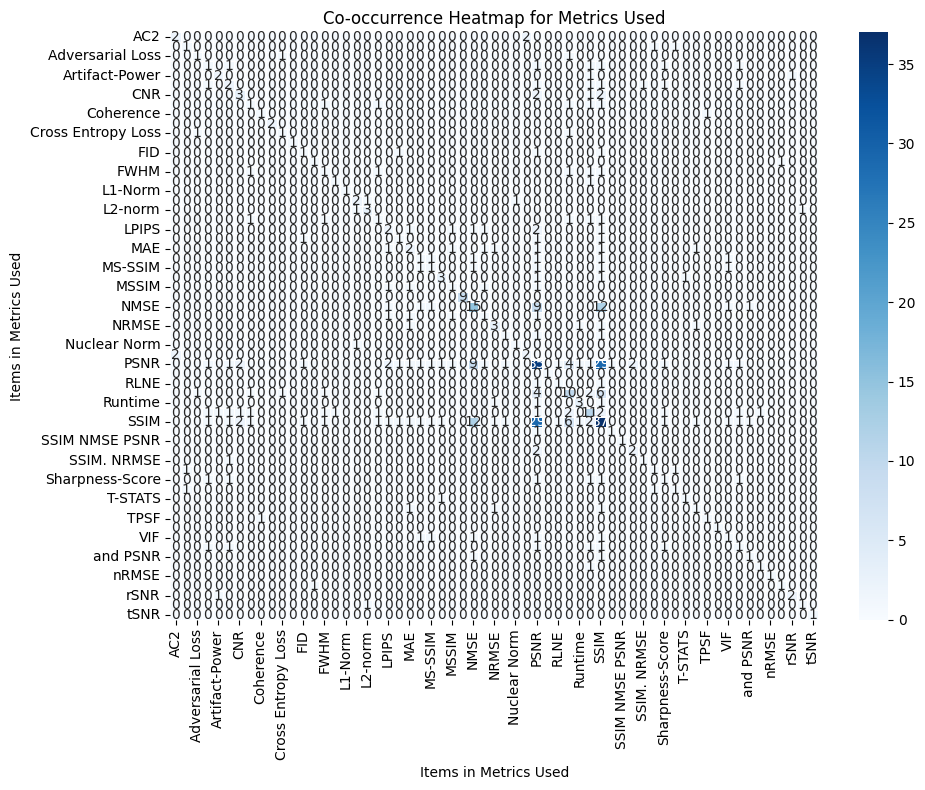

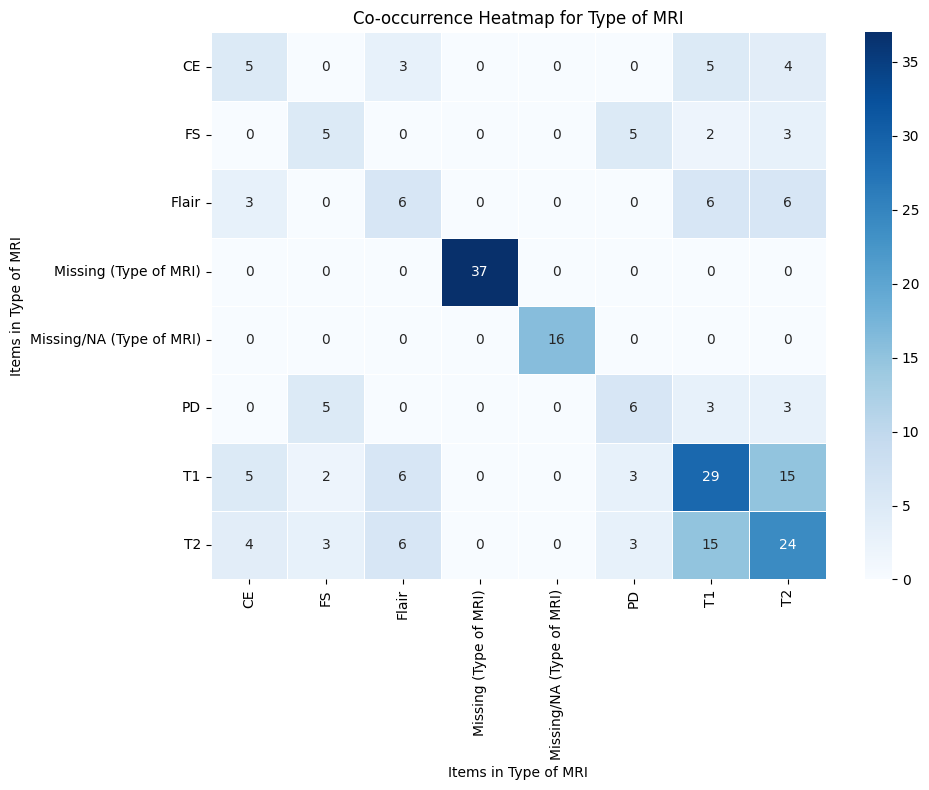

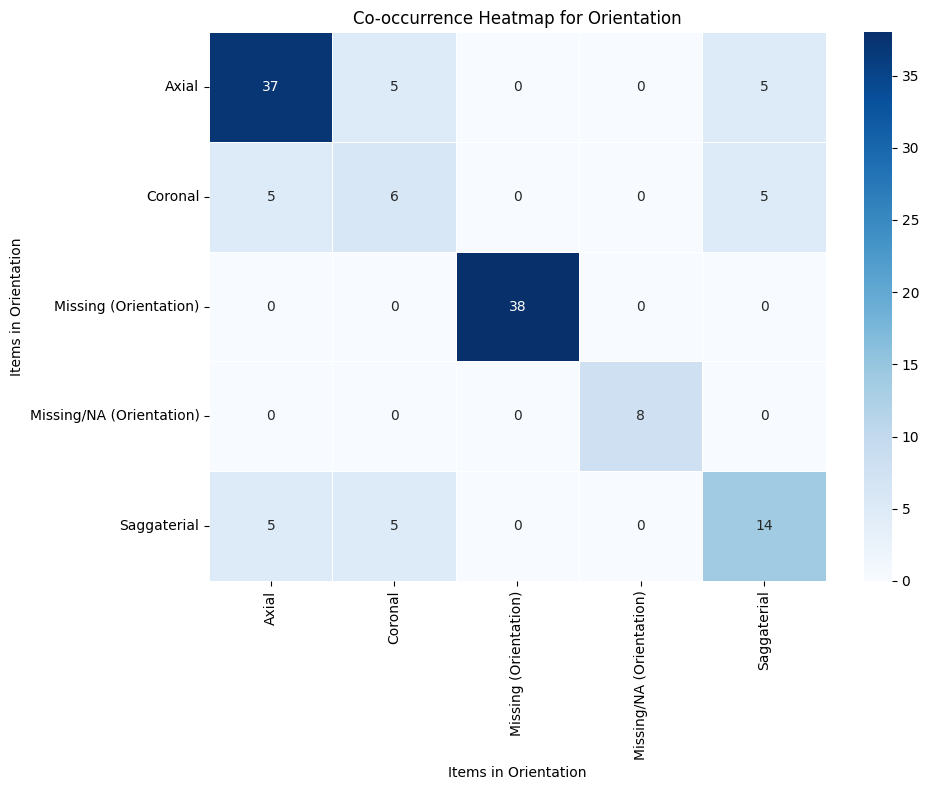

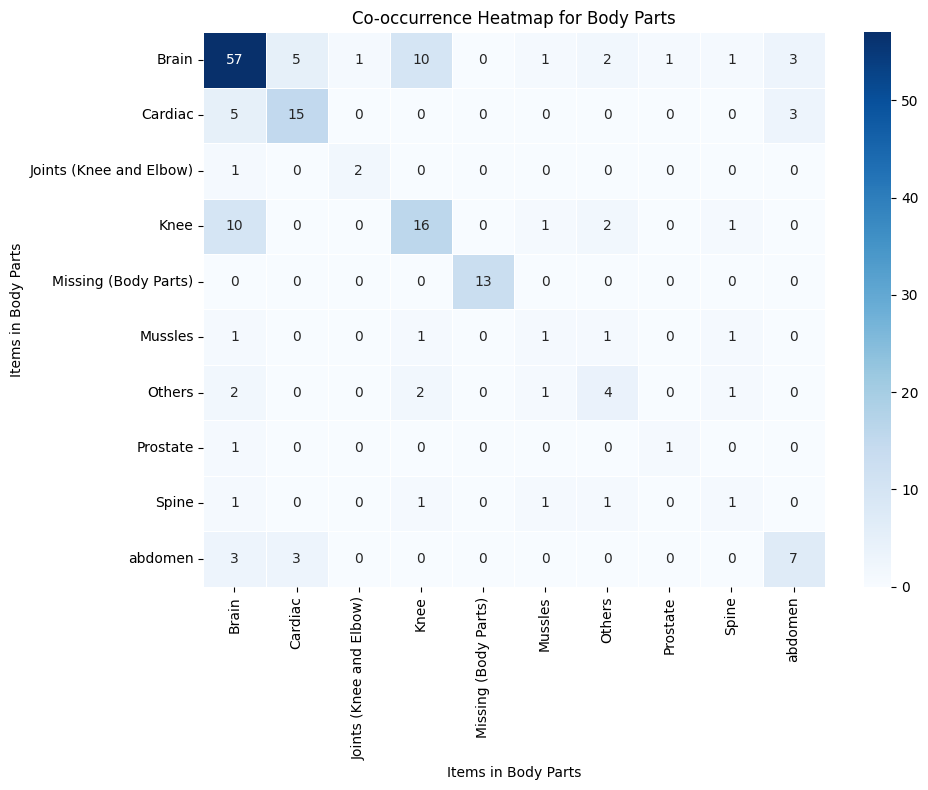

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import pandas as pd

# Define the generate_cooccurrence_matrix function
def generate_cooccurrence_matrix(df, column_name):
    # Collect all unique items, filtering out 'Missing', 'NA', and empty strings
    all_items = df[column_name].explode().unique()
    unique_items = sorted([item for item in all_items if item and item not in ['Missing', 'NA', '']])

    if not unique_items:
        print(f"No meaningful unique items found for column '{column_name}'. Skipping co-occurrence matrix generation.")
        return pd.DataFrame()

    # Initialize an empty co-occurrence matrix with unique items as index and columns
    cooccurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items)

    # Iterate through each row's list to count co-occurrences
    for item_list in df[column_name]:
        # Filter items in the current list
        filtered_items = [item for item in item_list if item and item not in ['Missing', 'NA', '']]

        # Count self-occurrences
        for item in filtered_items:
            if item in unique_items:
                cooccurrence_matrix.loc[item, item] += 1

        # Count co-occurrences for pairs
        for item1, item2 in combinations(filtered_items, 2):
            if item1 in unique_items and item2 in unique_items:
                cooccurrence_matrix.loc[item1, item2] += 1
                cooccurrence_matrix.loc[item2, item1] += 1 # Symmetrical matrix

    return cooccurrence_matrix

# Define the columns for co-occurrence analysis as per the instructions
co_occurrence_columns = [
    'Type', 'Model type', 'Metrics Used', 'Type of MRI', 'Orientation', 'Body Parts'
]

# Initialize an empty dictionary to store the generated co-occurrence matrices
cooccurrence_matrices = {}

# Generate co-occurrence matrices for each specified column
print("Generating co-occurrence matrices...")
for col in co_occurrence_columns:
    print(f"Processing column: '{col}'")
    matrix = generate_cooccurrence_matrix(df, col)
    if not matrix.empty:
        cooccurrence_matrices[col] = matrix
        print(f"Co-occurrence matrix for '{col}' generated successfully.")
    else:
        print(f"No co-occurrence matrix generated for '{col}'.")

# Generate and display heatmaps for each co-occurrence matrix
print("\nGenerating and displaying heatmaps...")
for col_name, matrix in cooccurrence_matrices.items():
    if not matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.title(f'Co-occurrence Heatmap for {col_name}')
        plt.xlabel(f'Items in {col_name}')
        plt.ylabel(f'Items in {col_name}')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot generate heatmap for '{col_name}' as its co-occurrence matrix is empty.")


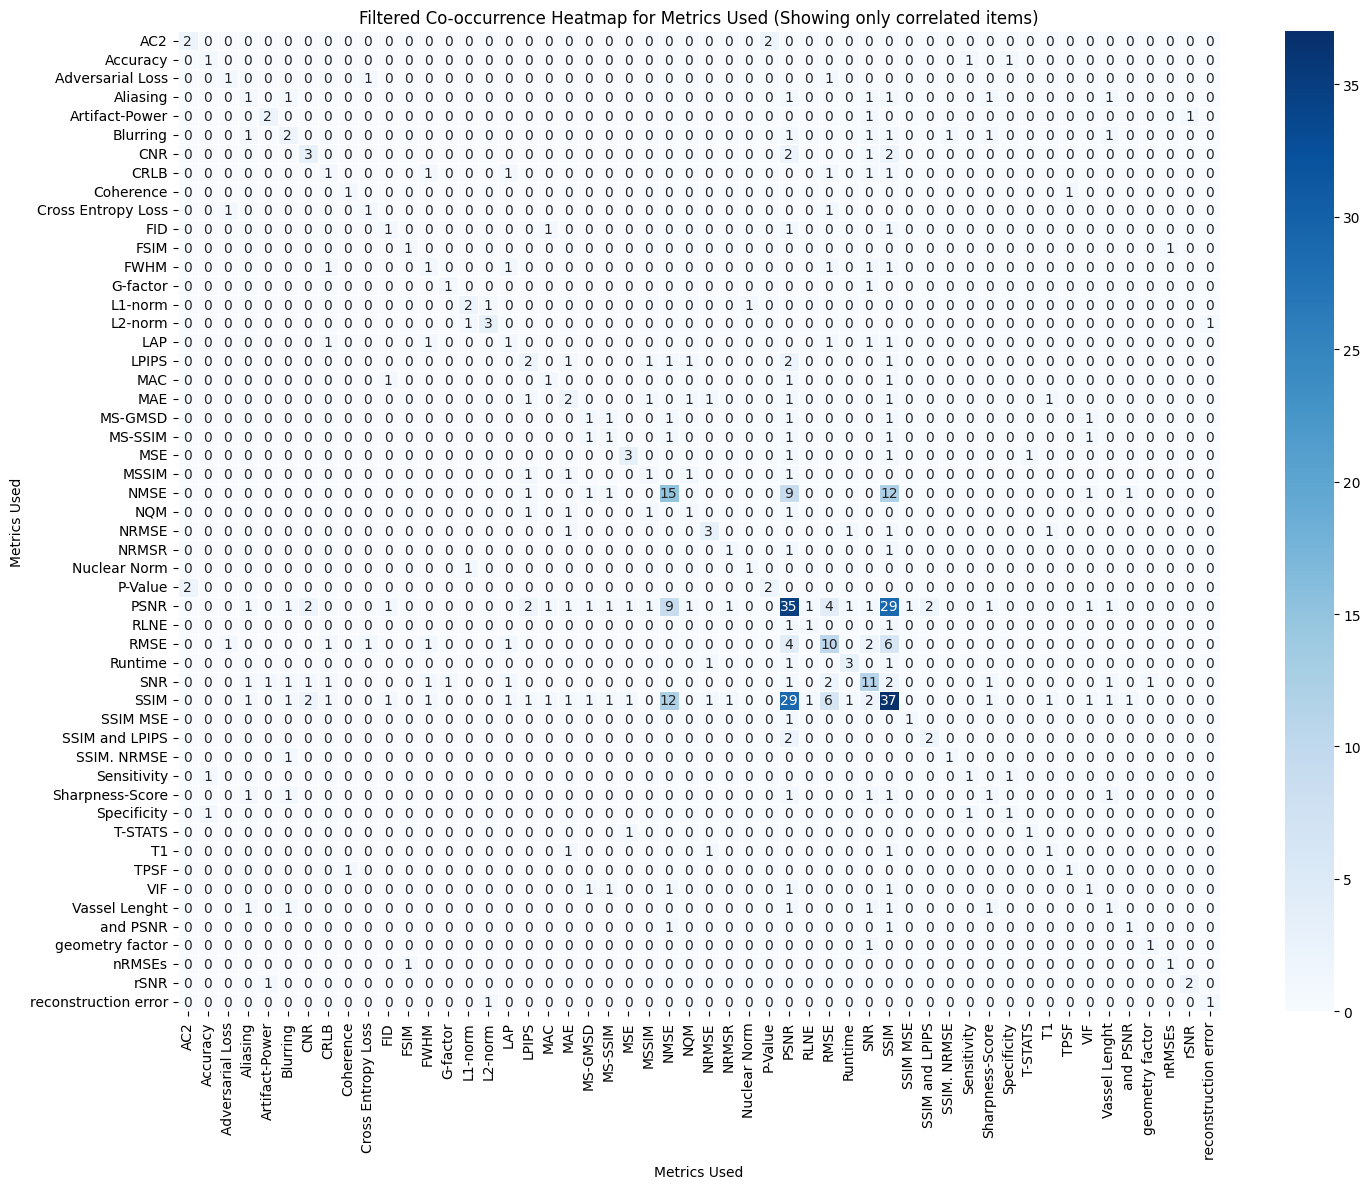

In [ ]:
import numpy as np

# Get the co-occurrence matrix for 'Metrics Used'
metrics_matrix = cooccurrence_matrices['Metrics Used']
has_other_cooccurrence = (metrics_matrix.sum(axis=1) - np.diag(metrics_matrix)).gt(0)

# Filter the matrix to include only these metrics (both rows and columns)
filtered_metrics_matrix = metrics_matrix.loc[has_other_cooccurrence, has_other_cooccurrence]

if not filtered_metrics_matrix.empty:
    plt.figure(figsize=(15, 12)) # Adjust figure size for better readability
    sns.heatmap(filtered_metrics_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title('Filtered Co-occurrence Heatmap for Metrics Used (Showing only correlated items)')
    plt.xlabel('Metrics Used')
    plt.ylabel('Metrics Used')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No metrics found with co-occurrences with other distinct metrics after filtering.")

In [20]:
df.head()


0 INDEX                                              Paper       Type  \
1     1                                            BGRAPPA  [K space]   
2     2  Deep learning MRI halves scan time…” — more ge...  [K space]   
3     3                            Zero-Shot Diffusion MRI  [K space]   
4     4               Diffusion Posterior Sampling for MRI  [K space]   
5     5  Deep Learning Superresolution for Simultaneous...  [K space]   

0       Model type                 Metrics Used                 Type of MRI  \
1    [Statistical]               [MSE, T-STATS]                        [T2]   
2  [Deep Learning]                        [SNR]                        [T2]   
3  [Deep Learning]            [MSE, PSNR, SSIM]  [Missing/NA (Type of MRI)]   
4  [Deep Learning]  [Missing/NA (Metrics Used)]  [Missing/NA (Type of MRI)]   
5  [Deep Learning]               [AC2, P-Value]                [PD, FS, T2]   

0                 Orientation Year  Published Place  \
1                     [Axial]  2025           [AAS]   
2                     [Axial]  2025            [RA]   
3                     [Axial]  2025          [NRMB]   
4  [Missing/NA (Orientation)]  2025           [IPI]   
5  [Missing/NA (Orientation)]  2025             [R]   

0                             Body Parts Quality    Year  
1                                [Brain]    [Q1]  [2025]  
2  [Brain, Spine, Mussles, Others, Knee]    [NA]  [2025]  
3                              [Cardiac]    [Q1]  [2025]  
4              [Missing/NA (Body Parts)]    [Q2]  [2025]  
5                                 [Knee]    [Q1]  [2025]

In [18]:


def fix_missing_general(df, cols):
    df = df.copy()

    for col in cols:

        def fix(x):
            if isinstance(x, list):
                items = x
            else:
                items = [x]

            cleaned = []
            for item in items:

                # Identify missing/NA/nan/empty
                if (
                    item in ["Missing", "NA", "N/A", None, "None"] or
                    item is pd.NA or
                    (isinstance(item, float) and pd.isna(item))
                ):
                    cleaned.append(f"Missing/NA ({col})")
                else:
                    cleaned.append(item)

            # If column was empty list → treat as missing too
            if cleaned == []:
                cleaned = [f"Missing/NA ({col})"]

            return cleaned

        df[col] = df[col].apply(fix)

    return df


def explode_pairs(df, colA, colB):

    rows = []

    for _, row in df.iterrows():

        left_items = row[colA]
        right_items = row[colB]

        for l in left_items:
            for r in right_items:
                rows.append((l, r))

    df_pairs = pd.DataFrame(rows, columns=["source", "target"])
    df_weighted = df_pairs.groupby(["source", "target"]).size().reset_index(name="weight")

    return df_weighted

def make_alluvial(df_pairs, title):

    sources = df_pairs["source"].astype(str)
    targets = df_pairs["target"].astype(str)
    weights = df_pairs["weight"]

    combined = pd.concat([sources, targets])
    labels = list(pd.unique(combined))

    index_map = {label: idx for idx, label in enumerate(labels)}

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            label=labels,
            line=dict(width=1),
        ),
        link=dict(
            source=sources.map(index_map).tolist(),
            target=targets.map(index_map).tolist(),
            value=weights.tolist(),
        )
    )])

    fig.update_layout(title_text=title, font_size=12)
    fig.show()


# Fix missing
df = fix_missing_general(df, co_occurrence_columns)

# Generate alluvial for all pairs
for colA, colB in combinations(co_occurrence_columns, 2):
    print(f"Creating plot for {colA} ↔ {colB}")
    df_pairs = explode_pairs(df, colA, colB)
    make_alluvial(df_pairs, f"{colA} ↔ {colB} (Weighted Alluvial)")


Creating plot for Type ↔ Model type


Creating plot for Type ↔ Metrics Used


Creating plot for Type ↔ Type of MRI


Creating plot for Type ↔ Orientation


Creating plot for Type ↔ Body Parts


Creating plot for Model type ↔ Metrics Used


Creating plot for Model type ↔ Type of MRI


Creating plot for Model type ↔ Orientation


Creating plot for Model type ↔ Body Parts


Creating plot for Metrics Used ↔ Type of MRI


Creating plot for Metrics Used ↔ Orientation


Creating plot for Metrics Used ↔ Body Parts


Creating plot for Type of MRI ↔ Orientation


Creating plot for Type of MRI ↔ Body Parts


Creating plot for Orientation ↔ Body Parts


In [30]:
def explode_pairs_with_papers(df, colA, colB, paper_col="Paper"):

    rows = []

    for _, row in df.iterrows():
        left_items = row[colA]
        right_items = row[colB]
        papers = row[paper_col] if isinstance(row[paper_col], list) else [row[paper_col]]

        for l in left_items:
            for r in right_items:
                rows.append((l, r, papers))

    df_pairs = pd.DataFrame(rows, columns=["source", "target", "papers"])

    # Group by source-target pair, combine papers
    df_weighted = df_pairs.groupby(["source", "target"])["papers"]\
        .apply(lambda x: list({p for sublist in x for p in sublist}))\
        .reset_index()

    df_weighted["weight"] = df_pairs.groupby(["source", "target"]).size().values

    return df_weighted


In [33]:
def make_alluvial_with_papers(df_pairs, title):

    sources = df_pairs["source"].astype(str)
    targets = df_pairs["target"].astype(str)
    weights = df_pairs["weight"]
    papers = df_pairs["papers"]

    combined = pd.concat([sources, targets])
    labels = list(pd.unique(combined))
    index_map = {label: idx for idx, label in enumerate(labels)}

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            label=labels,
            line=dict(width=1),
        ),
        link=dict(
            source=sources.map(index_map).tolist(),
            target=targets.map(index_map).tolist(),
            value=weights.tolist(),
            # Use <br> for line breaks
            customdata=["<br>".join(p) for p in papers],
            hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Weight: %{value}<br>Papers:<br>%{customdata}<extra></extra>'
        )
    )])

    fig.update_layout(title_text=title, font_size=12)
    fig.show()


In [34]:
# Fix missing
df = fix_missing_general(df, co_occurrence_columns)

# Generate alluvial for all pairs, showing Papers on hover
for colA, colB in combinations(co_occurrence_columns, 2):
    print(f"Creating plot for {colA} ↔ {colB}")
    df_pairs = explode_pairs_with_papers(df, colA, colB, paper_col="Paper")
    make_alluvial_with_papers(df_pairs, f"{colA} ↔ {colB} (Weighted Alluvial)")


Creating plot for Type ↔ Model type


Creating plot for Type ↔ Metrics Used


Creating plot for Type ↔ Type of MRI


Creating plot for Type ↔ Orientation


Creating plot for Type ↔ Body Parts


Creating plot for Model type ↔ Metrics Used


Creating plot for Model type ↔ Type of MRI


Creating plot for Model type ↔ Orientation


Creating plot for Model type ↔ Body Parts


Creating plot for Metrics Used ↔ Type of MRI


Creating plot for Metrics Used ↔ Orientation


Creating plot for Metrics Used ↔ Body Parts


Creating plot for Type of MRI ↔ Orientation


Creating plot for Type of MRI ↔ Body Parts


Creating plot for Orientation ↔ Body Parts


In [37]:
def explode_pairs_with_papers(df, colA, colB, paper_col="Paper"):
  rows = []

  for _, row in df.iterrows():
      left_items = row[colA]
      right_items = row[colB]
      papers = row[paper_col] if isinstance(row[paper_col], list) else [row[paper_col]]

      for l in left_items:
          for r in right_items:
              rows.append((l, r, papers))

  df_pairs = pd.DataFrame(rows, columns=["source", "target", "papers"])

  # Group by source-target pair, combine papers
  df_weighted = df_pairs.groupby(["source", "target"])["papers"]\
      .apply(lambda x: list({p for sublist in x for p in sublist}))\
      .reset_index()

  df_weighted["weight"] = df_pairs.groupby(["source", "target"]).size().values

  return df_weighted

def make_alluvial_with_papers(df_pairs, title, max_papers_display=10):
  sources = df_pairs["source"].astype(str)
  targets = df_pairs["target"].astype(str)
  weights = df_pairs["weight"]
  papers = df_pairs["papers"]

  combined = pd.concat([sources, targets])
  labels = list(pd.unique(combined))
  index_map = {label: idx for idx, label in enumerate(labels)}

  # Prepare hover text with a limit to avoid overflow
  customdata = []
  for p_list in papers:
      if len(p_list) > max_papers_display:
          displayed = "<br>".join(p_list[:max_papers_display]) + f"<br>+ {len(p_list) - max_papers_display} more..."
      else:
          displayed = "<br>".join(p_list)
      customdata.append(displayed)

  fig = go.Figure(data=[go.Sankey(
      node=dict(
          pad=20,
          thickness=20,
          label=labels,
          line=dict(width=1),
      ),
      link=dict(
          source=sources.map(index_map).tolist(),
          target=targets.map(index_map).tolist(),
          value=weights.tolist(),
          customdata=customdata,
          hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Weight: %{value}<br>Papers:<br>%{customdata}<extra></extra>'
      )
  )])

  fig.update_layout(title_text=title, font_size=12)
  fig.show()

In [ ]:
df = fix_missing_general(df, co_occurrence_columns)


for colA, colB in combinations(co_occurrence_columns, 2):
  print(f"Creating plot for {colA} ↔ {colB}")
  df_pairs = explode_pairs_with_papers(df, colA, colB, paper_col="Paper")
  make_alluvial_with_papers(df_pairs, f"{colA} ↔ {colB} (Weighted Alluvial)")

Creating plot for Type ↔ Model type


Creating plot for Type ↔ Metrics Used


Creating plot for Type ↔ Type of MRI


Creating plot for Type ↔ Orientation


Creating plot for Type ↔ Body Parts


Creating plot for Model type ↔ Metrics Used


Creating plot for Model type ↔ Type of MRI


Creating plot for Model type ↔ Orientation


Creating plot for Model type ↔ Body Parts


Creating plot for Metrics Used ↔ Type of MRI


Creating plot for Metrics Used ↔ Orientation


Creating plot for Metrics Used ↔ Body Parts


Creating plot for Type of MRI ↔ Orientation


Creating plot for Type of MRI ↔ Body Parts


Creating plot for Orientation ↔ Body Parts


In [61]:
import plotly.io as pio
pio.renderers.default = "colab"
pio.renderers.render_on_display = True
pio.renderers.html_sanitizer = None


In [62]:
def explode_pairs_with_papers(df, colA, colB, paper_col="Paper", year_col="Year"):

    rows = []

    for _, row in df.iterrows():
        left_items = row[colA]
        right_items = row[colB]

        papers = row[paper_col] if isinstance(row[paper_col], list) else [row[paper_col]]
        years  = row[year_col]  if isinstance(row[year_col], list)  else [row[year_col]]

        # combine paper + year safely
        paper_year = [f"{p} ({y})" for p, y in zip(papers, years)]

        for l in left_items:
            for r in right_items:
                rows.append((l, r, paper_year))

    df_pairs = pd.DataFrame(rows, columns=["source", "target", "papers"])

    # merge duplicates
    df_weighted = df_pairs.groupby(["source", "target"])["papers"]\
        .apply(lambda x: list({p for sub in x for p in sub}))\
        .reset_index()

    df_weighted["weight"] = df_pairs.groupby(["source", "target"]).size().values

    return df_weighted


In [63]:
def make_alluvial_with_papers(df_pairs, title):
    import plotly.graph_objects as go

    sources = df_pairs["source"].astype(str)
    targets = df_pairs["target"].astype(str)
    weights = df_pairs["weight"]
    papers_lists = df_pairs["papers"]

    combined = pd.concat([sources, targets])
    labels = list(pd.unique(combined))
    index_map = {lab: i for i, lab in enumerate(labels)}

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=20,
            label=labels,
        ),
        link=dict(
            source=sources.map(index_map),
            target=targets.map(index_map),
            value=weights,
            customdata=[";;".join(p) for p in papers_lists],  # pass raw text
            hovertemplate="Hover to see papers<extra></extra>"
        )
    )])

    fig.update_layout(title_text=title, font_size=12)
    fig.show()


In [64]:
from IPython.display import HTML
HTML("""
<style>
#paperTooltip {
    position: absolute;
    display: none;

    max-height: 200px;
    width: 380px;

    overflow-y: auto;
    overflow-wrap: break-word;
    word-break: break-word;

    background: rgba(0,0,0,0.85);
    color: white;
    padding: 10px;
    border-radius: 6px;
    font-size: 12px;
    z-index: 9999;
}
</style>

<div id="paperTooltip"></div>
""")


In [65]:
from IPython.display import Javascript

Javascript("""
require(['base/js/namespace'], function(Jupyter){

    setTimeout(function(){

        let links = document.querySelectorAll('g.sankey-links path');

        links.forEach((link, idx) => {

            link.addEventListener('mousemove', function(event){

                // get plot handle
                let gd = link.closest('.js-plotly-plot');
                let raw = gd.data[0].link.customdata[idx];

                // convert to multi-line HTML
                let papers = raw.split(";;").join("<br>");

                let box = document.getElementById("paperTooltip");
                box.innerHTML = "<b>Papers:</b><br>" + papers;

                box.style.display = "block";
                box.style.left = (event.pageX + 15) + "px";
                box.style.top  = (event.pageY + 15) + "px";
            });

            link.addEventListener('mouseout', function(){
                document.getElementById("paperTooltip").style.display = "none";
            });
        });

    }, 1200);

});
""")


<IPython.core.display.Javascript object>

In [66]:
df = fix_missing_general(df, co_occurrence_columns)

for colA, colB in combinations(co_occurrence_columns, 2):
    print(f"Plot: {colA} ↔ {colB}")
    df_pairs = explode_pairs_with_papers(df, colA, colB, paper_col="Paper", year_col="Year")
    make_alluvial_with_papers(df_pairs, f"{colA} ↔ {colB} (Weighted)")


Plot: Type ↔ Model type


Plot: Type ↔ Metrics Used


Plot: Type ↔ Type of MRI


Plot: Type ↔ Orientation


Plot: Type ↔ Body Parts


Plot: Model type ↔ Metrics Used


Plot: Model type ↔ Type of MRI


Plot: Model type ↔ Orientation


Plot: Model type ↔ Body Parts


Plot: Metrics Used ↔ Type of MRI


Plot: Metrics Used ↔ Orientation


Plot: Metrics Used ↔ Body Parts


Plot: Type of MRI ↔ Orientation


Plot: Type of MRI ↔ Body Parts


Plot: Orientation ↔ Body Parts


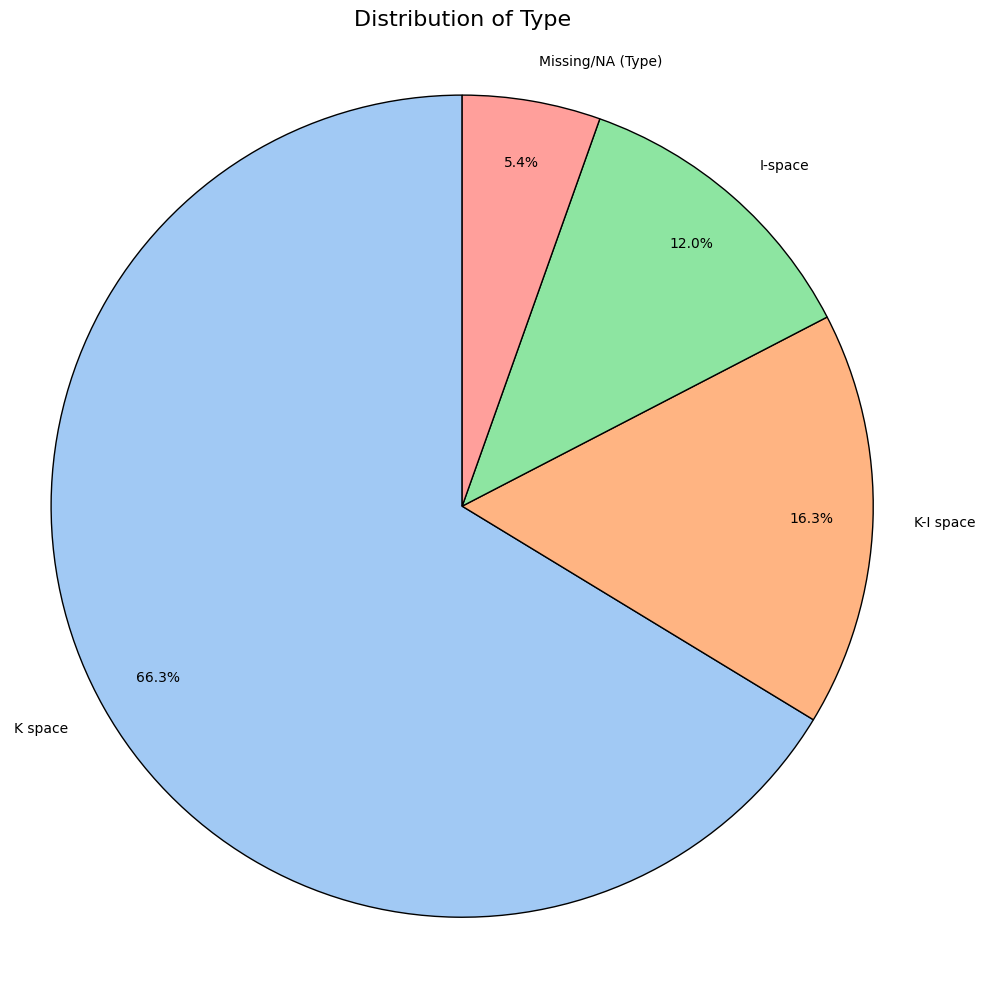

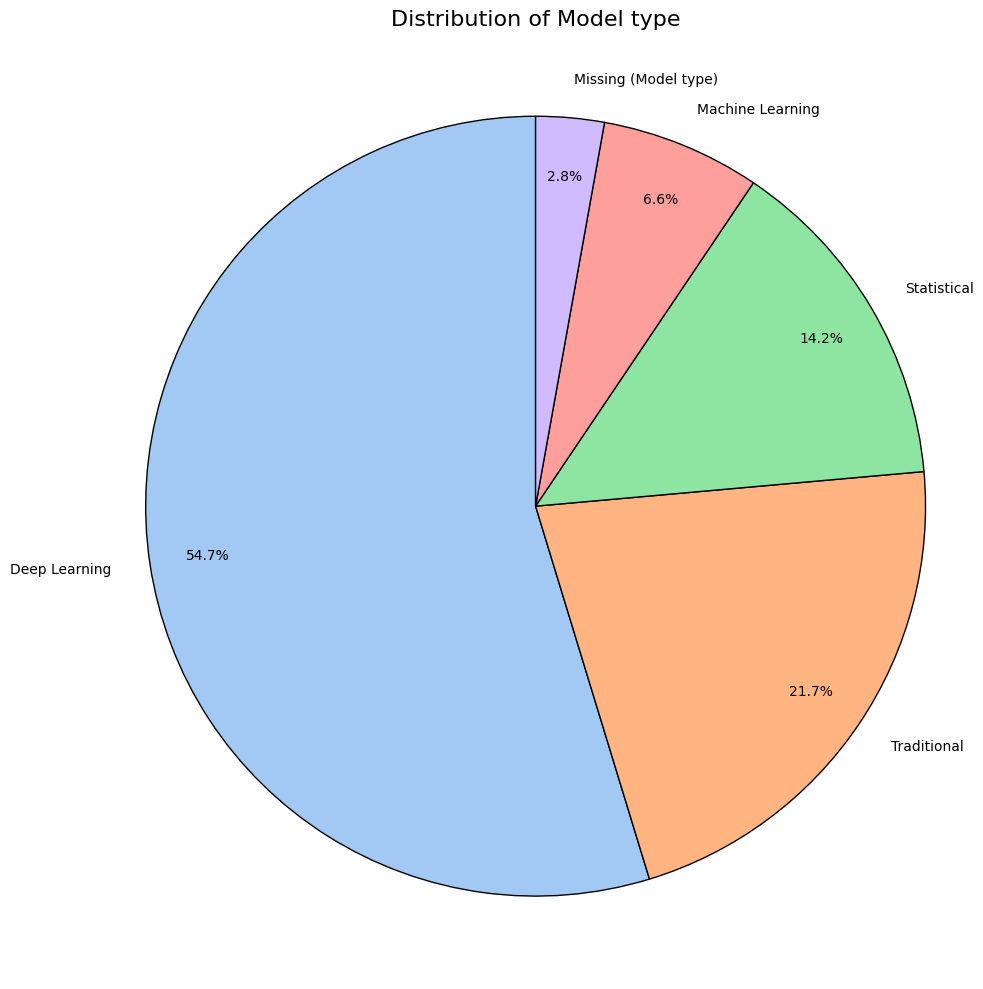

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_to_pie_chart = ['Type', 'Model type']

for col in columns_to_pie_chart:
    # Explode the list column to get individual items
    exploded_series = df[col].explode()

    # Count the frequency of each item
    frequencies = exploded_series.value_counts()

    # Filter out 'Missing', 'NA', or empty strings if they are not meaningful for plotting
    if '' in frequencies.index:
        frequencies = frequencies.drop('')
    if 'Missing' in frequencies.index:
        frequencies = frequencies.drop('Missing')
    if 'NA' in frequencies.index:
        frequencies = frequencies.drop('NA')

    if not frequencies.empty:
        plt.figure(figsize=(8, 8))
        plt.pie(frequencies.values, labels=frequencies.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        plt.title(f'Distribution of {col}')
        plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
    else:
        print(f"No meaningful data to plot for column: {col} after filtering 'Missing' or empty values.")

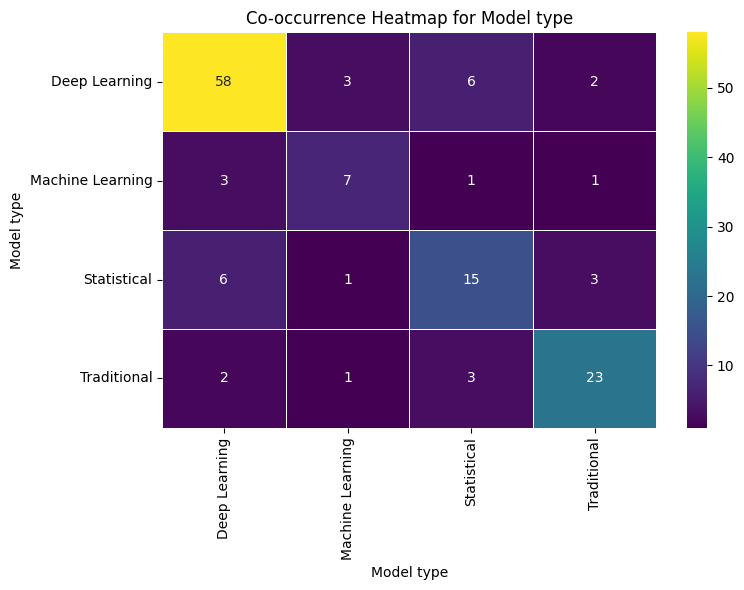

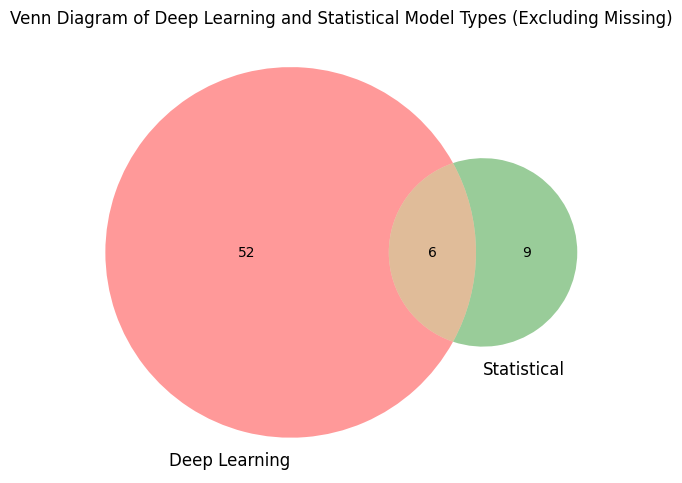

In [ ]:
# The 'Model type' co-occurrence matrix has already been generated and can be accessed from the 'cooccurrence_matrices' dictionary.
# A heatmap is a suitable visualization for showing co-occurrence among multiple items.
# Re-displaying the heatmap for 'Model type':

import matplotlib.pyplot as plt
import seaborn as sns
#
# model_type_matrix = cooccurrence_matrices.get('Model type')
#
if model_type_matrix is not None and not model_type_matrix.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(model_type_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title('Co-occurrence Heatmap for Model type')
    plt.xlabel('Model type')
    plt.ylabel('Model type')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Co-occurrence matrix for 'Model type' not found or is empty.")

# Venn diagram for 2 model types, ignoring 'Missing':
# First, ensure 'matplotlib_venn' is installed
# !pip install matplotlib-venn

from matplotlib_venn import venn2
from matplotlib import pyplot as plt

# Filter out 'Missing' values from the 'Model type' column before creating sets
df_filtered_model_type = df[df['Model type'].apply(lambda x: 'Missing' not in x)]

dl_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Deep Learning' in x)].index)
stat_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Statistical' in x)].index)

plt.figure(figsize=(7, 7))
venn2([dl_set, stat_set], ('Deep Learning', 'Statistical'))
plt.title('Venn Diagram of Deep Learning and Statistical Model Types (Excluding Missing)')
plt.show()

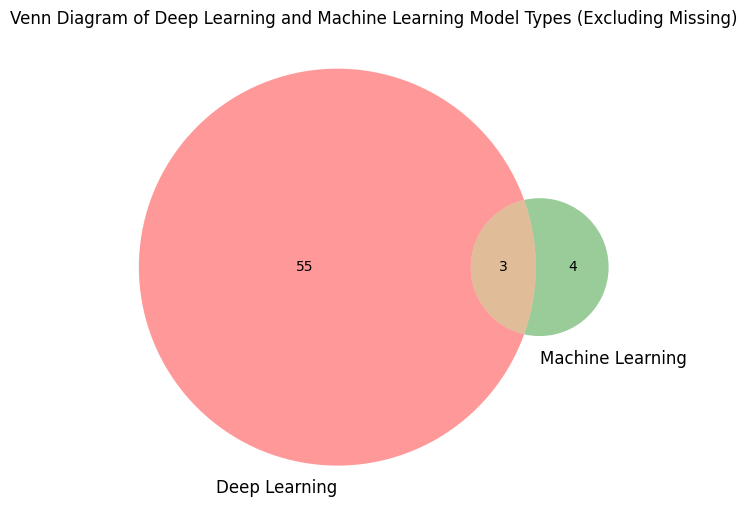

In [ ]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

# Assuming df_filtered_model_type was already created in a previous step
# df_filtered_model_type = df[df['Model type'].apply(lambda x: 'Missing' not in x)]

dl_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Deep Learning' in x)].index)
ml_set = set(df_filtered_model_type[df_filtered_model_type['Model type'].apply(lambda x: 'Machine Learning' in x)].index)

plt.figure(figsize=(7, 7))
venn2([dl_set, ml_set], ('Deep Learning', 'Machine Learning'))
plt.title('Venn Diagram of Deep Learning and Machine Learning Model Types (Excluding Missing)')
plt.show()